# Merge: Matched (BTG + TRIPLE) and Unmatched (SVs + CNVs)

In order to define the events as part of the consensus calls between Matched and Unmatched settings, events from the outputs of CNVs and SVs are merged together, and those are the ones used to compare the results from both pipelines.

In [1]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from pybedtools import BedTool

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
%matplotlib inline

In [5]:
from pybedtools import BedTool

In [6]:
import cnvlib

/home/gutierj2/architecture/cnvkit/cnvkit/skgenome/intersect.py:11: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Int64Index


In [7]:
from wand.image import Image as WImage
from IPython.display import Image,display

- Annotation:

- FILES:

In [8]:
tinder_138_PURITY=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/rupture/benchmark/files/3-tinder_PURITY_UNI_500.tsv',sep='\t')
btg_64_noBLACK_PURITY=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/rupture/benchmark/files/3-btg_noBLACK_PURITY_UNI_500.tsv',sep='\t')
common_645_PURITY=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/rupture/benchmark/files/3-common_PURITY_UNI_500.tsv',sep='\t')
common_515=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/rupture/benchmark/files/3-common_BTG_UNI_500.tsv',sep='\t')

In [9]:
tinder_detect_DELs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/tinder_full_set_DEL_DETECT_noBLACK.tsv',sep='\t')
triple_detect_DELs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/triple_full_info_dup_DEL_DETECT_noBLACK.tsv',sep='\t')

tinder_detect_DUPs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/tinder_full_set_DUP_DETECT_noBLACK.tsv',sep='\t')
triple_detect_DUPs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/triple_full_info_dup_DUP_DETECT_noBLACK.tsv',sep='\t')

tinder_detect_INVs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/tinder_full_set_INV_DETECT.tsv',sep='\t')
triple_detect_INVs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/triple_full_info_dup_INV_DETECT.tsv',sep='\t')

tinder_detect_TRAs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/tinder_full_set_TRA_only_order_DETECT.tsv',sep='\t')
triple_detect_TRAs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/triple_full_info_dup_TRA_key_DETECT.tsv',sep='\t')

In [10]:
### Purity:
tinder_purity=pd.read_csv('/work/isabl/home/gutierj2/uk_all/purity/tinder_purity.tsv',sep='\t')
tinder_purity.head()

,Sample,Purity
0,IID_H158604_T01_01_WG01,1.000000
1,IID_H158605_T01_01_WG01,1.000000
2,IID_H158606_T01_01_WG01,1.000000
3,IID_H158607_T01_01_WG01,1.000000
4,IID_H158608_T01_01_WG01,0.918222


- ARM Level Events:

In [11]:
#annotsv_output_bed_path=BTGs_cells_cnv_MAIN[['chromosome','start','end','Sample','Event_CNV','Event_Cells']]
#annotsv_output_bed_path['Event_Cells']=annotsv_output_bed_path['Event_Cells'].astype(str)
cytoarms='/work/isabl/home/gutierj2/uk_all/notebooks/clinic/cytoARM.txt'

def get_I_arms_70_BTG(annotsv_output_bed_path):
    table_patient_contig=annotsv_output_bed_path.copy()
    table_patient_contig.columns=["chr","start","end","sample","CNV",'Cells','Detection']
    table_patient_contig['Cells']=table_patient_contig['Cells'].astype(str)
    table_patient_contig['CNV']=table_patient_contig['CNV'].astype(str)
    table_patient_contig['start']=table_patient_contig['start'].astype(int)
    table_patient_contig['end']=table_patient_contig['end'].astype(int)
    table_patient_contig['chr']=table_patient_contig['chr'].astype(str)
    

    chr_arms = pd.read_csv(cytoarms,sep='\t' ,header=None, names=['chr', 'start', 'end', 'Arm Level'])
    chr_arms['to_index']=chr_arms['chr']+'_'+chr_arms['Arm Level']
    chr_arms.index = chr_arms['to_index']
    list_patient_contig=BedTool(table_patient_contig.values.tolist())
    list_bed_arms=BedTool(chr_arms.values.tolist())

    I_arms = list_patient_contig.intersect(list_bed_arms, wa = True, wb = True).to_dataframe(
                names = ['start_seg','end_seg','Sample', 'CNV', 'Cells','Detection', 'chr_seg','start_arm', 'end_arm', 'chr_arm', 'name_arm'])
    I_arms = I_arms[['chr_seg','start_seg','end_seg', 'CNV', 'Cells','Sample','Detection', 'chr_arm','start_arm', 'end_arm', 'name_arm']]
    #I = I[I.chr_arms!="X"]'])
    I_arms['start_seg']=I_arms['start_seg'].astype(int)
    I_arms['end_seg']=I_arms['end_seg'].astype(int)
    I_arms['start_arm']=I_arms['start_arm'].astype(int)
    I_arms['end_arm']=I_arms['end_arm'].astype(int) 
    
    I_arms_70=[]
    for index,row in I_arms.iterrows():
        arm_size=row['end_arm']-row['start_arm']
        
        # 1. Cases in which the segment starts before the beginning of the arm and finishes after the end (100%)
        if((row['start_arm'] >= row['start_seg']) & (row['end_arm'] <= row['end_seg'])):
            I_arms_70.append(row)
            
        # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
        if ((row['start_arm'] >= row['start_seg']) & (row['end_arm'] >= row['end_seg']) & (row['start_arm'] <= row['end_seg'])):
            segment_size=row['end_seg']-row['start_arm']
            if(arm_size*0.7<segment_size):
                I_arms_70.append(row)

        # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
        if ((row['start_arm'] <= row['start_seg']) & (row['end_arm'] <= row['end_seg']) & (row['end_arm'] >= row['start_seg'])):
            segment_size=row['end_arm']-row['start_seg']
            if(arm_size*0.7<segment_size):
                I_arms_70.append(row)
        
        # 4. Cases in which the segment starts after the beginning of the arm and finishes before the end
        if ((row['start_arm'] <= row['start_seg']) & (row['end_arm'] >= row['end_seg'])):
            segment_size=row['end_seg']-row['start_seg']
            if((arm_size*0.7)<segment_size):
                I_arms_70.append(row)

    I_arms_70=pd.DataFrame(I_arms_70)

    return I_arms_70

In [12]:
#annotsv_output_bed_path=ALLs[['chromosome','start','end','CNV','Fraction','Sample']]
#annotsv_output_bed_path.columns=["chr","start","end","CNV",'Fraction',"sample"]
#annotsv_output_bed_path['Fraction']=annotsv_output_bed_path['Fraction'].astype(str)
cytoarms='/work/isabl/home/gutierj2/uk_all/notebooks/clinic/cytoARM.txt'

def get_I_arms_70_TIN_SVs(annotsv_output_bed_path):
    table_patient_contig=annotsv_output_bed_path.copy()
    table_patient_contig.columns=["chr","start","end","sample","CNV",'brass_PS','brass_RC','Detection']
    table_patient_contig['brass_PS']=table_patient_contig['brass_PS'].astype(str)
    table_patient_contig['brass_RC']=table_patient_contig['brass_RC'].astype(str)
    table_patient_contig['CNV']=table_patient_contig['CNV'].astype(str)
    table_patient_contig['start']=table_patient_contig['start'].astype(int)
    table_patient_contig['end']=table_patient_contig['end'].astype(int)
    table_patient_contig['chr']=table_patient_contig['chr'].astype(str)

    chr_arms = pd.read_csv(cytoarms,sep='\t' ,header=None, names=['chr', 'start', 'end', 'Arm Level'])
    chr_arms['to_index']=chr_arms['chr']+'_'+chr_arms['Arm Level']
    chr_arms.index = chr_arms['to_index']
    list_patient_contig=BedTool(table_patient_contig.values.tolist())
    list_bed_arms=BedTool(chr_arms.values.tolist())

    I_arms = list_patient_contig.intersect(list_bed_arms, wa = True, wb = True).to_dataframe(
                names = ['start_seg','end_seg','Sample', 'CNV', 'brass_PS','brass_RC','Detection', 'chr_seg','start_arm', 'end_arm', 'chr_arm', 'name_arm'])
    I_arms = I_arms[['chr_seg','start_seg','end_seg', 'CNV', 'brass_PS','brass_RC','Sample','Detection', 'chr_arm','start_arm', 'end_arm', 'name_arm']]
    #I = I[I.chr_arms!="X"]'])
    I_arms['start_seg']=I_arms['start_seg'].astype(int)
    I_arms['end_seg']=I_arms['end_seg'].astype(int)
    I_arms['start_arm']=I_arms['start_arm'].astype(int)
    I_arms['end_arm']=I_arms['end_arm'].astype(int) 
    
    I_arms_70=[]
    for index,row in I_arms.iterrows():
        arm_size=row['end_arm']-row['start_arm']
        
        # 1. Cases in which the segment starts before the beginning of the arm and finishes after the end (100%)
        if((row['start_arm'] >= row['start_seg']) & (row['end_arm'] <= row['end_seg'])):
            I_arms_70.append(row)
            continue
            
        # 2. Cases in which the segment starts before the beginning of the arm and finishes before the end
        if ((row['start_arm'] >= row['start_seg']) & (row['end_arm'] >= row['end_seg']) & (row['start_arm'] <= row['end_seg'])):
            segment_size=row['end_seg']-row['start_arm']
            if(arm_size*0.70<segment_size):
                I_arms_70.append(row)
                continue

        # 3. Cases in which the segment starts after the beginning of the arm and finishes after the end
        if ((row['start_arm'] <= row['start_seg']) & (row['end_arm'] <= row['end_seg']) & (row['end_arm'] >= row['start_seg'])):
            segment_size=row['end_arm']-row['start_seg']
            if(arm_size*0.70<segment_size):
                I_arms_70.append(row)
                continue
        
        # 4. Cases in which the segment starts after the beginning of the arm and finishes before the end
        if ((row['start_arm'] <= row['start_seg']) & (row['end_arm'] >= row['end_seg'])):
            segment_size=row['end_seg']-row['start_seg']
            if((arm_size*0.70)<segment_size):
                I_arms_70.append(row)
                continue

    I_arms_70=pd.DataFrame(I_arms_70)

    return I_arms_70

# ARMs ALL Table:

# A) SVs:

### 1- TINder SVs:

In [13]:
tinder_detect_SVs=tinder_detect_DELs.append(tinder_detect_DUPs,ignore_index = True)
print(tinder_detect_DELs.shape,tinder_detect_DUPs.shape)
print(tinder_detect_SVs.shape)

(565, 16) (199, 16)
(764, 16)


In [14]:
tinder_detect_SVs.head()

,Unnamed: 0,index,Detection,GD_AF,GD_POPMAX_AF,SV chrom,SV length,SV start,SV start2,SV type,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD
0,0,7,Detected,0.005079,0.005808,14.0,137817.0,22866689.0,23004506.0,DEL,IID_H158604_T01_01_WG01,47.0,24.0,66.0,14_22866689_14_23004506_IID_H158604_T01_01_WG01,38.0
1,1,8,Non Detected,-1.000000,-1.000000,14.0,362080.0,49067540.0,49429620.0,DEL,IID_H158604_T01_01_WG01,61.0,11.0,78.0,14_49067540_14_49429620_IID_H158604_T01_01_WG01,33.0
2,2,10,Detected,-1.000000,-1.000000,14.0,3810081.0,102562994.0,106373075.0,DEL,IID_H158604_T01_01_WG01,36.0,20.0,62.0,14_102562994_14_106373075_IID_H158604_T01_01_WG01,32.0
3,3,43,Detected,0.005079,0.005808,14.0,110420.0,22892030.0,23002450.0,DEL,IID_H158605_T01_01_WG01,25.0,18.0,33.0,14_22892030_14_23002450_IID_H158605_T01_01_WG01,25.0
4,4,48,Non Detected,0.000047,0.000132,17.0,1409.0,984908.0,986317.0,DEL,IID_H158605_T01_01_WG01,36.0,12.0,51.0,17_984908_17_986317_IID_H158605_T01_01_WG01,37.0


In [17]:
# Preparing for Intersection
I_example_TINder_SVs=tinder_detect_SVs[["SV chrom","SV start","SV start2","Sample","SV type",'SV length','brass_PS','brass_RC','Detection']]
I_example_TINder_SVs=I_example_TINder_SVs.copy()
I_example_TINder_SVs['SV start']=I_example_TINder_SVs['SV start'].map(int)
I_example_TINder_SVs['SV start2']=I_example_TINder_SVs['SV start2'].map(int)
I_example_TINder_SVs['SV type']=I_example_TINder_SVs['SV type'].map(str)
I_example_TINder_SVs['SV length']=I_example_TINder_SVs['SV length'].map(int).map(str)
I_example_TINder_SVs['brass_PS']=I_example_TINder_SVs['brass_PS'].map(str)
I_example_TINder_SVs['brass_RC']=I_example_TINder_SVs['brass_RC'].map(str)
I_example_TINder_SVs.head()

,SV chrom,SV start,SV start2,Sample,SV type,SV length,brass_PS,brass_RC,Detection
0,14.0,22866689,23004506,IID_H158604_T01_01_WG01,DEL,137817,47.0,24.0,Detected
1,14.0,49067540,49429620,IID_H158604_T01_01_WG01,DEL,362080,61.0,11.0,Non Detected
2,14.0,102562994,106373075,IID_H158604_T01_01_WG01,DEL,3810081,36.0,20.0,Detected
3,14.0,22892030,23002450,IID_H158605_T01_01_WG01,DEL,110420,25.0,18.0,Detected
4,17.0,984908,986317,IID_H158605_T01_01_WG01,DEL,1409,36.0,12.0,Non Detected


- ARM Level:

In [18]:
I_example_TINder_SVs.head(1)

,SV chrom,SV start,SV start2,Sample,SV type,SV length,brass_PS,brass_RC,Detection
0,14.0,22866689,23004506,IID_H158604_T01_01_WG01,DEL,137817,47.0,24.0,Detected


In [19]:
#Columns:["chr","start","end","sample","CNV",'Cells']
I_example_TINder_SVs.columns=['chr_seg','start_seg','end_seg','Sample','CNV','SV length','brass_PS','brass_RC','Detection']
I_example_TINder_SVs_2ARMs=I_example_TINder_SVs[['chr_seg','start_seg','end_seg','Sample','CNV','brass_PS','brass_RC','Detection']]
I_example_TINder_SVs_ARMs=get_I_arms_70_TIN_SVs(I_example_TINder_SVs_2ARMs)
I_example_TINder_SVs_ARMs=I_example_TINder_SVs_ARMs.drop_duplicates().reset_index()
print(I_example_TINder_SVs_ARMs.shape)
I_example_TINder_SVs_ARMs

(11, 13)


,index,chr_seg,start_seg,end_seg,CNV,brass_PS,brass_RC,Sample,Detection,chr_arm,start_arm,end_arm,name_arm
0,1,1,3708400,103627577,DEL,8.0,0.0,IID_H158613_T01_01_WG01,Detected,1p,0,121535434,1_1p
1,1,1,3723187,106598971,DEL,12.0,6.0,IID_H158613_T01_01_WG01,Detected,1p,0,121535434,1_1p
2,5,5,26258398,150510249,DEL,7.0,5.0,IID_H158616_T01_01_WG01,Detected,5q,49405641,180915260,5_5q
3,5,5,58077841,178223941,DEL,5.0,3.0,IID_H158616_T01_01_WG01,Detected,5q,49405641,180915260,5_5q
4,5,5,75582578,178257164,DEL,18.0,0.0,IID_H158616_T01_01_WG01,Detected,5q,49405641,180915260,5_5q
5,6,6,13191446,156731674,DEL,30.0,0.0,IID_H158618_T01_01_WG01,Non Detected,6p,0,58830166,6_6p
6,6,6,13191446,156731674,DEL,30.0,0.0,IID_H158618_T01_01_WG01,Non Detected,6q,61830166,171115067,6_6q
7,9,9,25717480,127122490,DEL,40.0,11.0,IID_H158636_T01_01_WG01,Detected,9q,50367679,141213431,9_9q
8,5,5,26261588,178257467,DUP,4.0,0.0,IID_H158616_T01_01_WG01,Detected,5q,49405641,180915260,5_5q
9,1,1,16875148,145382613,DUP,9.0,0.0,IID_H158627_T01_01_WG01,Non Detected,1p,0,121535434,1_1p


In [52]:
keys=[]
keys_arms=[]
for index,row in I_example_TINder_SVs_ARMs.iterrows():
    key=str(row['chr_seg'])+'_'+str(row['start_seg'])+'_'+str(row['end_seg'])+'_'+row['Sample']
    key_arm=str(row['chr_arm'])+'_'+str(row['Sample'])
    keys.append(key)
    keys_arms.append(key_arm)
I_example_TINder_SVs_ARMs['keys']=keys
I_example_TINder_SVs_ARMs['keys_arms']=keys_arms

In [106]:
I_example_TINder_SVs_ARMs.head(1)

,index,chr_seg,start_seg,end_seg,CNV,brass_PS,brass_RC,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys,keys_arms
0,1,1,3708400,103627577,DEL,8.0,0.0,IID_H158613_T01_01_WG01,Detected,1p,0,121535434,1_1p,1_3708400_103627577_IID_H158613_T01_01_WG01,1p_IID_H158613_T01_01_WG01


In [288]:
I_example_TINder_SVs_ARMs.head(1)

,index,chr_seg,start_seg,end_seg,CNV,brass_PS,brass_RC,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys,keys_arms
0,1,1,3708400,103627577,DEL,8.0,0.0,IID_H158613_T01_01_WG01,Detected,1p,0,121535434,1_1p,1_3708400_103627577_IID_H158613_T01_01_WG01,1p_IID_H158613_T01_01_WG01


### 2- TRIPLE SVs:

In [21]:
triple_detect_SVs=triple_detect_DELs.append(triple_detect_DUPs,ignore_index = True)
print(triple_detect_DELs.shape,triple_detect_DUPs.shape)
print(triple_detect_SVs.shape)

(589, 14) (77, 14)
(666, 14)


In [22]:
triple_detect_SVs.head()

,Unnamed: 0,index,Detection,ID,SV chrom,SV end,SV start,SV type,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD
0,0,0,Detected,12_110895557_12_110907163_DEL_+-,12,110907163.0,110895557.0,DEL,IID_H158612_T01_01_WG01,8,4,0.0,12_110895557_110907163_IID_H158612_T01_01_WG01,8
1,1,3,Detected,13_44716505_13_45010463_DEL_+-,13,45010463.0,44716505.0,DEL,IID_H158612_T01_01_WG01,4,7,14.0,13_44716505_45010463_IID_H158612_T01_01_WG01,9
2,2,12,Non Detected,14_22866085_14_22918105_DEL_+-,14,22918105.0,22866085.0,DEL,IID_H158612_T01_01_WG01,22,7,31.0,14_22866085_22918105_IID_H158612_T01_01_WG01,13
3,3,14,Non Detected,14_22892030_14_22976665_DEL_+-,14,22976665.0,22892030.0,DEL,IID_H158612_T01_01_WG01,4,7,0.0,14_22892030_22976665_IID_H158612_T01_01_WG01,8
4,4,16,Non Detected,14_22908005_14_22918118_DEL_+-,14,22918118.0,22908005.0,DEL,IID_H158612_T01_01_WG01,24,8,28.0,14_22908005_22918118_IID_H158612_T01_01_WG01,28


In [27]:
# Preparing for Intersection
I_example_TRIPLE_SVs=triple_detect_SVs[["SV chrom","SV start","SV end","Sample","SV type",'brass_PS','brass_RC','Detection']]
I_example_TRIPLE_SVs=I_example_TRIPLE_SVs.copy()
sv_lengths=I_example_TRIPLE_SVs['SV end']-I_example_TRIPLE_SVs['SV start']
I_example_TRIPLE_SVs['SV length']=sv_lengths
I_example_TRIPLE_SVs['SV length']=I_example_TRIPLE_SVs['SV length'].map(int).map(str)
I_example_TRIPLE_SVs['SV start']=I_example_TRIPLE_SVs['SV start'].map(int)
I_example_TRIPLE_SVs['SV end']=I_example_TRIPLE_SVs['SV end'].map(int)
I_example_TRIPLE_SVs['SV type']=I_example_TRIPLE_SVs['SV type'].map(str)
I_example_TRIPLE_SVs['brass_PS']=I_example_TRIPLE_SVs['brass_PS'].map(str)
I_example_TRIPLE_SVs['brass_RC']=I_example_TRIPLE_SVs['brass_RC'].map(str)
I_example_TRIPLE_SVs.head()

,SV chrom,SV start,SV end,Sample,SV type,brass_PS,brass_RC,Detection,SV length
0,12,110895557,110907163,IID_H158612_T01_01_WG01,DEL,8,4,Detected,11606
1,13,44716505,45010463,IID_H158612_T01_01_WG01,DEL,4,7,Detected,293958
2,14,22866085,22918105,IID_H158612_T01_01_WG01,DEL,22,7,Non Detected,52020
3,14,22892030,22976665,IID_H158612_T01_01_WG01,DEL,4,7,Non Detected,84635
4,14,22908005,22918118,IID_H158612_T01_01_WG01,DEL,24,8,Non Detected,10113


- ARM Level:

In [28]:
I_example_TRIPLE_SVs.head(1)

,SV chrom,SV start,SV end,Sample,SV type,brass_PS,brass_RC,Detection,SV length
0,12,110895557,110907163,IID_H158612_T01_01_WG01,DEL,8,4,Detected,11606


In [29]:
#Columns:["chr","start","end","sample","CNV",'Cells']
I_example_TRIPLE_SVs.columns=['chr_seg','start_seg','end_seg','Sample','CNV','brass_PS','brass_RC','Detection','SV length']
I_example_TRIPLE_SVs_2ARMs=I_example_TRIPLE_SVs[['chr_seg','start_seg','end_seg','Sample','CNV','brass_PS','brass_RC','Detection']]
I_example_TRIPLE_SVs_ARMs=get_I_arms_70_TIN_SVs(I_example_TRIPLE_SVs_2ARMs)
I_example_TRIPLE_SVs_ARMs=I_example_TRIPLE_SVs_ARMs.drop_duplicates().reset_index()
print(I_example_TRIPLE_SVs_ARMs.shape)
I_example_TRIPLE_SVs_ARMs

(6, 13)


,index,chr_seg,start_seg,end_seg,CNV,brass_PS,brass_RC,Sample,Detection,chr_arm,start_arm,end_arm,name_arm
0,1,1,3708400,103627577,DEL,8,0,IID_H158613_T01_01_WG01,Detected,1p,0,121535434,1_1p
1,1,1,3723187,106598971,DEL,12,7,IID_H158613_T01_01_WG01,Detected,1p,0,121535434,1_1p
2,5,5,58077841,178223941,DEL,5,3,IID_H158616_T01_01_WG01,Detected,5q,49405641,180915260,5_5q
3,5,5,75582578,178257164,DEL,18,0,IID_H158616_T01_01_WG01,Detected,5q,49405641,180915260,5_5q
4,9,9,25717480,127122490,DEL,40,16,IID_H158636_T01_01_WG01,Detected,9q,50367679,141213431,9_9q
5,5,5,26261588,178257462,DUP,4,0,IID_H158616_T01_01_WG01,Detected,5q,49405641,180915260,5_5q


In [54]:
keys=[]
keys_arms=[]
for index,row in I_example_TRIPLE_SVs_ARMs.iterrows():
    key=str(row['chr_seg'])+'_'+str(row['start_seg'])+'_'+str(row['end_seg'])+'_'+row['Sample']
    key_arm=str(row['chr_arm'])+'_'+str(row['Sample'])
    keys.append(key)
    keys_arms.append(key_arm)
I_example_TRIPLE_SVs_ARMs['keys']=keys
I_example_TRIPLE_SVs_ARMs['keys_arms']=keys_arms

# B) CNVs:

In [31]:
tinder_138_PURITY=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/rupture/benchmark/files/3-tinder_PURITY_UNI_500.tsv',sep='\t')
btg_64_noBLACK_PURITY=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/rupture/benchmark/files/3-btg_noBLACK_PURITY_UNI_500.tsv',sep='\t')
common_645_PURITY=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/rupture/benchmark/files/3-common_PURITY_UNI_500.tsv',sep='\t')
common_515=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/rupture/benchmark/files/3-common_BTG_UNI_500.tsv',sep='\t')

- Merge:
    - tinder_138_PURITY & common_645_PURITY
    - btg_64_noBLACK_PURITY & common_515

### 1- TINder CNVs:

In [32]:
tinder_detect_CNVs=tinder_138_PURITY.append(common_645_PURITY,ignore_index = True)

print(tinder_138_PURITY.shape,common_645_PURITY.shape)
print(tinder_detect_CNVs.shape)

(303, 14) (602, 14)
(905, 14)


In [33]:
tinder_detect_CNVs.head()

,Unnamed: 0,Unnamed: 0.1,chr_seg,start_seg,end_seg,CNV,CN1,CN2,Fraction,Sample,keys,Detection,Purity,Event_Cells
0,0,1,1,152244173,153095324,1,1.0,0.0,0.3,IID_H158604_T01_01_WG01,1_152244173_153095324_IID_H158604_T01_01_WG01,Non Detected,0.91,0.273
1,1,14,12,6612848,6792009,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6612848_6792009_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910
2,2,16,12,7995806,8124902,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995806_8124902_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910
3,3,26,15,56905549,57062916,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,15_56905549_57062916_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910
4,4,29,16,62191694,62407964,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,16_62191694_62407964_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910


In [35]:
# Preparing for Intersection

I_example_TINder_CNVs=tinder_detect_CNVs[["chr_seg","start_seg","end_seg","Sample","CNV",'Fraction','Purity','Event_Cells','Detection']]
I_example_TINder_CNVs['CNV length']=I_example_TINder_CNVs['end_seg']-table_patient['start_seg']
I_example_TINder_CNVs['start_seg']=I_example_TINder_CNVs['start_seg'].map(int)
I_example_TINder_CNVs['end_seg']=I_example_TINder_CNVs['end_seg'].map(int)
I_example_TINder_CNVs['CNV']=I_example_TINder_CNVs['CNV'].map(str)
I_example_TINder_CNVs['CNV length']=I_example_TINder_CNVs['CNV length'].map(int).map(str)
I_example_TINder_CNVs['Fraction']=I_example_TINder_CNVs['Fraction'].map(str)
I_example_TINder_CNVs['Purity']=I_example_TINder_CNVs['Purity'].map(str)
I_example_TINder_CNVs['Event_Cells']=I_example_TINder_CNVs['Event_Cells'].map(str)

I_example_TINder_CNVs.head()

,chr_seg,start_seg,end_seg,Sample,CNV,Fraction,Purity,Event_Cells,Detection,CNV length
0,1,152244173,153095324,IID_H158604_T01_01_WG01,1,0.3,0.91,0.273,Non Detected,851151
1,12,6612848,6792009,IID_H158604_T01_01_WG01,3,1.0,0.91,0.91,Non Detected,179161
2,12,7995806,8124902,IID_H158604_T01_01_WG01,3,1.0,0.91,0.91,Non Detected,129096
3,15,56905549,57062916,IID_H158604_T01_01_WG01,1,1.0,0.91,0.91,Non Detected,157367
4,16,62191694,62407964,IID_H158604_T01_01_WG01,1,1.0,0.91,0.91,Non Detected,216270


- ARM Level:

In [36]:
I_example_TINder_CNVs.head(1)

,chr_seg,start_seg,end_seg,Sample,CNV,Fraction,Purity,Event_Cells,Detection,CNV length
0,1,152244173,153095324,IID_H158604_T01_01_WG01,1,0.3,0.91,0.273,Non Detected,851151


In [37]:
#Columns:["chr","start","end","sample","CNV",'Cells']

I_example_TINder_CNVs_2ARMs=I_example_TINder_CNVs[['chr_seg','start_seg','end_seg','Sample','CNV','Fraction','Detection']]
I_example_TINder_CNVs_ARMs=get_I_arms_70_BTG(I_example_TINder_CNVs_2ARMs)
I_example_TINder_CNVs_ARMs=I_example_TINder_CNVs_ARMs.drop_duplicates().reset_index()
print(I_example_TINder_CNVs_ARMs.shape)
I_example_TINder_CNVs_ARMs.head()

(158, 12)


,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,Detection,chr_arm,start_arm,end_arm,name_arm
0,6,6,210000,170910001,3,0.34,IID_H158612_T01_01_WG01,Non Detected,6p,0,58830166,6_6p
1,6,6,210000,170910001,3,0.34,IID_H158612_T01_01_WG01,Non Detected,6q,61830166,171115067,6_6q
2,13,13,28866212,115109878,1,0.81,IID_H158613_T01_01_WG01,Non Detected,13q,19000000,115169878,13_13q
3,9,9,195000,38774194,1,0.91,IID_H158637_T01_01_WG01,Non Detected,9p,0,47367679,9_9p
4,20,20,60000,26159211,3,0.91,IID_H158637_T01_01_WG01,Non Detected,20p,0,26369569,20_20p


In [285]:
I_example_TINder_CNVs_ARMs[I_example_TINder_CNVs_ARMs['Detection']=='Non Detected']

,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys,keys_arms
0,6,6,210000,170910001,3,0.34,IID_H158612_T01_01_WG01,Non Detected,6p,0,58830166,6_6p,6_210000_170910001_IID_H158612_T01_01_WG01,6p_IID_H158612_T01_01_WG01
1,6,6,210000,170910001,3,0.34,IID_H158612_T01_01_WG01,Non Detected,6q,61830166,171115067,6_6q,6_210000_170910001_IID_H158612_T01_01_WG01,6q_IID_H158612_T01_01_WG01
2,13,13,28866212,115109878,1,0.81,IID_H158613_T01_01_WG01,Non Detected,13q,19000000,115169878,13_13q,13_28866212_115109878_IID_H158613_T01_01_WG01,13q_IID_H158613_T01_01_WG01
3,9,9,195000,38774194,1,0.91,IID_H158637_T01_01_WG01,Non Detected,9p,0,47367679,9_9p,9_195000_38774194_IID_H158637_T01_01_WG01,9p_IID_H158637_T01_01_WG01
4,20,20,60000,26159211,3,0.91,IID_H158637_T01_01_WG01,Non Detected,20p,0,26369569,20_20p,20_60000_26159211_IID_H158637_T01_01_WG01,20p_IID_H158637_T01_01_WG01
5,9,9,258740,101309257,2,0.30,IID_H158641_T01_01_WG01,Non Detected,9p,0,47367679,9_9p,9_258740_101309257_IID_H158641_T01_01_WG01,9p_IID_H158641_T01_01_WG01
6,20,20,60000,62910001,2,0.63,IID_H158644_T01_01_WG01,Non Detected,20p,0,26369569,20_20p,20_60000_62910001_IID_H158644_T01_01_WG01,20p_IID_H158644_T01_01_WG01
7,20,20,60000,62910001,2,0.63,IID_H158644_T01_01_WG01,Non Detected,20q,29369569,63025520,20_20q,20_60000_62910001_IID_H158644_T01_01_WG01,20q_IID_H158644_T01_01_WG01
8,9,9,195000,38774194,1,0.87,IID_H158665_T01_01_WG01,Non Detected,9p,0,47367679,9_9p,9_195000_38774194_IID_H158665_T01_01_WG01,9p_IID_H158665_T01_01_WG01
9,20,20,60000,62910001,1,0.43,IID_H158670_T01_01_WG01,Non Detected,20p,0,26369569,20_20p,20_60000_62910001_IID_H158670_T01_01_WG01,20p_IID_H158670_T01_01_WG01


In [55]:
keys=[]
keys_arms=[]

for index,row in I_example_TINder_CNVs_ARMs.iterrows():
    key=str(row['chr_seg'])+'_'+str(row['start_seg'])+'_'+str(row['end_seg'])+'_'+row['Sample']
    key_arm=str(row['chr_arm'])+'_'+str(row['Sample'])
    keys.append(key)
    keys_arms.append(key_arm)
I_example_TINder_CNVs_ARMs['keys']=keys
I_example_TINder_CNVs_ARMs['keys_arms']=keys_arms

In [292]:
len(I_example_TINder_CNVs_ARMs['keys'].unique())

113

In [295]:
I_example_TINder_CNVs_ARMs.head(1)

,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys,keys_arms
0,6,6,210000,170910001,3,0.34,IID_H158612_T01_01_WG01,Non Detected,6p,0,58830166,6_6p,6_210000_170910001_IID_H158612_T01_01_WG01,6p_IID_H158612_T01_01_WG01


In [296]:
print('LOSSs',I_example_TINder_CNVs_ARMs[I_example_TINder_CNVs_ARMs['CNV']<2].shape)
print('GAINs',I_example_TINder_CNVs_ARMs[I_example_TINder_CNVs_ARMs['CNV']>2].shape)
print('CNLOHs',I_example_TINder_CNVs_ARMs[I_example_TINder_CNVs_ARMs['CNV']==2].shape)

LOSSs (54, 14)
GAINs (58, 14)
CNLOHs (46, 14)


### 2- TRIPLE CNVs:

In [39]:
triple_detect_CNVs=btg_64_noBLACK_PURITY.append(common_515,ignore_index = True)

print(btg_64_noBLACK_PURITY.shape,common_515.shape)
print(triple_detect_CNVs.shape)

(65, 21) (516, 19)
(581, 21)


In [40]:
triple_detect_CNVs.head()

,Unnamed: 0,Clone_CNV,Clone_Cells,Clone_Maj,Clone_Min,Detection,Event_CNV,Event_Cells,Percent_Cells,Sample,Subclone_CNV,Subclone_Cells,Subclone_Maj,Subclone_Min,Unnamed: 0.1,chr_seg,end_seg,index,keys,start_seg,Purity
0,0,1.0,0.237642,1.0,0.0,Non Detected,1.0,0.237642,0.210170,IID_H158625_T01_01_WG01,2.0,0.762358,1.0,1.0,798.0,2,11313839.0,258.0,2_9815870_11313839_IID_H158625_T01_01_WG01,9815870.0,0.884400
1,1,1.0,1.000000,1.0,0.0,Non Detected,1.0,1.000000,0.884400,IID_H158625_T01_01_WG01,2.0,0.000000,1.0,1.0,814.0,7,38369593.0,266.0,7_38335954_38369593_IID_H158625_T01_01_WG01,38335954.0,0.884400
2,2,3.0,1.000000,2.0,1.0,Non Detected,3.0,1.000000,0.218522,IID_H158669_T01_01_WG01,2.0,0.000000,1.0,1.0,2191.0,13,114998761.0,713.0,13_25760508_114998761_IID_H158669_T01_01_WG01,25760508.0,0.218522
3,3,56.0,1.000000,56.0,0.0,Non Detected,56.0,1.000000,0.218522,IID_H158669_T01_01_WG01,2.0,0.000000,1.0,1.0,2176.0,3,196318492.0,709.0,3_196318471_196318492_IID_H158669_T01_01_WG01,196318471.0,0.218522
4,4,1.0,0.245255,1.0,0.0,Non Detected,1.0,0.245255,0.233728,IID_H158611_T01_01_WG01,2.0,0.754745,1.0,1.0,238.0,12,83292503.0,41.0,12_80630636_83292503_IID_H158611_T01_01_WG01,80630636.0,0.953000


In [42]:
# Preparing for Intersection
I_example_TRIPLE_CNVs=triple_detect_CNVs[["chr_seg","start_seg","end_seg","Sample","Event_CNV",'Event_Cells','Purity','Percent_Cells','Detection']]
cnv_lengths=I_example_TRIPLE_CNVs['end_seg']-I_example_TRIPLE_CNVs['start_seg']
I_example_TRIPLE_CNVs['CNV length']=cnv_lengths
I_example_TRIPLE_CNVs['CNV length']=I_example_TRIPLE_CNVs['CNV length'].map(int).map(str)
I_example_TRIPLE_CNVs['start_seg']=I_example_TRIPLE_CNVs['start_seg'].map(int)
I_example_TRIPLE_CNVs['end_seg']=I_example_TRIPLE_CNVs['end_seg'].map(int)
I_example_TRIPLE_CNVs['Event_CNV']=I_example_TRIPLE_CNVs['Event_CNV'].map(str)
I_example_TRIPLE_CNVs['Event_Cells']=I_example_TRIPLE_CNVs['Event_Cells'].map(str)
I_example_TRIPLE_CNVs['Purity']=I_example_TRIPLE_CNVs['Purity'].map(str)
I_example_TRIPLE_CNVs['Percent_Cells']=I_example_TRIPLE_CNVs['Percent_Cells'].map(str)

I_example_TRIPLE_CNVs.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: Set

,chr_seg,start_seg,end_seg,Sample,Event_CNV,Event_Cells,Purity,Percent_Cells,Detection,CNV length
0,2,9815870,11313839,IID_H158625_T01_01_WG01,1.0,0.237641749004173,0.8844,0.2101703628192906,Non Detected,1497969
1,7,38335954,38369593,IID_H158625_T01_01_WG01,1.0,1.0,0.8844,0.8844,Non Detected,33639
2,13,25760508,114998761,IID_H158669_T01_01_WG01,3.0,1.0,0.218522293952412,0.218522293952412,Non Detected,89238253
3,3,196318471,196318492,IID_H158669_T01_01_WG01,56.0,1.0,0.218522293952412,0.218522293952412,Non Detected,21
4,12,80630636,83292503,IID_H158611_T01_01_WG01,1.0,0.24525523107185104,0.953,0.23372823521147404,Non Detected,2661867


- ARM Level:

In [43]:
I_example_TRIPLE_CNVs.head(1)

,chr_seg,start_seg,end_seg,Sample,Event_CNV,Event_Cells,Purity,Percent_Cells,Detection,CNV length
0,2,9815870,11313839,IID_H158625_T01_01_WG01,1.0,0.237641749004173,0.8844,0.2101703628192906,Non Detected,1497969


In [44]:
#Columns:["chr","start","end","sample","CNV",'Cells']

I_example_TRIPLE_CNVs_2ARMs=I_example_TRIPLE_CNVs[['chr_seg','start_seg','end_seg','Sample','Event_CNV','Event_Cells','Detection']]
I_example_TRIPLE_CNVs_ARMs=get_I_arms_70_BTG(I_example_TRIPLE_CNVs_2ARMs)
I_example_TRIPLE_CNVs_ARMs=I_example_TRIPLE_CNVs_ARMs.drop_duplicates().reset_index()
print(I_example_TRIPLE_CNVs_ARMs.shape)
I_example_TRIPLE_CNVs_ARMs.head()

(179, 12)


,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,Detection,chr_arm,start_arm,end_arm,name_arm
0,13,13,25760508,114998761,3.0,1.000000,IID_H158669_T01_01_WG01,Non Detected,13q,19000000,115169878,13_13q
1,6,6,5874537,170921794,3.0,0.363969,IID_H158613_T01_01_WG01,Non Detected,6p,0,58830166,6_6p
2,6,6,5874537,170921794,3.0,0.363969,IID_H158613_T01_01_WG01,Non Detected,6q,61830166,171115067,6_6q
3,7,7,61058365,159122682,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,7q,61054331,159138663,7_7q
4,5,5,850203,46387657,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,5p,0,46405641,5_5p


In [286]:
I_example_TRIPLE_CNVs_ARMs[I_example_TRIPLE_CNVs_ARMs['Detection']=='Non Detected']

,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys,keys_arms
0,13,13,25760508,114998761,3.0,1.000000,IID_H158669_T01_01_WG01,Non Detected,13q,19000000,115169878,13_13q,13_25760508_114998761_IID_H158669_T01_01_WG01,13q_IID_H158669_T01_01_WG01
1,6,6,5874537,170921794,3.0,0.363969,IID_H158613_T01_01_WG01,Non Detected,6p,0,58830166,6_6p,6_5874537_170921794_IID_H158613_T01_01_WG01,6p_IID_H158613_T01_01_WG01
2,6,6,5874537,170921794,3.0,0.363969,IID_H158613_T01_01_WG01,Non Detected,6q,61830166,171115067,6_6q,6_5874537_170921794_IID_H158613_T01_01_WG01,6q_IID_H158613_T01_01_WG01
3,7,7,61058365,159122682,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,7q,61054331,159138663,7_7q,7_61058365_159122682_IID_H158666_T01_01_WG01,7q_IID_H158666_T01_01_WG01
4,5,5,850203,46387657,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,5p,0,46405641,5_5p,5_850203_46387657_IID_H158666_T01_01_WG01,5p_IID_H158666_T01_01_WG01
5,4,4,69567,190790246,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,4p,0,49660117,4_4p,4_69567_190790246_IID_H158666_T01_01_WG01,4p_IID_H158666_T01_01_WG01
6,4,4,69567,190790246,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,4q,52660117,191154276,4_4q,4_69567_190790246_IID_H158666_T01_01_WG01,4q_IID_H158666_T01_01_WG01
7,7,7,82180,58047888,2.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,7p,0,58054331,7_7p,7_82180_58047888_IID_H158666_T01_01_WG01,7p_IID_H158666_T01_01_WG01
8,1,1,120463044,249196349,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,1q,124535434,249250621,1_1q,1_120463044_249196349_IID_H158666_T01_01_WG01,1q_IID_H158666_T01_01_WG01


In [57]:
keys=[]
keys_arms=[]
for index,row in I_example_TRIPLE_CNVs_ARMs.iterrows():
    key=str(row['chr_seg'])+'_'+str(row['start_seg'])+'_'+str(row['end_seg'])+'_'+row['Sample']
    key_arm=str(row['chr_arm'])+'_'+str(row['Sample'])
    keys.append(key)
    keys_arms.append(key_arm)
I_example_TRIPLE_CNVs_ARMs['keys']=keys
I_example_TRIPLE_CNVs_ARMs['keys_arms']=keys_arms

# C) MERGE:

## TINder ARMs:

In [58]:
#I_example_TINder_SVs_ARMs
#I_example_TINder_CNVs_ARMs

In [61]:
I_example_TINder_CNVs_ARMs.head(1)

,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys,keys_arms
0,6,6,210000,170910001,3,0.34,IID_H158612_T01_01_WG01,Non Detected,6p,0,58830166,6_6p,6_210000_170910001_IID_H158612_T01_01_WG01,6p_IID_H158612_T01_01_WG01


In [60]:
I_example_TINder_SVs_ARMs.head(1)

,index,chr_seg,start_seg,end_seg,CNV,brass_PS,brass_RC,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys,keys_arms
0,1,1,3708400,103627577,DEL,8.0,0.0,IID_H158613_T01_01_WG01,Detected,1p,0,121535434,1_1p,1_3708400_103627577_IID_H158613_T01_01_WG01,1p_IID_H158613_T01_01_WG01


In [62]:
print(I_example_TINder_CNVs_ARMs.shape)
print(I_example_TINder_SVs_ARMs.shape)
I_example_TINder_MERGE_ARMs=pd.merge(I_example_TINder_CNVs_ARMs,I_example_TINder_SVs_ARMs,on='keys_arms')
print(I_example_TINder_MERGE_ARMs.shape)

(158, 14)
(11, 15)
(0, 28)


In [63]:
I_example_TINder_MERGE_ARMs

,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y


- INDIVIDUAL:

In [66]:
I_example_TINder_CNVs_ARMs_INDIV.head(1)

,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys,keys_arms
0,6,6,210000,170910001,3,0.34,IID_H158612_T01_01_WG01,Non Detected,6p,0,58830166,6_6p,6_210000_170910001_IID_H158612_T01_01_WG01,6p_IID_H158612_T01_01_WG01


In [74]:
#CNVs Individual
I_example_TINder_CNVs_ARMs_INDIV=I_example_TINder_CNVs_ARMs.copy()
for index,row in I_example_TINder_CNVs_ARMs.iterrows():
    if (row['keys'] in list(I_example_TINder_MERGE_ARMs['keys_x'])):
        I_example_TINder_CNVs_ARMs_INDIV.drop(index,inplace=True)
print(I_example_TINder_CNVs_ARMs_INDIV.shape)
I_example_TINder_CNVs_ARMs_INDIV['Detection_z']=I_example_TINder_CNVs_ARMs_INDIV['Detection']
I_example_TINder_CNVs_ARMs_INDIV['Size_z']=I_example_TINder_CNVs_ARMs_INDIV['end_seg']-I_example_TINder_CNVs_ARMs_INDIV['start_seg']
I_example_TINder_CNVs_ARMs_INDIV.columns=['index_x','chr_seg_x','start_seg_x','end_seg_x','CNV_x','Cells','Sample_x','Detection_x','chr_arm_x','start_arm_x','end_arm_x','name_arm_x','keys_x','keys_arms','Detection_z','Size_z']

(158, 14)


In [68]:
I_example_TINder_MERGE_ARMs.head(1)

,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y


In [69]:
I_example_TINder_SVs_ARMs.head(1)

,index,chr_seg,start_seg,end_seg,CNV,brass_PS,brass_RC,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys,keys_arms
0,1,1,3708400,103627577,DEL,8.0,0.0,IID_H158613_T01_01_WG01,Detected,1p,0,121535434,1_1p,1_3708400_103627577_IID_H158613_T01_01_WG01,1p_IID_H158613_T01_01_WG01


In [75]:
#SVs Individual
I_example_TINder_SVs_ARMs_INDIV=I_example_TINder_SVs_ARMs.copy()
for index,row in I_example_TINder_SVs_ARMs.iterrows():
    if (row['keys'] in list(I_example_TINder_MERGE_ARMs['keys_y'])):
        I_example_TINder_SVs_ARMs_INDIV.drop(index,inplace=True)
print(I_example_TINder_SVs_ARMs_INDIV.shape)
I_example_TINder_SVs_ARMs_INDIV['Detection_z']=I_example_TINder_SVs_ARMs_INDIV['Detection']
I_example_TINder_SVs_ARMs_INDIV['Size_z']=I_example_TINder_SVs_ARMs_INDIV['end_seg']-I_example_TINder_SVs_ARMs_INDIV['start_seg']
I_example_TINder_SVs_ARMs_INDIV.columns=['index_y','chr_seg_y','start_seg_y','end_seg_y','CNV_y','brass_PS','brass_RC','Sample_y','Detection_y','chr_arm_y','start_arm_y','end_arm_y','name_arm_y','keys_y','keys_arms','Detection_z','Size_z']

(11, 15)


- SUPERMERGE:

In [76]:
I_example_TINder_MERGE_ARMs_SUPER=I_example_TINder_MERGE_ARMs.copy()
I_example_TINder_MERGE_ARMs_SUPER=I_example_TINder_MERGE_ARMs_SUPER.append(I_example_TINder_CNVs_ARMs_INDIV)
I_example_TINder_MERGE_ARMs_SUPER=I_example_TINder_MERGE_ARMs_SUPER.append(I_example_TINder_SVs_ARMs_INDIV)

In [77]:
I_example_TINder_MERGE_ARMs_SUPER

,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y,Detection_z,Size_z
0,6.0,6.0,210000.0,170910001.0,3.0,0.340000,IID_H158612_T01_01_WG01,Non Detected,6p,0.0,58830166.0,6_6p,6_210000_170910001_IID_H158612_T01_01_WG01,6p_IID_H158612_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,170700001.0
1,6.0,6.0,210000.0,170910001.0,3.0,0.340000,IID_H158612_T01_01_WG01,Non Detected,6q,61830166.0,171115067.0,6_6q,6_210000_170910001_IID_H158612_T01_01_WG01,6q_IID_H158612_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,170700001.0
2,13.0,13.0,28866212.0,115109878.0,1.0,0.810000,IID_H158613_T01_01_WG01,Non Detected,13q,19000000.0,115169878.0,13_13q,13_28866212_115109878_IID_H158613_T01_01_WG01,13q_IID_H158613_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,86243666.0
3,9.0,9.0,195000.0,38774194.0,1.0,0.910000,IID_H158637_T01_01_WG01,Non Detected,9p,0.0,47367679.0,9_9p,9_195000_38774194_IID_H158637_T01_01_WG01,9p_IID_H158637_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,38579194.0
4,20.0,20.0,60000.0,26159211.0,3.0,0.910000,IID_H158637_T01_01_WG01,Non Detected,20p,0.0,26369569.0,20_20p,20_60000_26159211_IID_H158637_T01_01_WG01,20p_IID_H158637_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,26099211.0
5,9.0,9.0,258740.0,101309257.0,2.0,0.300000,IID_H158641_T01_01_WG01,Non Detected,9p,0.0,47367679.0,9_9p,9_258740_101309257_IID_H158641_T01_01_WG01,9p_IID_H158641_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,101050517.0
6,20.0,20.0,60000.0,62910001.0,2.0,0.630000,IID_H158644_T01_01_WG01,Non Detected,20p,0.0,26369569.0,20_20p,20_60000_62910001_IID_H158644_T01_01_WG01,20p_IID_H158644_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,62850001.0
7,20.0,20.0,60000.0,62910001.0,2.0,0.630000,IID_H158644_T01_01_WG01,Non Detected,20q,29369569.0,63025520.0,20_20q,20_60000_62910001_IID_H158644_T01_01_WG01,20q_IID_H158644_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,62850001.0
8,9.0,9.0,195000.0,38774194.0,1.0,0.870000,IID_H158665_T01_01_WG01,Non Detected,9p,0.0,47367679.0,9_9p,9_195000_38774194_IID_H158665_T01_01_WG01,9p_IID_H158665_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,38579194.0
9,20.0,20.0,60000.0,62910001.0,1.0,0.430000,IID_H158670_T01_01_WG01,Non Detected,20p,0.0,26369569.0,20_20p,20_60000_62910001_IID_H158670_T01_01_WG01,20p_IID_H158670_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,62850001.0


In [78]:
I_example_TINder_MERGE_ARMs_SUPER.to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/1-HEATMAP_I_example_TINder_MERGE_ARMs_SUPER.tsv',sep='\t')

## TRIPLE ARMs:

In [58]:
#I_example_TRIPLE_SVs_ARMs
#I_example_TRIPLE_CNVs_ARMs

In [79]:
I_example_TRIPLE_CNVs_ARMs.head(1)

,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys,keys_arms
0,13,13,25760508,114998761,3.0,1.0,IID_H158669_T01_01_WG01,Non Detected,13q,19000000,115169878,13_13q,13_25760508_114998761_IID_H158669_T01_01_WG01,13q_IID_H158669_T01_01_WG01


In [80]:
I_example_TRIPLE_SVs_ARMs.head(1)

,index,chr_seg,start_seg,end_seg,CNV,brass_PS,brass_RC,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys,keys_arms
0,1,1,3708400,103627577,DEL,8,0,IID_H158613_T01_01_WG01,Detected,1p,0,121535434,1_1p,1_3708400_103627577_IID_H158613_T01_01_WG01,1p_IID_H158613_T01_01_WG01


In [81]:
print(I_example_TRIPLE_CNVs_ARMs.shape)
print(I_example_TRIPLE_SVs_ARMs.shape)
I_example_TRIPLE_MERGE_ARMs=pd.merge(I_example_TRIPLE_CNVs_ARMs,I_example_TRIPLE_SVs_ARMs,on='keys_arms')
print(I_example_TRIPLE_MERGE_ARMs.shape)

(179, 14)
(6, 15)
(0, 28)


In [82]:
I_example_TRIPLE_MERGE_ARMs

,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y


- INDIVIDUAL:

In [85]:
I_example_TRIPLE_CNVs_ARMs_INDIV.head(1)

,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,Detection_z,Size_z
0,13,13,25760508,114998761,3.0,1.0,IID_H158669_T01_01_WG01,Non Detected,13q,19000000,115169878,13_13q,13_25760508_114998761_IID_H158669_T01_01_WG01,13q_IID_H158669_T01_01_WG01,Non Detected,89238253


In [84]:
#CNVs Individual
I_example_TRIPLE_CNVs_ARMs_INDIV=I_example_TRIPLE_CNVs_ARMs.copy()
for index,row in I_example_TRIPLE_CNVs_ARMs.iterrows():
    if (row['keys'] in list(I_example_TRIPLE_MERGE_ARMs['keys_x'])):
        I_example_TRIPLE_CNVs_ARMs_INDIV.drop(index,inplace=True)
print(I_example_TRIPLE_CNVs_ARMs_INDIV.shape)
I_example_TRIPLE_CNVs_ARMs_INDIV['Detection_z']=I_example_TRIPLE_CNVs_ARMs_INDIV['Detection']
I_example_TRIPLE_CNVs_ARMs_INDIV['Size_z']=I_example_TRIPLE_CNVs_ARMs_INDIV['end_seg']-I_example_TRIPLE_CNVs_ARMs_INDIV['start_seg']
I_example_TRIPLE_CNVs_ARMs_INDIV.columns=['index_x','chr_seg_x','start_seg_x','end_seg_x','CNV_x','Cells','Sample_x','Detection_x','chr_arm_x','start_arm_x','end_arm_x','name_arm_x','keys_x','keys_arms','Detection_z','Size_z']

(179, 14)


In [86]:
I_example_TRIPLE_MERGE_ARMs.head(1)

,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y


In [87]:
I_example_TRIPLE_SVs_ARMs.head(1)

,index,chr_seg,start_seg,end_seg,CNV,brass_PS,brass_RC,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys,keys_arms
0,1,1,3708400,103627577,DEL,8,0,IID_H158613_T01_01_WG01,Detected,1p,0,121535434,1_1p,1_3708400_103627577_IID_H158613_T01_01_WG01,1p_IID_H158613_T01_01_WG01


In [88]:
#SVs Individual
I_example_TRIPLE_SVs_ARMs_INDIV=I_example_TRIPLE_SVs_ARMs.copy()
for index,row in I_example_TRIPLE_SVs_ARMs.iterrows():
    if (row['keys'] in list(I_example_TRIPLE_MERGE_ARMs['keys_y'])):
        I_example_TRIPLE_SVs_ARMs_INDIV.drop(index,inplace=True)
print(I_example_TRIPLE_SVs_ARMs_INDIV.shape)
I_example_TRIPLE_SVs_ARMs_INDIV['Detection_z']=I_example_TRIPLE_SVs_ARMs_INDIV['Detection']
I_example_TRIPLE_SVs_ARMs_INDIV['Size_z']=I_example_TRIPLE_SVs_ARMs_INDIV['end_seg']-I_example_TRIPLE_SVs_ARMs_INDIV['start_seg']
I_example_TRIPLE_SVs_ARMs_INDIV.columns=['index_y','chr_seg_y','start_seg_y','end_seg_y','CNV_y','brass_PS','brass_RC','Sample_y','Detection_y','chr_arm_y','start_arm_y','end_arm_y','name_arm_y','keys_y','keys_arms','Detection_z','Size_z']

(6, 15)


- SUPERMERGE:

In [89]:
I_example_TRIPLE_MERGE_ARMs_SUPER=I_example_TRIPLE_MERGE_ARMs.copy()
I_example_TRIPLE_MERGE_ARMs_SUPER=I_example_TRIPLE_MERGE_ARMs_SUPER.append(I_example_TRIPLE_CNVs_ARMs_INDIV)
I_example_TRIPLE_MERGE_ARMs_SUPER=I_example_TRIPLE_MERGE_ARMs_SUPER.append(I_example_TRIPLE_SVs_ARMs_INDIV)

In [90]:
I_example_TRIPLE_MERGE_ARMs_SUPER

,index_x,chr_seg_x,start_seg_x,end_seg_x,CNV_x,Cells,Sample_x,Detection_x,chr_arm_x,start_arm_x,end_arm_x,name_arm_x,keys_x,keys_arms,index_y,chr_seg_y,start_seg_y,end_seg_y,CNV_y,brass_PS,brass_RC,Sample_y,Detection_y,chr_arm_y,start_arm_y,end_arm_y,name_arm_y,keys_y,Detection_z,Size_z
0,13.0,13.0,25760508.0,114998761.0,3.0,1.000000,IID_H158669_T01_01_WG01,Non Detected,13q,19000000.0,115169878.0,13_13q,13_25760508_114998761_IID_H158669_T01_01_WG01,13q_IID_H158669_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,89238253.0
1,6.0,6.0,5874537.0,170921794.0,3.0,0.363969,IID_H158613_T01_01_WG01,Non Detected,6p,0.0,58830166.0,6_6p,6_5874537_170921794_IID_H158613_T01_01_WG01,6p_IID_H158613_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,165047257.0
2,6.0,6.0,5874537.0,170921794.0,3.0,0.363969,IID_H158613_T01_01_WG01,Non Detected,6q,61830166.0,171115067.0,6_6q,6_5874537_170921794_IID_H158613_T01_01_WG01,6q_IID_H158613_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,165047257.0
3,7.0,7.0,61058365.0,159122682.0,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,7q,61054331.0,159138663.0,7_7q,7_61058365_159122682_IID_H158666_T01_01_WG01,7q_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,98064317.0
4,5.0,5.0,850203.0,46387657.0,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,5p,0.0,46405641.0,5_5p,5_850203_46387657_IID_H158666_T01_01_WG01,5p_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,45537454.0
5,4.0,4.0,69567.0,190790246.0,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,4p,0.0,49660117.0,4_4p,4_69567_190790246_IID_H158666_T01_01_WG01,4p_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,190720679.0
6,4.0,4.0,69567.0,190790246.0,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,4q,52660117.0,191154276.0,4_4q,4_69567_190790246_IID_H158666_T01_01_WG01,4q_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,190720679.0
7,7.0,7.0,82180.0,58047888.0,2.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,7p,0.0,58054331.0,7_7p,7_82180_58047888_IID_H158666_T01_01_WG01,7p_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,57965708.0
8,1.0,1.0,120463044.0,249196349.0,3.0,1.000000,IID_H158666_T01_01_WG01,Non Detected,1q,124535434.0,249250621.0,1_1q,1_120463044_249196349_IID_H158666_T01_01_WG01,1q_IID_H158666_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non Detected,128733305.0
9,9.0,9.0,211725.0,37164374.0,1.0,1.000000,IID_H158608_T01_01_WG01,Detected,9p,0.0,47367679.0,9_9p,9_211725_37164374_IID_H158608_T01_01_WG01,9p_IID_H158608_T01_01_WG01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Detected,36952649.0


In [91]:
I_example_TRIPLE_MERGE_ARMs_SUPER.to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/1-HEATMAP_I_example_TRIPLE_MERGE_ARMs_SUPER.tsv',sep='\t')

# FOCAL EVENTs:

In [8]:
tinder_138_PURITY=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/rupture/benchmark/files/3-tinder_PURITY_UNI_500.tsv',sep='\t')
btg_64_noBLACK_PURITY=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/rupture/benchmark/files/3-btg_noBLACK_PURITY_UNI_500.tsv',sep='\t')
common_645_PURITY=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/rupture/benchmark/files/3-common_PURITY_UNI_500.tsv',sep='\t')
common_515=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/rupture/benchmark/files/3-common_BTG_UNI_500.tsv',sep='\t')

In [9]:
tinder_detect_DELs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/tinder_full_set_DEL_DETECT_noBLACK.tsv',sep='\t')
triple_detect_DELs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/triple_full_info_dup_DEL_DETECT_noBLACK.tsv',sep='\t')

tinder_detect_DUPs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/tinder_full_set_DUP_DETECT_noBLACK.tsv',sep='\t')
triple_detect_DUPs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/triple_full_info_dup_DUP_DETECT_noBLACK.tsv',sep='\t')

tinder_detect_INVs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/tinder_full_set_INV_DETECT.tsv',sep='\t')
triple_detect_INVs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/triple_full_info_dup_INV_DETECT.tsv',sep='\t')

tinder_detect_TRAs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/tinder_full_set_TRA_only_order_DETECT.tsv',sep='\t')
triple_detect_TRAs=pd.read_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/triple_full_info_dup_TRA_key_DETECT.tsv',sep='\t')

## A) SVs

### 1- TINder SVs:

In [92]:
tinder_detect_SVs=tinder_detect_DELs.append(tinder_detect_DUPs,ignore_index = True)
print(tinder_detect_DELs.shape,tinder_detect_DUPs.shape)
print(tinder_detect_SVs.shape)

(565, 16) (199, 16)
(764, 16)


In [105]:
tinder_detect_SVs.head(1)

,Unnamed: 0,index,Detection,GD_AF,GD_POPMAX_AF,SV chrom,SV length,SV start,SV start2,SV type,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD
0,0,7,Detected,0.005079,0.005808,14.0,137817.0,22866689.0,23004506.0,DEL,IID_H158604_T01_01_WG01,47.0,24.0,66.0,14_22866689_14_23004506_IID_H158604_T01_01_WG01,38.0


In [123]:
tinder_detect_SVs_keys=tinder_detect_SVs.copy()
keys=[]
for index,row in tinder_detect_SVs_keys.iterrows():
    if ((row['SV chrom']=='X') | (row['SV chrom']=='Y')):
        key=str(row['SV chrom'])+'_'+str(int(row['SV start']))+'_'+str(int(row['SV start2']))+'_'+row['Sample']
    else:
        key=str(int(float(row['SV chrom'])))+'_'+str(int(row['SV start']))+'_'+str(int(row['SV start2']))+'_'+row['Sample']
    keys.append(key)
tinder_detect_SVs_keys['keys']=keys

In [124]:
tinder_detect_SVs_keys.head(1)

,Unnamed: 0,index,Detection,GD_AF,GD_POPMAX_AF,SV chrom,SV length,SV start,SV start2,SV type,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD
0,0,7,Detected,0.005079,0.005808,14.0,137817.0,22866689.0,23004506.0,DEL,IID_H158604_T01_01_WG01,47.0,24.0,66.0,14_22866689_23004506_IID_H158604_T01_01_WG01,38.0


In [128]:
tinder_detect_SVs_FOCAL=tinder_detect_SVs_keys.copy()
for index,row in tinder_detect_SVs_keys.iterrows():
    #print(row['keys'])
    if (row['keys'] in list(I_example_TINder_SVs_ARMs['keys'])):
        print(row['keys'])
        tinder_detect_SVs_FOCAL.drop(index,inplace=True)
tinder_detect_SVs_FOCAL.shape

1_3708400_103627577_IID_H158613_T01_01_WG01
1_3723187_106598971_IID_H158613_T01_01_WG01
5_26258398_150510249_IID_H158616_T01_01_WG01
5_58077841_178223941_IID_H158616_T01_01_WG01
5_75582578_178257164_IID_H158616_T01_01_WG01
6_13191446_156731674_IID_H158618_T01_01_WG01
9_25717480_127122490_IID_H158636_T01_01_WG01
5_26261588_178257467_IID_H158616_T01_01_WG01
1_16875148_145382613_IID_H158627_T01_01_WG01
1_16875156_145382616_IID_H158636_T01_01_WG01


(754, 16)

### 2- TRIPLE:

In [129]:
triple_detect_SVs=triple_detect_DELs.append(triple_detect_DUPs,ignore_index = True)
print(triple_detect_DELs.shape,triple_detect_DUPs.shape)
print(triple_detect_SVs.shape)

(589, 14) (77, 14)
(666, 14)


In [131]:
triple_detect_SVs.head(1)

,Unnamed: 0,index,Detection,ID,SV chrom,SV end,SV start,SV type,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD
0,0,0,Detected,12_110895557_12_110907163_DEL_+-,12,110907163.0,110895557.0,DEL,IID_H158612_T01_01_WG01,8,4,0.0,12_110895557_110907163_IID_H158612_T01_01_WG01,8


In [132]:
triple_detect_SVs_FOCAL=triple_detect_SVs.copy()
for index,row in triple_detect_SVs.iterrows():
    #print(row['keys'])
    if (row['keys'] in list(I_example_TRIPLE_SVs_ARMs['keys'])):
        print(row['keys'])
        triple_detect_SVs_FOCAL.drop(index,inplace=True)
triple_detect_SVs_FOCAL.shape

1_3708400_103627577_IID_H158613_T01_01_WG01
1_3723187_106598971_IID_H158613_T01_01_WG01
5_58077841_178223941_IID_H158616_T01_01_WG01
5_75582578_178257164_IID_H158616_T01_01_WG01
9_25717480_127122490_IID_H158636_T01_01_WG01
5_26261588_178257462_IID_H158616_T01_01_WG01


(660, 14)

## B) CNVs

### 1- TINder:

In [133]:
tinder_detect_CNVs=tinder_138_PURITY.append(common_645_PURITY,ignore_index = True)

print(tinder_138_PURITY.shape,common_645_PURITY.shape)
print(tinder_detect_CNVs.shape)

(303, 14) (602, 14)
(905, 14)


In [134]:
tinder_detect_CNVs.head(1)

,Unnamed: 0,Unnamed: 0.1,chr_seg,start_seg,end_seg,CNV,CN1,CN2,Fraction,Sample,keys,Detection,Purity,Event_Cells
0,0,1,1,152244173,153095324,1,1.0,0.0,0.3,IID_H158604_T01_01_WG01,1_152244173_153095324_IID_H158604_T01_01_WG01,Non Detected,0.91,0.273


In [135]:
tinder_detect_CNVs_FOCAL=tinder_detect_CNVs.copy()
for index,row in tinder_detect_CNVs.iterrows():
    #print(row['keys'])
    if (row['keys'] in list(I_example_TINder_CNVs_ARMs['keys'])):
        print(row['keys'])
        tinder_detect_CNVs_FOCAL.drop(index,inplace=True)
tinder_detect_CNVs_FOCAL.shape

6_210000_170910001_IID_H158612_T01_01_WG01
13_28866212_115109878_IID_H158613_T01_01_WG01
9_195000_38774194_IID_H158637_T01_01_WG01
20_60000_26159211_IID_H158637_T01_01_WG01
9_258740_101309257_IID_H158641_T01_01_WG01
20_60000_62910001_IID_H158644_T01_01_WG01
9_195000_38774194_IID_H158665_T01_01_WG01
20_60000_62910001_IID_H158670_T01_01_WG01
9_195000_37213603_IID_H158608_T01_01_WG01
7_45000_159120001_IID_H158609_T01_01_WG01
9_195000_38774194_IID_H158609_T01_01_WG01
9_71025000_141015001_IID_H158609_T01_01_WG01
17_0_22215001_IID_H158609_T01_01_WG01
17_0_22215001_IID_H158610_T01_01_WG01
2_10000_243015001_IID_H158612_T01_01_WG01
4_75000_190845001_IID_H158612_T01_01_WG01
8_195000_146295001_IID_H158612_T01_01_WG01
9_195000_140776934_IID_H158612_T01_01_WG01
10_120000_135435001_IID_H158612_T01_01_WG01
14_22977708_107289540_IID_H158612_T01_01_WG01
16_90000_62169905_IID_H158612_T01_01_WG01
17_0_81105001_IID_H158612_T01_01_WG01
21_15480000_48105001_IID_H158612_T01_01_WG01
1_106599145_249225001_IID_

(792, 14)

### 2- TRIPLE:

In [136]:
triple_detect_CNVs=btg_64_noBLACK_PURITY.append(common_515,ignore_index = True)

print(btg_64_noBLACK_PURITY.shape,common_515.shape)
print(triple_detect_CNVs.shape)

(65, 21) (516, 19)
(581, 21)


In [137]:
triple_detect_CNVs.head(1)

,Unnamed: 0,Clone_CNV,Clone_Cells,Clone_Maj,Clone_Min,Detection,Event_CNV,Event_Cells,Percent_Cells,Sample,Subclone_CNV,Subclone_Cells,Subclone_Maj,Subclone_Min,Unnamed: 0.1,chr_seg,end_seg,index,keys,start_seg,Purity
0,0,1.0,0.237642,1.0,0.0,Non Detected,1.0,0.237642,0.21017,IID_H158625_T01_01_WG01,2.0,0.762358,1.0,1.0,798.0,2,11313839.0,258.0,2_9815870_11313839_IID_H158625_T01_01_WG01,9815870.0,0.8844


In [138]:
triple_detect_CNVs_FOCAL=triple_detect_CNVs.copy()
for index,row in triple_detect_CNVs.iterrows():
    #print(row['keys'])
    if (row['keys'] in list(I_example_TRIPLE_CNVs_ARMs['keys'])):
        print(row['keys'])
        triple_detect_CNVs_FOCAL.drop(index,inplace=True)
triple_detect_CNVs_FOCAL.shape

13_25760508_114998761_IID_H158669_T01_01_WG01
6_5874537_170921794_IID_H158613_T01_01_WG01
7_61058365_159122682_IID_H158666_T01_01_WG01
5_850203_46387657_IID_H158666_T01_01_WG01
4_69567_190790246_IID_H158666_T01_01_WG01
7_82180_58047888_IID_H158666_T01_01_WG01
1_120463044_249196349_IID_H158666_T01_01_WG01
9_211725_37164374_IID_H158608_T01_01_WG01
7_38399411_159122682_IID_H158609_T01_01_WG01
9_203761_38773520_IID_H158609_T01_01_WG01
9_44869779_141068960_IID_H158609_T01_01_WG01
17_5687_22166255_IID_H158609_T01_01_WG01
17_1880_21303007_IID_H158610_T01_01_WG01
2_10520_242986774_IID_H158612_T01_01_WG01
4_78886_190784332_IID_H158612_T01_01_WG01
6_202777_93444119_IID_H158612_T01_01_WG01
6_93445417_170921585_IID_H158612_T01_01_WG01
8_33578_146301152_IID_H158612_T01_01_WG01
9_203639_140997916_IID_H158612_T01_01_WG01
10_143226_135208612_IID_H158612_T01_01_WG01
14_20433516_107289436_IID_H158612_T01_01_WG01
16_85629_89998957_IID_H158612_T01_01_WG01
17_1880_79987415_IID_H158612_T01_01_WG01
21_152732

(447, 21)

## C) MERGE: intersection

In [ ]:
#tinder_detect_SVs_FOCAL
#tinder_detect_CNVs_FOCAL
#triple_detect_SVs_FOCAL
#triple_detect_CNVs_FOCAL

### 1.1-TINder: From CNVs to SVs

In [140]:
tinder_detect_SVs_FOCAL.head(1)

,Unnamed: 0,index,Detection,GD_AF,GD_POPMAX_AF,SV chrom,SV length,SV start,SV start2,SV type,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD
0,0,7,Detected,0.005079,0.005808,14.0,137817.0,22866689.0,23004506.0,DEL,IID_H158604_T01_01_WG01,47.0,24.0,66.0,14_22866689_23004506_IID_H158604_T01_01_WG01,38.0


In [166]:
tinder_detect_SVs_FOCAL_2intersect=tinder_detect_SVs_FOCAL.copy()
tinder_detect_SVs_FOCAL_2intersect['to_index']=tinder_detect_SVs_FOCAL_2intersect['keys']
tinder_detect_SVs_FOCAL_2intersect.index = tinder_detect_SVs_FOCAL_2intersect['to_index']
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
tinder_detect_SVs_FOCAL_2intersect.head()

,Unnamed: 0,index,Detection,GD_AF,GD_POPMAX_AF,SV chrom,SV length,SV start,SV start2,SV type,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD,to_index
to_index,,,,,,,,,,,,,,,,,
14_22866689_23004506_IID_H158604_T01_01_WG01,0,7,Detected,0.005079,0.005808,14.0,137817.0,22866689.0,23004506.0,DEL,IID_H158604_T01_01_WG01,47.0,24.0,66.0,14_22866689_23004506_IID_H158604_T01_01_WG01,38.0,14_22866689_23004506_IID_H158604_T01_01_WG01
14_49067540_49429620_IID_H158604_T01_01_WG01,1,8,Non Detected,-1.000000,-1.000000,14.0,362080.0,49067540.0,49429620.0,DEL,IID_H158604_T01_01_WG01,61.0,11.0,78.0,14_49067540_49429620_IID_H158604_T01_01_WG01,33.0,14_49067540_49429620_IID_H158604_T01_01_WG01
14_102562994_106373075_IID_H158604_T01_01_WG01,2,10,Detected,-1.000000,-1.000000,14.0,3810081.0,102562994.0,106373075.0,DEL,IID_H158604_T01_01_WG01,36.0,20.0,62.0,14_102562994_106373075_IID_H158604_T01_01_WG01,32.0,14_102562994_106373075_IID_H158604_T01_01_WG01
14_22892030_23002450_IID_H158605_T01_01_WG01,3,43,Detected,0.005079,0.005808,14.0,110420.0,22892030.0,23002450.0,DEL,IID_H158605_T01_01_WG01,25.0,18.0,33.0,14_22892030_23002450_IID_H158605_T01_01_WG01,25.0,14_22892030_23002450_IID_H158605_T01_01_WG01
17_984908_986317_IID_H158605_T01_01_WG01,4,48,Non Detected,0.000047,0.000132,17.0,1409.0,984908.0,986317.0,DEL,IID_H158605_T01_01_WG01,36.0,12.0,51.0,17_984908_986317_IID_H158605_T01_01_WG01,37.0,17_984908_986317_IID_H158605_T01_01_WG01


In [167]:
tinder_detect_SVs_FOCAL_2intersect.columns

Index(['Unnamed: 0', 'index', 'Detection', 'GD_AF', 'GD_POPMAX_AF', 'SV chrom',
       'SV length', 'SV start', 'SV start2', 'SV type', 'Sample', 'brass_PS',
       'brass_RC', 'gridss_VF', 'keys', 'svaba_AD', 'to_index'],
      dtype='object')

In [168]:
tinder_detect_SVs_FOCAL_2intersect.columns = ['Unnamed: 0', 'index', 'Detection_SVs', 'GD_AF', 'GD_POPMAX_AF', 'chr_seg','SV length', 'start_seg', 'end_seg', 'CNV_SV', 'Sample', 'brass_PS','brass_RC', 'gridss_VF', 'keys', 'svaba_AD', 'to_index']
tinder_detect_SVs_FOCAL_2intersect=tinder_detect_SVs_FOCAL_2intersect[['chr_seg','start_seg','end_seg','CNV_SV','brass_PS','keys','Sample','Detection_SVs']]
tinder_detect_SVs_FOCAL_2intersect['start_seg']=tinder_detect_SVs_FOCAL_2intersect['start_seg'].map(int)
tinder_detect_SVs_FOCAL_2intersect['end_seg']=tinder_detect_SVs_FOCAL_2intersect['end_seg'].map(int)
tinder_detect_SVs_FOCAL_2intersect['brass_PS']=tinder_detect_SVs_FOCAL_2intersect['brass_PS'].map(float).map(int).map(str)
tinder_detect_SVs_FOCAL_2intersect['CNV_SV']=tinder_detect_SVs_FOCAL_2intersect['CNV_SV'].map(str)

chroms=[]
for index,row in tinder_detect_SVs_FOCAL_2intersect.iterrows():
    if ((row['chr_seg']=='X') | (row['chr_seg']=='Y')):
        chrom=row['chr_seg']
    else:
        chrom=int(float(row['chr_seg']))
    chroms.append(chrom)
tinder_detect_SVs_FOCAL_2intersect['chr_seg']=chroms
tinder_detect_SVs_FOCAL_2intersect.head()

,chr_seg,start_seg,end_seg,CNV_SV,brass_PS,keys,Sample,Detection_SVs
to_index,,,,,,,,
14_22866689_23004506_IID_H158604_T01_01_WG01,14,22866689,23004506,DEL,47,14_22866689_23004506_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Detected
14_49067540_49429620_IID_H158604_T01_01_WG01,14,49067540,49429620,DEL,61,14_49067540_49429620_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected
14_102562994_106373075_IID_H158604_T01_01_WG01,14,102562994,106373075,DEL,36,14_102562994_106373075_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Detected
14_22892030_23002450_IID_H158605_T01_01_WG01,14,22892030,23002450,DEL,25,14_22892030_23002450_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Detected
17_984908_986317_IID_H158605_T01_01_WG01,17,984908,986317,DEL,36,17_984908_986317_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected


In [290]:
tinder_detect_CNVs_FOCAL.shape

(792, 14)

In [173]:
tinder_detect_CNVs_FOCAL.head()

,Unnamed: 0,Unnamed: 0.1,chr_seg,start_seg,end_seg,CNV_CNV,CN1,CN2,Event_Cells,Sample,keys,Detection,Purity,Event_Cells
0,0,1,1,152244173,153095324,1,1.0,0.0,0.3,IID_H158604_T01_01_WG01,1_152244173_153095324_IID_H158604_T01_01_WG01,Non Detected,0.91,0.273
1,1,14,12,6612848,6792009,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6612848_6792009_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910
2,2,16,12,7995806,8124902,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995806_8124902_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910
3,3,26,15,56905549,57062916,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,15_56905549_57062916_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910
4,4,29,16,62191694,62407964,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,16_62191694_62407964_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910


In [177]:
tinder_detect_CNVs_FOCAL.columns=['Unnamed: 0','Unnamed: 0.1','chr_seg','start_seg','end_seg','CNV_CNV','CN1','CN2','Event_Cells','Sample','keys','Detection_CNVs','Purity','Percent_Cells']
tinder_detect_CNVs_FOCAL_2intersect=tinder_detect_CNVs_FOCAL[['chr_seg','start_seg','end_seg','CNV_CNV','Event_Cells','keys','Sample','Detection_CNVs']]
tinder_detect_CNVs_FOCAL_2intersect['CNV_CNV']=tinder_detect_CNVs_FOCAL_2intersect['CNV_CNV'].map(str)
tinder_detect_CNVs_FOCAL_2intersect['Event_Cells']=tinder_detect_CNVs_FOCAL_2intersect['Event_Cells'].map(str)
tinder_detect_CNVs_FOCAL_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,chr_seg,start_seg,end_seg,CNV_CNV,Event_Cells,keys,Sample,Detection_CNVs
0,1,152244173,153095324,1,0.3,1_152244173_153095324_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected
1,12,6612848,6792009,3,1.0,12_6612848_6792009_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected
2,12,7995806,8124902,3,1.0,12_7995806_8124902_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected
3,15,56905549,57062916,1,1.0,15_56905549_57062916_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected
4,16,62191694,62407964,1,1.0,16_62191694_62407964_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected


In [175]:
from pybedtools import BedTool

In [178]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(tinder_detect_CNVs_FOCAL_2intersect.values.tolist())
list_bed_cytobands=BedTool(tinder_detect_SVs_FOCAL_2intersect.values.tolist())

I_TINder = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','CNV_CNV','Event_Cells','keys','Sample','Detection_CNVs','chr_band', 'start_band','end_band','CNV_SV','brass_PS','keys2','Sample.1','Detection_SVs'])
#I = I[I.chr_band!="X"]
print(I_TINder.shape)
I_TINder.head()

(4070, 16)


,chr_seg,start_seg,end_seg,CNV_CNV,Event_Cells,keys,Sample,Detection_CNVs,chr_band,start_band,end_band,CNV_SV,brass_PS,keys2,Sample.1,Detection_SVs
0,1,152244173,153095324,1,0.3,1_152244173_153095324_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected,1,147211296,156448488,DEL,33,1_147211296_156448488_IID_H158630_T01_01_WG01,IID_H158630_T01_01_WG01,Detected
1,1,152244173,153095324,1,0.3,1_152244173_153095324_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected,1,147227319,156442217,DEL,15,1_147227319_156442217_IID_H158630_T01_01_WG01,IID_H158630_T01_01_WG01,Detected
2,1,152244173,153095324,1,0.3,1_152244173_153095324_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected,1,152657753,182610122,DEL,61,1_152657753_182610122_IID_H158636_T01_01_WG01,IID_H158636_T01_01_WG01,Detected
3,1,152244173,153095324,1,0.3,1_152244173_153095324_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected,1,147092403,156443099,DUP,13,1_147092403_156443099_IID_H158630_T01_01_WG01,IID_H158630_T01_01_WG01,Detected
4,1,152244173,153095324,1,0.3,1_152244173_153095324_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected,1,150291686,231622908,DUP,60,1_150291686_231622908_IID_H158636_T01_01_WG01,IID_H158636_T01_01_WG01,Detected


In [179]:
I_TINder_PATIENT=I_TINder[I_TINder['Sample']==I_TINder['Sample.1']]
print(I_TINder_PATIENT.shape)
I_TINder_PATIENT.head()

(749, 16)


,chr_seg,start_seg,end_seg,CNV_CNV,Event_Cells,keys,Sample,Detection_CNVs,chr_band,start_band,end_band,CNV_SV,brass_PS,keys2,Sample.1,Detection_SVs
11,5,60201994,60294535,1,NaN,5_60201994_60294535_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected,5,60201995,60294535,DEL,47,5_60201995_60294535_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected
16,7,110382219,110493855,1,NaN,7_110382219_110493855_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected,7,110382221,110493855,DEL,33,7_110382221_110493855_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected
20,8,143850648,143929135,3,NaN,8_143850648_143929135_IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01,Non Detected,8,143850649,143929135,DUP,25,8_143850649_143929135_IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01,Non Detected
21,10,28821259,28848026,1,NaN,10_28821259_28848026_IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01,Non Detected,10,28821260,28848026,DEL,48,10_28821260_28848026_IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01,Detected
39,10,28821258,28848022,1,NaN,10_28821258_28848022_IID_H158607_T01_01_WG01,IID_H158607_T01_01_WG01,Non Detected,10,28821259,28848022,DEL,30,10_28821259_28848022_IID_H158607_T01_01_WG01,IID_H158607_T01_01_WG01,Detected


In [180]:
print(len(I_TINder_PATIENT['keys'].unique()),': events in CNV overlapping with SVs')
print(tinder_detect_CNVs_FOCAL_2intersect.shape,':total events in CNVs')

376 : events in CNV overlapping with SVs
(792, 8) :total events in CNVs


In [181]:
#70%

I_TINder_PATIENT['start_seg']=I_TINder_PATIENT['start_seg'].astype(int)
I_TINder_PATIENT['end_seg']=I_TINder_PATIENT['end_seg'].astype(int)
I_TINder_PATIENT['start_band']=I_TINder_PATIENT['start_band'].astype(int)
I_TINder_PATIENT['end_band']=I_TINder_PATIENT['end_band'].astype(int) 

I_TINder_PATIENT_70=[]
for index,row in I_TINder_PATIENT.iterrows():
    seg_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the band and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_TINder_PATIENT_70.append(row)
        continue
            
    # 2. Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(seg_size*0.7<segment_size):
            I_TINder_PATIENT_70.append(row)
            continue

    # 3. Cases in which the segment starts after the beginning of the band and finishes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(seg_size*0.7<segment_size):
            I_TINder_PATIENT_70.append(row)
            continue
        
    # 4. Cases in which the segment starts before the beginning of the band and finishes after the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        segment_size=row['end_seg']-row['start_seg']
        if((seg_size*0.7)<segment_size):
            I_TINder_PATIENT_70.append(row)
            continue
   

I_TINder_PATIENT_70=pd.DataFrame(I_TINder_PATIENT_70)
print(I_TINder_PATIENT_70.shape)
print(len(I_TINder_PATIENT_70['keys'].unique()))
I_TINder_PATIENT_70.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutie

(685, 16)
359


,chr_seg,start_seg,end_seg,CNV_CNV,Event_Cells,keys,Sample,Detection_CNVs,chr_band,start_band,end_band,CNV_SV,brass_PS,keys2,Sample.1,Detection_SVs
11,5,60201994,60294535,1,NaN,5_60201994_60294535_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected,5,60201995,60294535,DEL,47,5_60201995_60294535_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected
16,7,110382219,110493855,1,NaN,7_110382219_110493855_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected,7,110382221,110493855,DEL,33,7_110382221_110493855_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected
20,8,143850648,143929135,3,NaN,8_143850648_143929135_IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01,Non Detected,8,143850649,143929135,DUP,25,8_143850649_143929135_IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01,Non Detected
21,10,28821259,28848026,1,NaN,10_28821259_28848026_IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01,Non Detected,10,28821260,28848026,DEL,48,10_28821260_28848026_IID_H158606_T01_01_WG01,IID_H158606_T01_01_WG01,Detected
39,10,28821258,28848022,1,NaN,10_28821258_28848022_IID_H158607_T01_01_WG01,IID_H158607_T01_01_WG01,Non Detected,10,28821259,28848022,DEL,30,10_28821259_28848022_IID_H158607_T01_01_WG01,IID_H158607_T01_01_WG01,Detected


- Event Detection:

In [197]:
print(tinder_detect_CNVs_FOCAL.shape)
tinder_detect_CNVs_FOCAL.head()

(792, 14)


,Unnamed: 0,Unnamed: 0.1,chr_seg,start_seg,end_seg,CNV_CNV,CN1,CN2,Event_Cells,Sample,keys,Detection_CNVs,Purity,Percent_Cells
0,0,1,1,152244173,153095324,1,1.0,0.0,0.3,IID_H158604_T01_01_WG01,1_152244173_153095324_IID_H158604_T01_01_WG01,Non Detected,0.91,0.273
1,1,14,12,6612848,6792009,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6612848_6792009_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910
2,2,16,12,7995806,8124902,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995806_8124902_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910
3,3,26,15,56905549,57062916,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,15_56905549_57062916_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910
4,4,29,16,62191694,62407964,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,16_62191694_62407964_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910


In [198]:
tinder_detect_CNVs_FOCAL_DETECT=tinder_detect_CNVs_FOCAL.copy()

In [199]:
detection=[]
for index,row in tinder_detect_CNVs_FOCAL_DETECT.iterrows():
    if (str(row['keys']) in list(I_TINder_PATIENT_70['keys'])):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
tinder_detect_CNVs_FOCAL_DETECT['Detection_SV']=detection
tinder_detect_CNVs_FOCAL_DETECT[tinder_detect_CNVs_FOCAL_DETECT['Detection_SV']=='Detected'].head()

792


,Unnamed: 0,Unnamed: 0.1,chr_seg,start_seg,end_seg,CNV_CNV,CN1,CN2,Event_Cells,Sample,keys,Detection_CNVs,Purity,Percent_Cells,Detection_SV
10,10,82,5,60201994,60294535,1,1.0,0.0,NaN,IID_H158605_T01_01_WG01,5_60201994_60294535_IID_H158605_T01_01_WG01,Non Detected,0.78,NaN,Detected
11,11,83,7,110382219,110493855,1,1.0,0.0,NaN,IID_H158605_T01_01_WG01,7_110382219_110493855_IID_H158605_T01_01_WG01,Non Detected,0.78,NaN,Detected
14,14,123,8,143850648,143929135,3,2.0,1.0,NaN,IID_H158606_T01_01_WG01,8_143850648_143929135_IID_H158606_T01_01_WG01,Non Detected,0.85,NaN,Detected
15,15,125,10,28821259,28848026,1,1.0,0.0,NaN,IID_H158606_T01_01_WG01,10_28821259_28848026_IID_H158606_T01_01_WG01,Non Detected,0.85,NaN,Detected
19,19,161,10,28821258,28848022,1,1.0,0.0,NaN,IID_H158607_T01_01_WG01,10_28821258_28848022_IID_H158607_T01_01_WG01,Non Detected,0.80,NaN,Detected


### 1.2-TINder: From SVs to CNVs

In [200]:
tinder_detect_CNVs_FOCAL.head(1)

,Unnamed: 0,Unnamed: 0.1,chr_seg,start_seg,end_seg,CNV_CNV,CN1,CN2,Event_Cells,Sample,keys,Detection_CNVs,Purity,Percent_Cells
0,0,1,1,152244173,153095324,1,1.0,0.0,0.3,IID_H158604_T01_01_WG01,1_152244173_153095324_IID_H158604_T01_01_WG01,Non Detected,0.91,0.273


In [205]:
tinder_detect_CNVs_FOCAL_2intersect=tinder_detect_CNVs_FOCAL.copy()
tinder_detect_CNVs_FOCAL_2intersect['to_index']=tinder_detect_CNVs_FOCAL_2intersect['keys']
tinder_detect_CNVs_FOCAL_2intersect.index = tinder_detect_CNVs_FOCAL_2intersect['to_index']
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
tinder_detect_CNVs_FOCAL_2intersect.head()

,Unnamed: 0,Unnamed: 0.1,chr_seg,start_seg,end_seg,CNV_CNV,CN1,CN2,Event_Cells,Sample,keys,Detection_CNVs,Purity,Percent_Cells,to_index
to_index,,,,,,,,,,,,,,,
1_152244173_153095324_IID_H158604_T01_01_WG01,0,1,1,152244173,153095324,1,1.0,0.0,0.3,IID_H158604_T01_01_WG01,1_152244173_153095324_IID_H158604_T01_01_WG01,Non Detected,0.91,0.273,1_152244173_153095324_IID_H158604_T01_01_WG01
12_6612848_6792009_IID_H158604_T01_01_WG01,1,14,12,6612848,6792009,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6612848_6792009_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910,12_6612848_6792009_IID_H158604_T01_01_WG01
12_7995806_8124902_IID_H158604_T01_01_WG01,2,16,12,7995806,8124902,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995806_8124902_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910,12_7995806_8124902_IID_H158604_T01_01_WG01
15_56905549_57062916_IID_H158604_T01_01_WG01,3,26,15,56905549,57062916,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,15_56905549_57062916_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910,15_56905549_57062916_IID_H158604_T01_01_WG01
16_62191694_62407964_IID_H158604_T01_01_WG01,4,29,16,62191694,62407964,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,16_62191694_62407964_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910,16_62191694_62407964_IID_H158604_T01_01_WG01


In [206]:
tinder_detect_CNVs_FOCAL_2intersect.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'chr_seg', 'start_seg', 'end_seg',
       'CNV_CNV', 'CN1', 'CN2', 'Event_Cells', 'Sample', 'keys',
       'Detection_CNVs', 'Purity', 'Percent_Cells', 'to_index'],
      dtype='object')

In [207]:
tinder_detect_CNVs_FOCAL_2intersect.columns = ['Unnamed: 0', 'Unnamed: 0.1', 'chr_seg', 'start_seg', 'end_seg','CNV_CNV', 'CN1', 'CN2', 'Event_Cells', 'Sample', 'keys','Detection_CNVs', 'Purity', 'Percent_Cells', 'to_index']
tinder_detect_CNVs_FOCAL_2intersect=tinder_detect_CNVs_FOCAL_2intersect[['chr_seg','start_seg','end_seg','CNV_CNV','Event_Cells','keys','Sample','Detection_CNVs']]
tinder_detect_CNVs_FOCAL_2intersect['start_seg']=tinder_detect_CNVs_FOCAL_2intersect['start_seg'].map(int)
tinder_detect_CNVs_FOCAL_2intersect['end_seg']=tinder_detect_CNVs_FOCAL_2intersect['end_seg'].map(int)
tinder_detect_CNVs_FOCAL_2intersect['Event_Cells']=tinder_detect_CNVs_FOCAL_2intersect['Event_Cells'].map(str)
tinder_detect_CNVs_FOCAL_2intersect['CNV_CNV']=tinder_detect_CNVs_FOCAL_2intersect['CNV_CNV'].map(str)

chroms=[]
for index,row in tinder_detect_CNVs_FOCAL_2intersect.iterrows():
    if ((row['chr_seg']=='X') | (row['chr_seg']=='Y')):
        chrom=row['chr_seg']
    else:
        chrom=int(float(row['chr_seg']))
    chroms.append(chrom)
tinder_detect_CNVs_FOCAL_2intersect['chr_seg']=chroms
tinder_detect_CNVs_FOCAL_2intersect.head()

,chr_seg,start_seg,end_seg,CNV_CNV,Event_Cells,keys,Sample,Detection_CNVs
to_index,,,,,,,,
1_152244173_153095324_IID_H158604_T01_01_WG01,1,152244173,153095324,1,0.3,1_152244173_153095324_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected
12_6612848_6792009_IID_H158604_T01_01_WG01,12,6612848,6792009,3,1.0,12_6612848_6792009_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected
12_7995806_8124902_IID_H158604_T01_01_WG01,12,7995806,8124902,3,1.0,12_7995806_8124902_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected
15_56905549_57062916_IID_H158604_T01_01_WG01,15,56905549,57062916,1,1.0,15_56905549_57062916_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected
16_62191694_62407964_IID_H158604_T01_01_WG01,16,62191694,62407964,1,1.0,16_62191694_62407964_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected


In [208]:
tinder_detect_SVs_FOCAL.head()

,Unnamed: 0,index,Detection,GD_AF,GD_POPMAX_AF,SV chrom,SV length,SV start,SV start2,SV type,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD
0,0,7,Detected,0.005079,0.005808,14.0,137817.0,22866689.0,23004506.0,DEL,IID_H158604_T01_01_WG01,47.0,24.0,66.0,14_22866689_23004506_IID_H158604_T01_01_WG01,38.0
1,1,8,Non Detected,-1.000000,-1.000000,14.0,362080.0,49067540.0,49429620.0,DEL,IID_H158604_T01_01_WG01,61.0,11.0,78.0,14_49067540_49429620_IID_H158604_T01_01_WG01,33.0
2,2,10,Detected,-1.000000,-1.000000,14.0,3810081.0,102562994.0,106373075.0,DEL,IID_H158604_T01_01_WG01,36.0,20.0,62.0,14_102562994_106373075_IID_H158604_T01_01_WG01,32.0
3,3,43,Detected,0.005079,0.005808,14.0,110420.0,22892030.0,23002450.0,DEL,IID_H158605_T01_01_WG01,25.0,18.0,33.0,14_22892030_23002450_IID_H158605_T01_01_WG01,25.0
4,4,48,Non Detected,0.000047,0.000132,17.0,1409.0,984908.0,986317.0,DEL,IID_H158605_T01_01_WG01,36.0,12.0,51.0,17_984908_986317_IID_H158605_T01_01_WG01,37.0


In [209]:
tinder_detect_SVs_FOCAL.columns

Index(['Unnamed: 0', 'index', 'Detection', 'GD_AF', 'GD_POPMAX_AF', 'SV chrom',
       'SV length', 'SV start', 'SV start2', 'SV type', 'Sample', 'brass_PS',
       'brass_RC', 'gridss_VF', 'keys', 'svaba_AD'],
      dtype='object')

In [213]:
tinder_detect_SVs_FOCAL.columns=['Unnamed: 0', 'index', 'Detection_SVs', 'GD_AF', 'GD_POPMAX_AF', 'chr_seg','SV length', 'start_seg', 'end_seg', 'CNV_SV', 'Sample', 'brass_PS','brass_RC', 'gridss_VF', 'keys', 'svaba_AD']
tinder_detect_SVs_FOCAL_2intersect=tinder_detect_SVs_FOCAL[['chr_seg','start_seg','end_seg','CNV_SV','brass_PS','keys','Sample','Detection_SVs']]
tinder_detect_SVs_FOCAL_2intersect['start_seg']=tinder_detect_SVs_FOCAL_2intersect['start_seg'].map(int)
tinder_detect_SVs_FOCAL_2intersect['end_seg']=tinder_detect_SVs_FOCAL_2intersect['end_seg'].map(int)
tinder_detect_SVs_FOCAL_2intersect['CNV_SV']=tinder_detect_SVs_FOCAL_2intersect['CNV_SV'].map(str)
tinder_detect_SVs_FOCAL_2intersect['brass_PS']=tinder_detect_SVs_FOCAL_2intersect['brass_PS'].map(str)

chroms=[]
for index,row in tinder_detect_SVs_FOCAL_2intersect.iterrows():
    if ((row['chr_seg']=='X') | (row['chr_seg']=='Y')):
        chrom=row['chr_seg']
    else:
        chrom=int(float(row['chr_seg']))
    chroms.append(chrom)
tinder_detect_SVs_FOCAL_2intersect['chr_seg']=chroms
tinder_detect_SVs_FOCAL_2intersect.head()

tinder_detect_SVs_FOCAL_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutie

,chr_seg,start_seg,end_seg,CNV_SV,brass_PS,keys,Sample,Detection_SVs
0,14,22866689,23004506,DEL,47.0,14_22866689_23004506_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Detected
1,14,49067540,49429620,DEL,61.0,14_49067540_49429620_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected
2,14,102562994,106373075,DEL,36.0,14_102562994_106373075_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Detected
3,14,22892030,23002450,DEL,25.0,14_22892030_23002450_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Detected
4,17,984908,986317,DEL,36.0,17_984908_986317_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected


In [211]:
from pybedtools import BedTool

In [214]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(tinder_detect_SVs_FOCAL_2intersect.values.tolist())
list_bed_cytobands=BedTool(tinder_detect_CNVs_FOCAL_2intersect.values.tolist())

I_TINder_SVs = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','CNV_SV','brass_PS','keys','Sample','Detection_SVs','chr_band', 'start_band','end_band','CNV_CNV','Event_Cells','keys2','Sample.1','Detection_CNVs'])
#I = I[I.chr_band!="X"]
print(I_TINder_SVs.shape)
I_TINder_SVs.head()

(4070, 16)


,chr_seg,start_seg,end_seg,CNV_SV,brass_PS,keys,Sample,Detection_SVs,chr_band,start_band,end_band,CNV_CNV,Event_Cells,keys2,Sample.1,Detection_CNVs
0,14,22866689,23004506,DEL,47.0,14_22866689_23004506_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Detected,14,22389330,22973672,1,1.00,14_22389330_22973672_IID_H158643_T01_01_WG01,IID_H158643_T01_01_WG01,Non Detected
1,14,22866689,23004506,DEL,47.0,14_22866689_23004506_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Detected,14,22466812,22906683,0,0.43,14_22466812_22906683_IID_H158670_T01_01_WG01,IID_H158670_T01_01_WG01,Non Detected
2,14,22866689,23004506,DEL,47.0,14_22866689_23004506_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Detected,14,22391751,22997885,0,0.42,14_22391751_22997885_IID_H158611_T01_01_WG01,IID_H158611_T01_01_WG01,Detected
3,14,22866689,23004506,DEL,47.0,14_22866689_23004506_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Detected,14,20190000,22917982,3,0.40,14_20190000_22917982_IID_H158636_T01_01_WG01,IID_H158636_T01_01_WG01,Non Detected
4,14,22866689,23004506,DEL,47.0,14_22866689_23004506_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Detected,14,20190000,26078691,3,0.39,14_20190000_26078691_IID_H158662_T01_01_WG01,IID_H158662_T01_01_WG01,Non Detected


In [215]:
I_TINder_SVs_PATIENT=I_TINder_SVs[I_TINder_SVs['Sample']==I_TINder_SVs['Sample.1']]
print(I_TINder_SVs_PATIENT.shape)
I_TINder_SVs_PATIENT.head()

(749, 16)


,chr_seg,start_seg,end_seg,CNV_SV,brass_PS,keys,Sample,Detection_SVs,chr_band,start_band,end_band,CNV_CNV,Event_Cells,keys2,Sample.1,Detection_CNVs
5,14,49067540,49429620,DEL,61.0,14_49067540_49429620_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected,14,48539972,49067742,5,1.0,14_48539972_49067742_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Detected
6,14,49067540,49429620,DEL,61.0,14_49067540_49429620_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected,14,49067742,49407485,3,1.0,14_49067742_49407485_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Detected
9,14,102562994,106373075,DEL,36.0,14_102562994_106373075_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Detected,14,102562924,106048386,1,1.0,14_102562924_106048386_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Detected
16,5,60201995,60294535,DEL,47.0,5_60201995_60294535_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected,5,60201994,60294535,1,NaN,5_60201994_60294535_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected
17,7,110382221,110493855,DEL,33.0,7_110382221_110493855_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected,7,110382219,110493855,1,NaN,7_110382219_110493855_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected


In [216]:
print(len(I_TINder_SVs_PATIENT['keys'].unique()),': events in CNV overlapping with SVs')
print(tinder_detect_SVs_FOCAL_2intersect.shape,':total events in CNVs')

263 : events in CNV overlapping with SVs
(754, 8) :total events in CNVs


In [217]:
#70%

I_TINder_SVs_PATIENT['start_seg']=I_TINder_SVs_PATIENT['start_seg'].astype(int)
I_TINder_SVs_PATIENT['end_seg']=I_TINder_SVs_PATIENT['end_seg'].astype(int)
I_TINder_SVs_PATIENT['start_band']=I_TINder_SVs_PATIENT['start_band'].astype(int)
I_TINder_SVs_PATIENT['end_band']=I_TINder_SVs_PATIENT['end_band'].astype(int) 

I_TINder_SVs_PATIENT_70=[]
for index,row in I_TINder_SVs_PATIENT.iterrows():
    seg_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the band and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_TINder_SVs_PATIENT_70.append(row)
        continue
            
    # 2. Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(seg_size*0.7<segment_size):
            I_TINder_SVs_PATIENT_70.append(row)
            continue

    # 3. Cases in which the segment starts after the beginning of the band and finishes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(seg_size*0.7<segment_size):
            I_TINder_SVs_PATIENT_70.append(row)
            continue
        
    # 4. Cases in which the segment starts before the beginning of the band and finishes after the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        segment_size=row['end_seg']-row['start_seg']
        if((seg_size*0.7)<segment_size):
            I_TINder_SVs_PATIENT_70.append(row)
            continue
   

I_TINder_SVs_PATIENT_70=pd.DataFrame(I_TINder_SVs_PATIENT_70)
print(I_TINder_SVs_PATIENT_70.shape)
print(len(I_TINder_SVs_PATIENT_70['keys'].unique()))
I_TINder_SVs_PATIENT_70.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutie

(657, 16)
253


,chr_seg,start_seg,end_seg,CNV_SV,brass_PS,keys,Sample,Detection_SVs,chr_band,start_band,end_band,CNV_CNV,Event_Cells,keys2,Sample.1,Detection_CNVs
6,14,49067540,49429620,DEL,61.0,14_49067540_49429620_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Non Detected,14,49067742,49407485,3,1.0,14_49067742_49407485_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Detected
9,14,102562994,106373075,DEL,36.0,14_102562994_106373075_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Detected,14,102562924,106048386,1,1.0,14_102562924_106048386_IID_H158604_T01_01_WG01,IID_H158604_T01_01_WG01,Detected
16,5,60201995,60294535,DEL,47.0,5_60201995_60294535_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected,5,60201994,60294535,1,NaN,5_60201994_60294535_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected
17,7,110382221,110493855,DEL,33.0,7_110382221_110493855_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected,7,110382219,110493855,1,NaN,7_110382219_110493855_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Non Detected
20,9,15424528,22380856,DEL,39.0,9_15424528_22380856_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Detected,9,21975805,22009649,0,NaN,9_21975805_22009649_IID_H158605_T01_01_WG01,IID_H158605_T01_01_WG01,Detected


- Event Detection:

In [218]:
print(tinder_detect_SVs_FOCAL.shape)
tinder_detect_SVs_FOCAL.head()

(754, 16)


,Unnamed: 0,index,Detection_SVs,GD_AF,GD_POPMAX_AF,chr_seg,SV length,start_seg,end_seg,CNV_SV,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD
0,0,7,Detected,0.005079,0.005808,14.0,137817.0,22866689.0,23004506.0,DEL,IID_H158604_T01_01_WG01,47.0,24.0,66.0,14_22866689_23004506_IID_H158604_T01_01_WG01,38.0
1,1,8,Non Detected,-1.000000,-1.000000,14.0,362080.0,49067540.0,49429620.0,DEL,IID_H158604_T01_01_WG01,61.0,11.0,78.0,14_49067540_49429620_IID_H158604_T01_01_WG01,33.0
2,2,10,Detected,-1.000000,-1.000000,14.0,3810081.0,102562994.0,106373075.0,DEL,IID_H158604_T01_01_WG01,36.0,20.0,62.0,14_102562994_106373075_IID_H158604_T01_01_WG01,32.0
3,3,43,Detected,0.005079,0.005808,14.0,110420.0,22892030.0,23002450.0,DEL,IID_H158605_T01_01_WG01,25.0,18.0,33.0,14_22892030_23002450_IID_H158605_T01_01_WG01,25.0
4,4,48,Non Detected,0.000047,0.000132,17.0,1409.0,984908.0,986317.0,DEL,IID_H158605_T01_01_WG01,36.0,12.0,51.0,17_984908_986317_IID_H158605_T01_01_WG01,37.0


In [221]:
tinder_detect_SVs_FOCAL_DETECT=tinder_detect_SVs_FOCAL.copy()

In [224]:
detection=[]
for index,row in tinder_detect_SVs_FOCAL_DETECT.iterrows():
    if (str(row['keys']) in list(I_TINder_SVs_PATIENT_70['keys'])):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
tinder_detect_SVs_FOCAL_DETECT['Detection_CNV']=detection
tinder_detect_SVs_FOCAL_DETECT[tinder_detect_SVs_FOCAL_DETECT['Detection_CNV']=='Detected'].head()

754


,Unnamed: 0,index,Detection_SVs,GD_AF,GD_POPMAX_AF,chr_seg,SV length,start_seg,end_seg,CNV_SV,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD,Detection_CNV
1,1,8,Non Detected,-1.000000,-1.000000,14.0,362080.0,49067540.0,49429620.0,DEL,IID_H158604_T01_01_WG01,61.0,11.0,78.0,14_49067540_49429620_IID_H158604_T01_01_WG01,33.0,Detected
2,2,10,Detected,-1.000000,-1.000000,14.0,3810081.0,102562994.0,106373075.0,DEL,IID_H158604_T01_01_WG01,36.0,20.0,62.0,14_102562994_106373075_IID_H158604_T01_01_WG01,32.0,Detected
5,5,64,Non Detected,0.000047,0.000561,5.0,92540.0,60201995.0,60294535.0,DEL,IID_H158605_T01_01_WG01,47.0,22.0,65.0,5_60201995_60294535_IID_H158605_T01_01_WG01,34.0,Detected
6,6,66,Non Detected,-1.000000,-1.000000,7.0,111634.0,110382221.0,110493855.0,DEL,IID_H158605_T01_01_WG01,33.0,27.0,48.0,7_110382221_110493855_IID_H158605_T01_01_WG01,30.0,Detected
7,7,70,Detected,-1.000000,-1.000000,9.0,6956328.0,15424528.0,22380856.0,DEL,IID_H158605_T01_01_WG01,39.0,15.0,59.0,9_15424528_22380856_IID_H158605_T01_01_WG01,33.0,Detected


### 2.1-TRIPLE: From CNVs to SVs

In [228]:
triple_detect_SVs_FOCAL.head(1)

,Unnamed: 0,index,Detection,ID,SV chrom,SV end,SV start,SV type,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD
0,0,0,Detected,12_110895557_12_110907163_DEL_+-,12,110907163.0,110895557.0,DEL,IID_H158612_T01_01_WG01,8,4,0.0,12_110895557_110907163_IID_H158612_T01_01_WG01,8


In [238]:
triple_detect_SVs_FOCAL_2intersect=triple_detect_SVs_FOCAL.copy()
triple_detect_SVs_FOCAL_2intersect['to_index']=triple_detect_SVs_FOCAL_2intersect['keys']
triple_detect_SVs_FOCAL_2intersect.index = triple_detect_SVs_FOCAL_2intersect['to_index']
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
triple_detect_SVs_FOCAL_2intersect.head()

,Unnamed: 0,index,Detection,ID,SV chrom,SV end,SV start,SV type,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD,to_index
to_index,,,,,,,,,,,,,,,
12_110895557_110907163_IID_H158612_T01_01_WG01,0,0,Detected,12_110895557_12_110907163_DEL_+-,12,110907163.0,110895557.0,DEL,IID_H158612_T01_01_WG01,8,4,0.0,12_110895557_110907163_IID_H158612_T01_01_WG01,8,12_110895557_110907163_IID_H158612_T01_01_WG01
13_44716505_45010463_IID_H158612_T01_01_WG01,1,3,Detected,13_44716505_13_45010463_DEL_+-,13,45010463.0,44716505.0,DEL,IID_H158612_T01_01_WG01,4,7,14.0,13_44716505_45010463_IID_H158612_T01_01_WG01,9,13_44716505_45010463_IID_H158612_T01_01_WG01
14_22866085_22918105_IID_H158612_T01_01_WG01,2,12,Non Detected,14_22866085_14_22918105_DEL_+-,14,22918105.0,22866085.0,DEL,IID_H158612_T01_01_WG01,22,7,31.0,14_22866085_22918105_IID_H158612_T01_01_WG01,13,14_22866085_22918105_IID_H158612_T01_01_WG01
14_22892030_22976665_IID_H158612_T01_01_WG01,3,14,Non Detected,14_22892030_14_22976665_DEL_+-,14,22976665.0,22892030.0,DEL,IID_H158612_T01_01_WG01,4,7,0.0,14_22892030_22976665_IID_H158612_T01_01_WG01,8,14_22892030_22976665_IID_H158612_T01_01_WG01
14_22908005_22918118_IID_H158612_T01_01_WG01,4,16,Non Detected,14_22908005_14_22918118_DEL_+-,14,22918118.0,22908005.0,DEL,IID_H158612_T01_01_WG01,24,8,28.0,14_22908005_22918118_IID_H158612_T01_01_WG01,28,14_22908005_22918118_IID_H158612_T01_01_WG01


In [239]:
triple_detect_SVs_FOCAL_2intersect.columns

Index(['Unnamed: 0', 'index', 'Detection', 'ID', 'SV chrom', 'SV end',
       'SV start', 'SV type', 'Sample', 'brass_PS', 'brass_RC', 'gridss_VF',
       'keys', 'svaba_AD', 'to_index'],
      dtype='object')

In [240]:
triple_detect_SVs_FOCAL_2intersect.columns = ['Unnamed: 0', 'index', 'Detection_SVs', 'ID', 'chr_seg', 'end_seg','start_seg', 'CNV_SV', 'Sample', 'brass_PS', 'brass_RC', 'gridss_VF','keys', 'svaba_AD', 'to_index']
triple_detect_SVs_FOCAL_2intersect=triple_detect_SVs_FOCAL_2intersect[['chr_seg','start_seg','end_seg','CNV_SV','brass_PS','keys','Sample','Detection_SVs']]
triple_detect_SVs_FOCAL_2intersect['start_seg']=triple_detect_SVs_FOCAL_2intersect['start_seg'].map(int)
triple_detect_SVs_FOCAL_2intersect['end_seg']=triple_detect_SVs_FOCAL_2intersect['end_seg'].map(int)
triple_detect_SVs_FOCAL_2intersect['brass_PS']=triple_detect_SVs_FOCAL_2intersect['brass_PS'].map(int).map(str)
triple_detect_SVs_FOCAL_2intersect['CNV_SV']=triple_detect_SVs_FOCAL_2intersect['CNV_SV'].map(str)

chroms=[]
for index,row in triple_detect_SVs_FOCAL_2intersect.iterrows():
    if ((row['chr_seg']=='X') | (row['chr_seg']=='Y')):
        chrom=row['chr_seg']
    else:
        chrom=int(float(row['chr_seg']))
    chroms.append(chrom)
triple_detect_SVs_FOCAL_2intersect['chr_seg']=chroms
triple_detect_SVs_FOCAL_2intersect.head()

,chr_seg,start_seg,end_seg,CNV_SV,brass_PS,keys,Sample,Detection_SVs
to_index,,,,,,,,
12_110895557_110907163_IID_H158612_T01_01_WG01,12,110895557,110907163,DEL,8,12_110895557_110907163_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Detected
13_44716505_45010463_IID_H158612_T01_01_WG01,13,44716505,45010463,DEL,4,13_44716505_45010463_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Detected
14_22866085_22918105_IID_H158612_T01_01_WG01,14,22866085,22918105,DEL,22,14_22866085_22918105_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Non Detected
14_22892030_22976665_IID_H158612_T01_01_WG01,14,22892030,22976665,DEL,4,14_22892030_22976665_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Non Detected
14_22908005_22918118_IID_H158612_T01_01_WG01,14,22908005,22918118,DEL,24,14_22908005_22918118_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Non Detected


In [232]:
triple_detect_CNVs_FOCAL.head()

,Unnamed: 0,Clone_CNV,Clone_Cells,Clone_Maj,Clone_Min,Detection,Event_CNV,Event_Cells,Percent_Cells,Sample,Subclone_CNV,Subclone_Cells,Subclone_Maj,Subclone_Min,Unnamed: 0.1,chr_seg,end_seg,index,keys,start_seg,Purity
0,0,1.0,0.237642,1.0,0.0,Non Detected,1.0,0.237642,0.210170,IID_H158625_T01_01_WG01,2.0,0.762358,1.0,1.0,798.0,2,11313839.0,258.0,2_9815870_11313839_IID_H158625_T01_01_WG01,9815870.0,0.884400
1,1,1.0,1.000000,1.0,0.0,Non Detected,1.0,1.000000,0.884400,IID_H158625_T01_01_WG01,2.0,0.000000,1.0,1.0,814.0,7,38369593.0,266.0,7_38335954_38369593_IID_H158625_T01_01_WG01,38335954.0,0.884400
3,3,56.0,1.000000,56.0,0.0,Non Detected,56.0,1.000000,0.218522,IID_H158669_T01_01_WG01,2.0,0.000000,1.0,1.0,2176.0,3,196318492.0,709.0,3_196318471_196318492_IID_H158669_T01_01_WG01,196318471.0,0.218522
4,4,1.0,0.245255,1.0,0.0,Non Detected,1.0,0.245255,0.233728,IID_H158611_T01_01_WG01,2.0,0.754745,1.0,1.0,238.0,12,83292503.0,41.0,12_80630636_83292503_IID_H158611_T01_01_WG01,80630636.0,0.953000
5,5,1.0,0.314358,1.0,0.0,Non Detected,1.0,0.314358,0.267204,IID_H158649_T01_01_WG01,2.0,0.685642,1.0,1.0,1859.0,16,89985844.0,638.0,16_89020795_89985844_IID_H158649_T01_01_WG01,89020795.0,0.850000


In [233]:
triple_detect_CNVs_FOCAL.columns

Index(['Unnamed: 0', 'Clone_CNV', 'Clone_Cells', 'Clone_Maj', 'Clone_Min',
       'Detection', 'Event_CNV', 'Event_Cells', 'Percent_Cells', 'Sample',
       'Subclone_CNV', 'Subclone_Cells', 'Subclone_Maj', 'Subclone_Min',
       'Unnamed: 0.1', 'chr_seg', 'end_seg', 'index', 'keys', 'start_seg',
       'Purity'],
      dtype='object')

In [242]:
triple_detect_CNVs_FOCAL.columns=['Unnamed: 0', 'Clone_CNV', 'Clone_Cells', 'Clone_Maj', 'Clone_Min','Detection_CNVs', 'CNV_CNV', 'Event_Cells', 'Percent_Cells', 'Sample','Subclone_CNV', 'Subclone_Cells', 'Subclone_Maj', 'Subclone_Min','Unnamed: 0.1', 'chr_seg', 'end_seg', 'index', 'keys', 'start_seg','Purity']
triple_detect_CNVs_FOCAL_2intersect=triple_detect_CNVs_FOCAL[['chr_seg','start_seg','end_seg','CNV_CNV','Event_Cells','keys','Sample','Detection_CNVs']]
triple_detect_CNVs_FOCAL_2intersect['start_seg']=triple_detect_CNVs_FOCAL_2intersect['start_seg'].map(int)
triple_detect_CNVs_FOCAL_2intersect['end_seg']=triple_detect_CNVs_FOCAL_2intersect['end_seg'].map(int)
triple_detect_CNVs_FOCAL_2intersect['CNV_CNV']=triple_detect_CNVs_FOCAL_2intersect['CNV_CNV'].map(str)
triple_detect_CNVs_FOCAL_2intersect['Event_Cells']=triple_detect_CNVs_FOCAL_2intersect['Event_Cells'].map(str)
triple_detect_CNVs_FOCAL_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutie

,chr_seg,start_seg,end_seg,CNV_CNV,Event_Cells,keys,Sample,Detection_CNVs
0,2,9815870,11313839,1.0,0.237641749004173,2_9815870_11313839_IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,Non Detected
1,7,38335954,38369593,1.0,1.0,7_38335954_38369593_IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,Non Detected
3,3,196318471,196318492,56.0,1.0,3_196318471_196318492_IID_H158669_T01_01_WG01,IID_H158669_T01_01_WG01,Non Detected
4,12,80630636,83292503,1.0,0.24525523107185104,12_80630636_83292503_IID_H158611_T01_01_WG01,IID_H158611_T01_01_WG01,Non Detected
5,16,89020795,89985844,1.0,0.31435757094234,16_89020795_89985844_IID_H158649_T01_01_WG01,IID_H158649_T01_01_WG01,Non Detected


In [243]:
from pybedtools import BedTool

In [244]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(triple_detect_CNVs_FOCAL_2intersect.values.tolist())
list_bed_cytobands=BedTool(triple_detect_SVs_FOCAL_2intersect.values.tolist())

I_TRIPLE = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','CNV_CNV','Event_Cells','keys','Sample','Detection_CNVs','chr_band', 'start_band','end_band','CNV_SV','brass_PS','keys2','Sample.1','Detection_SVs'])
#I = I[I.chr_band!="X"]
print(I_TRIPLE.shape)
I_TRIPLE.head()

(3571, 16)


,chr_seg,start_seg,end_seg,CNV_CNV,Event_Cells,keys,Sample,Detection_CNVs,chr_band,start_band,end_band,CNV_SV,brass_PS,keys2,Sample.1,Detection_SVs
0,7,38335954,38369593,1.0,1.0,7_38335954_38369593_IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,Non Detected,7,38295966,38398111,DEL,7,7_38295966_38398111_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Detected
1,7,38335954,38369593,1.0,1.0,7_38335954_38369593_IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,Non Detected,7,38309135,38356624,DEL,25,7_38309135_38356624_IID_H158635_T01_01_WG01,IID_H158635_T01_01_WG01,Non Detected
2,7,38335954,38369593,1.0,1.0,7_38335954_38369593_IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,Non Detected,7,38315888,38398119,DEL,27,7_38315888_38398119_IID_H158609_T01_01_WG01,IID_H158609_T01_01_WG01,Non Detected
3,7,38335954,38369593,1.0,1.0,7_38335954_38369593_IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,Non Detected,7,38315914,38369967,DEL,55,7_38315914_38369967_IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,Non Detected
4,7,38335954,38369593,1.0,1.0,7_38335954_38369593_IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,Non Detected,7,38309130,38356630,DEL,41,7_38309130_38356630_IID_H158628_T01_01_WG01,IID_H158628_T01_01_WG01,Non Detected


In [246]:
I_TRIPLE_PATIENT=I_TRIPLE[I_TRIPLE['Sample']==I_TRIPLE['Sample.1']]
print(I_TRIPLE_PATIENT.shape)
I_TRIPLE_PATIENT.head()

(588, 16)


,chr_seg,start_seg,end_seg,CNV_CNV,Event_Cells,keys,Sample,Detection_CNVs,chr_band,start_band,end_band,CNV_SV,brass_PS,keys2,Sample.1,Detection_SVs
3,7,38335954,38369593,1.0,1.000000,7_38335954_38369593_IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,Non Detected,7,38315914,38369967,DEL,55,7_38315914_38369967_IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,Non Detected
28,3,161200460,161698393,1.0,0.336758,3_161200460_161698393_IID_H158649_T01_01_WG01,IID_H158649_T01_01_WG01,Non Detected,3,161198745,163328259,DEL,24,3_161198745_163328259_IID_H158649_T01_01_WG01,IID_H158649_T01_01_WG01,Detected
29,3,162841398,163369690,1.0,0.343880,3_162841398_163369690_IID_H158649_T01_01_WG01,IID_H158649_T01_01_WG01,Non Detected,3,161198745,163328259,DEL,24,3_161198745_163328259_IID_H158649_T01_01_WG01,IID_H158649_T01_01_WG01,Detected
30,17,28980659,29413614,1.0,0.827459,17_28980659_29413614_IID_H158649_T01_01_WG01,IID_H158649_T01_01_WG01,Non Detected,17,28963195,30725165,DEL,19,17_28963195_30725165_IID_H158649_T01_01_WG01,IID_H158649_T01_01_WG01,Detected
32,7,38311790,38356415,1.0,0.296113,7_38311790_38356415_IID_H158635_T01_01_WG01,IID_H158635_T01_01_WG01,Non Detected,7,38309135,38356624,DEL,25,7_38309135_38356624_IID_H158635_T01_01_WG01,IID_H158635_T01_01_WG01,Non Detected


In [247]:
print(len(I_TRIPLE_PATIENT['keys'].unique()),': events in CNV overlapping with SVs')
print(triple_detect_CNVs_FOCAL_2intersect.shape,':total events in CNVs')

257 : events in CNV overlapping with SVs
(447, 8) :total events in CNVs


In [248]:
#70%

I_TRIPLE_PATIENT['start_seg']=I_TRIPLE_PATIENT['start_seg'].astype(int)
I_TRIPLE_PATIENT['end_seg']=I_TRIPLE_PATIENT['end_seg'].astype(int)
I_TRIPLE_PATIENT['start_band']=I_TRIPLE_PATIENT['start_band'].astype(int)
I_TRIPLE_PATIENT['end_band']=I_TRIPLE_PATIENT['end_band'].astype(int) 

I_TRIPLE_PATIENT_70=[]
for index,row in I_TRIPLE_PATIENT.iterrows():
    seg_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the band and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_TRIPLE_PATIENT_70.append(row)
        continue
            
    # 2. Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(seg_size*0.7<segment_size):
            I_TRIPLE_PATIENT_70.append(row)
            continue

    # 3. Cases in which the segment starts after the beginning of the band and finishes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(seg_size*0.7<segment_size):
            I_TRIPLE_PATIENT_70.append(row)
            continue
        
    # 4. Cases in which the segment starts before the beginning of the band and finishes after the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        segment_size=row['end_seg']-row['start_seg']
        if((seg_size*0.7)<segment_size):
            I_TRIPLE_PATIENT_70.append(row)
            continue
   

I_TRIPLE_PATIENT_70=pd.DataFrame(I_TRIPLE_PATIENT_70)
print(I_TRIPLE_PATIENT_70.shape)
print(len(I_TRIPLE_PATIENT_70['keys'].unique()))
I_TRIPLE_PATIENT_70.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutie

(529, 16)
239


,chr_seg,start_seg,end_seg,CNV_CNV,Event_Cells,keys,Sample,Detection_CNVs,chr_band,start_band,end_band,CNV_SV,brass_PS,keys2,Sample.1,Detection_SVs
3,7,38335954,38369593,1.0,1.000000,7_38335954_38369593_IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,Non Detected,7,38315914,38369967,DEL,55,7_38315914_38369967_IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,Non Detected
28,3,161200460,161698393,1.0,0.336758,3_161200460_161698393_IID_H158649_T01_01_WG01,IID_H158649_T01_01_WG01,Non Detected,3,161198745,163328259,DEL,24,3_161198745_163328259_IID_H158649_T01_01_WG01,IID_H158649_T01_01_WG01,Detected
29,3,162841398,163369690,1.0,0.343880,3_162841398_163369690_IID_H158649_T01_01_WG01,IID_H158649_T01_01_WG01,Non Detected,3,161198745,163328259,DEL,24,3_161198745_163328259_IID_H158649_T01_01_WG01,IID_H158649_T01_01_WG01,Detected
30,17,28980659,29413614,1.0,0.827459,17_28980659_29413614_IID_H158649_T01_01_WG01,IID_H158649_T01_01_WG01,Non Detected,17,28963195,30725165,DEL,19,17_28963195_30725165_IID_H158649_T01_01_WG01,IID_H158649_T01_01_WG01,Detected
32,7,38311790,38356415,1.0,0.296113,7_38311790_38356415_IID_H158635_T01_01_WG01,IID_H158635_T01_01_WG01,Non Detected,7,38309135,38356624,DEL,25,7_38309135_38356624_IID_H158635_T01_01_WG01,IID_H158635_T01_01_WG01,Non Detected


- Event Detection:

In [249]:
print(triple_detect_CNVs_FOCAL.shape)
triple_detect_CNVs_FOCAL.head()

(447, 21)


,Unnamed: 0,Clone_CNV,Clone_Cells,Clone_Maj,Clone_Min,Detection_CNVs,CNV_CNV,Event_Cells,Percent_Cells,Sample,Subclone_CNV,Subclone_Cells,Subclone_Maj,Subclone_Min,Unnamed: 0.1,chr_seg,end_seg,index,keys,start_seg,Purity
0,0,1.0,0.237642,1.0,0.0,Non Detected,1.0,0.237642,0.210170,IID_H158625_T01_01_WG01,2.0,0.762358,1.0,1.0,798.0,2,11313839.0,258.0,2_9815870_11313839_IID_H158625_T01_01_WG01,9815870.0,0.884400
1,1,1.0,1.000000,1.0,0.0,Non Detected,1.0,1.000000,0.884400,IID_H158625_T01_01_WG01,2.0,0.000000,1.0,1.0,814.0,7,38369593.0,266.0,7_38335954_38369593_IID_H158625_T01_01_WG01,38335954.0,0.884400
3,3,56.0,1.000000,56.0,0.0,Non Detected,56.0,1.000000,0.218522,IID_H158669_T01_01_WG01,2.0,0.000000,1.0,1.0,2176.0,3,196318492.0,709.0,3_196318471_196318492_IID_H158669_T01_01_WG01,196318471.0,0.218522
4,4,1.0,0.245255,1.0,0.0,Non Detected,1.0,0.245255,0.233728,IID_H158611_T01_01_WG01,2.0,0.754745,1.0,1.0,238.0,12,83292503.0,41.0,12_80630636_83292503_IID_H158611_T01_01_WG01,80630636.0,0.953000
5,5,1.0,0.314358,1.0,0.0,Non Detected,1.0,0.314358,0.267204,IID_H158649_T01_01_WG01,2.0,0.685642,1.0,1.0,1859.0,16,89985844.0,638.0,16_89020795_89985844_IID_H158649_T01_01_WG01,89020795.0,0.850000


In [250]:
triple_detect_CNVs_FOCAL_DETECT=triple_detect_CNVs_FOCAL.copy()

In [251]:
detection=[]
for index,row in triple_detect_CNVs_FOCAL_DETECT.iterrows():
    if (str(row['keys']) in list(I_TRIPLE_PATIENT_70['keys'])):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
triple_detect_CNVs_FOCAL_DETECT['Detection_SV']=detection
triple_detect_CNVs_FOCAL_DETECT[triple_detect_CNVs_FOCAL_DETECT['Detection_SV']=='Detected'].head()

447


,Unnamed: 0,Clone_CNV,Clone_Cells,Clone_Maj,Clone_Min,Detection_CNVs,CNV_CNV,Event_Cells,Percent_Cells,Sample,Subclone_CNV,Subclone_Cells,Subclone_Maj,Subclone_Min,Unnamed: 0.1,chr_seg,end_seg,index,keys,start_seg,Purity,Detection_SV
1,1,1.0,1.000000,1.0,0.0,Non Detected,1.0,1.000000,0.884400,IID_H158625_T01_01_WG01,2.0,0.000000,1.0,1.0,814.0,7,38369593.0,266.0,7_38335954_38369593_IID_H158625_T01_01_WG01,38335954.0,0.8844,Detected
6,6,1.0,0.336758,1.0,0.0,Non Detected,1.0,0.336758,0.286244,IID_H158649_T01_01_WG01,2.0,0.663242,1.0,1.0,1828.0,3,161698393.0,627.0,3_161200460_161698393_IID_H158649_T01_01_WG01,161200460.0,0.8500,Detected
7,7,1.0,0.343880,1.0,0.0,Non Detected,1.0,0.343880,0.292298,IID_H158649_T01_01_WG01,2.0,0.656120,1.0,1.0,1830.0,3,163369690.0,628.0,3_162841398_163369690_IID_H158649_T01_01_WG01,162841398.0,0.8500,Detected
8,8,1.0,0.827459,1.0,0.0,Non Detected,1.0,0.827459,0.703340,IID_H158649_T01_01_WG01,2.0,0.172541,1.0,1.0,1861.0,17,29413614.0,639.0,17_28980659_29413614_IID_H158649_T01_01_WG01,28980659.0,0.8500,Detected
9,9,0.0,0.703887,0.0,0.0,Non Detected,1.0,0.296113,0.271476,IID_H158635_T01_01_WG01,1.0,0.296113,1.0,0.0,1190.0,7,38356415.0,371.0,7_38311790_38356415_IID_H158635_T01_01_WG01,38311790.0,0.9168,Detected


### 2.2-TRIPLE: From SVs to CNVs

In [252]:
triple_detect_CNVs_FOCAL.head(1)

,Unnamed: 0,Clone_CNV,Clone_Cells,Clone_Maj,Clone_Min,Detection_CNVs,CNV_CNV,Event_Cells,Percent_Cells,Sample,Subclone_CNV,Subclone_Cells,Subclone_Maj,Subclone_Min,Unnamed: 0.1,chr_seg,end_seg,index,keys,start_seg,Purity
0,0,1.0,0.237642,1.0,0.0,Non Detected,1.0,0.237642,0.21017,IID_H158625_T01_01_WG01,2.0,0.762358,1.0,1.0,798.0,2,11313839.0,258.0,2_9815870_11313839_IID_H158625_T01_01_WG01,9815870.0,0.8844


In [253]:
triple_detect_CNVs_FOCAL_2intersect=triple_detect_CNVs_FOCAL.copy()
triple_detect_CNVs_FOCAL_2intersect['to_index']=triple_detect_CNVs_FOCAL_2intersect['keys']
triple_detect_CNVs_FOCAL_2intersect.index = triple_detect_CNVs_FOCAL_2intersect['to_index']
#I_cytobands_70 = I_cytobands_70[~I_cytobands_70.index.duplicated()]
triple_detect_CNVs_FOCAL_2intersect.head()

,Unnamed: 0,Clone_CNV,Clone_Cells,Clone_Maj,Clone_Min,Detection_CNVs,CNV_CNV,Event_Cells,Percent_Cells,Sample,Subclone_CNV,Subclone_Cells,Subclone_Maj,Subclone_Min,Unnamed: 0.1,chr_seg,end_seg,index,keys,start_seg,Purity,to_index
to_index,,,,,,,,,,,,,,,,,,,,,,
2_9815870_11313839_IID_H158625_T01_01_WG01,0,1.0,0.237642,1.0,0.0,Non Detected,1.0,0.237642,0.210170,IID_H158625_T01_01_WG01,2.0,0.762358,1.0,1.0,798.0,2,11313839.0,258.0,2_9815870_11313839_IID_H158625_T01_01_WG01,9815870.0,0.884400,2_9815870_11313839_IID_H158625_T01_01_WG01
7_38335954_38369593_IID_H158625_T01_01_WG01,1,1.0,1.000000,1.0,0.0,Non Detected,1.0,1.000000,0.884400,IID_H158625_T01_01_WG01,2.0,0.000000,1.0,1.0,814.0,7,38369593.0,266.0,7_38335954_38369593_IID_H158625_T01_01_WG01,38335954.0,0.884400,7_38335954_38369593_IID_H158625_T01_01_WG01
3_196318471_196318492_IID_H158669_T01_01_WG01,3,56.0,1.000000,56.0,0.0,Non Detected,56.0,1.000000,0.218522,IID_H158669_T01_01_WG01,2.0,0.000000,1.0,1.0,2176.0,3,196318492.0,709.0,3_196318471_196318492_IID_H158669_T01_01_WG01,196318471.0,0.218522,3_196318471_196318492_IID_H158669_T01_01_WG01
12_80630636_83292503_IID_H158611_T01_01_WG01,4,1.0,0.245255,1.0,0.0,Non Detected,1.0,0.245255,0.233728,IID_H158611_T01_01_WG01,2.0,0.754745,1.0,1.0,238.0,12,83292503.0,41.0,12_80630636_83292503_IID_H158611_T01_01_WG01,80630636.0,0.953000,12_80630636_83292503_IID_H158611_T01_01_WG01
16_89020795_89985844_IID_H158649_T01_01_WG01,5,1.0,0.314358,1.0,0.0,Non Detected,1.0,0.314358,0.267204,IID_H158649_T01_01_WG01,2.0,0.685642,1.0,1.0,1859.0,16,89985844.0,638.0,16_89020795_89985844_IID_H158649_T01_01_WG01,89020795.0,0.850000,16_89020795_89985844_IID_H158649_T01_01_WG01


In [254]:
triple_detect_CNVs_FOCAL_2intersect.columns

Index(['Unnamed: 0', 'Clone_CNV', 'Clone_Cells', 'Clone_Maj', 'Clone_Min',
       'Detection_CNVs', 'CNV_CNV', 'Event_Cells', 'Percent_Cells', 'Sample',
       'Subclone_CNV', 'Subclone_Cells', 'Subclone_Maj', 'Subclone_Min',
       'Unnamed: 0.1', 'chr_seg', 'end_seg', 'index', 'keys', 'start_seg',
       'Purity', 'to_index'],
      dtype='object')

In [255]:
triple_detect_CNVs_FOCAL_2intersect.columns = ['Unnamed: 0', 'Clone_CNV', 'Clone_Cells', 'Clone_Maj', 'Clone_Min','Detection_CNVs', 'CNV_CNV', 'Event_Cells', 'Percent_Cells', 'Sample','Subclone_CNV', 'Subclone_Cells', 'Subclone_Maj', 'Subclone_Min','Unnamed: 0.1', 'chr_seg', 'end_seg', 'index', 'keys', 'start_seg','Purity', 'to_index']
triple_detect_CNVs_FOCAL_2intersect=triple_detect_CNVs_FOCAL_2intersect[['chr_seg','start_seg','end_seg','CNV_CNV','Event_Cells','keys','Sample','Detection_CNVs']]
triple_detect_CNVs_FOCAL_2intersect['start_seg']=triple_detect_CNVs_FOCAL_2intersect['start_seg'].map(int)
triple_detect_CNVs_FOCAL_2intersect['end_seg']=triple_detect_CNVs_FOCAL_2intersect['end_seg'].map(int)
triple_detect_CNVs_FOCAL_2intersect['Event_Cells']=triple_detect_CNVs_FOCAL_2intersect['Event_Cells'].map(str)
triple_detect_CNVs_FOCAL_2intersect['CNV_CNV']=triple_detect_CNVs_FOCAL_2intersect['CNV_CNV'].map(str)

chroms=[]
for index,row in triple_detect_CNVs_FOCAL_2intersect.iterrows():
    if ((row['chr_seg']=='X') | (row['chr_seg']=='Y')):
        chrom=row['chr_seg']
    else:
        chrom=int(float(row['chr_seg']))
    chroms.append(chrom)
triple_detect_CNVs_FOCAL_2intersect['chr_seg']=chroms
triple_detect_CNVs_FOCAL_2intersect.head()

,chr_seg,start_seg,end_seg,CNV_CNV,Event_Cells,keys,Sample,Detection_CNVs
to_index,,,,,,,,
2_9815870_11313839_IID_H158625_T01_01_WG01,2,9815870,11313839,1.0,0.237641749004173,2_9815870_11313839_IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,Non Detected
7_38335954_38369593_IID_H158625_T01_01_WG01,7,38335954,38369593,1.0,1.0,7_38335954_38369593_IID_H158625_T01_01_WG01,IID_H158625_T01_01_WG01,Non Detected
3_196318471_196318492_IID_H158669_T01_01_WG01,3,196318471,196318492,56.0,1.0,3_196318471_196318492_IID_H158669_T01_01_WG01,IID_H158669_T01_01_WG01,Non Detected
12_80630636_83292503_IID_H158611_T01_01_WG01,12,80630636,83292503,1.0,0.24525523107185104,12_80630636_83292503_IID_H158611_T01_01_WG01,IID_H158611_T01_01_WG01,Non Detected
16_89020795_89985844_IID_H158649_T01_01_WG01,16,89020795,89985844,1.0,0.31435757094234,16_89020795_89985844_IID_H158649_T01_01_WG01,IID_H158649_T01_01_WG01,Non Detected


In [256]:
triple_detect_SVs_FOCAL.head()

,Unnamed: 0,index,Detection,ID,SV chrom,SV end,SV start,SV type,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD
0,0,0,Detected,12_110895557_12_110907163_DEL_+-,12,110907163.0,110895557.0,DEL,IID_H158612_T01_01_WG01,8,4,0.0,12_110895557_110907163_IID_H158612_T01_01_WG01,8
1,1,3,Detected,13_44716505_13_45010463_DEL_+-,13,45010463.0,44716505.0,DEL,IID_H158612_T01_01_WG01,4,7,14.0,13_44716505_45010463_IID_H158612_T01_01_WG01,9
2,2,12,Non Detected,14_22866085_14_22918105_DEL_+-,14,22918105.0,22866085.0,DEL,IID_H158612_T01_01_WG01,22,7,31.0,14_22866085_22918105_IID_H158612_T01_01_WG01,13
3,3,14,Non Detected,14_22892030_14_22976665_DEL_+-,14,22976665.0,22892030.0,DEL,IID_H158612_T01_01_WG01,4,7,0.0,14_22892030_22976665_IID_H158612_T01_01_WG01,8
4,4,16,Non Detected,14_22908005_14_22918118_DEL_+-,14,22918118.0,22908005.0,DEL,IID_H158612_T01_01_WG01,24,8,28.0,14_22908005_22918118_IID_H158612_T01_01_WG01,28


In [257]:
triple_detect_SVs_FOCAL.columns

Index(['Unnamed: 0', 'index', 'Detection', 'ID', 'SV chrom', 'SV end',
       'SV start', 'SV type', 'Sample', 'brass_PS', 'brass_RC', 'gridss_VF',
       'keys', 'svaba_AD'],
      dtype='object')

In [258]:
triple_detect_SVs_FOCAL.columns=['Unnamed: 0', 'index', 'Detection_SVs', 'ID', 'chr_seg', 'end_seg','start_seg', 'CNV_SV', 'Sample', 'brass_PS', 'brass_RC', 'gridss_VF','keys', 'svaba_AD']
triple_detect_SVs_FOCAL_2intersect=triple_detect_SVs_FOCAL[['chr_seg','start_seg','end_seg','CNV_SV','brass_PS','keys','Sample','Detection_SVs']]
triple_detect_SVs_FOCAL_2intersect['start_seg']=triple_detect_SVs_FOCAL_2intersect['start_seg'].map(int)
triple_detect_SVs_FOCAL_2intersect['end_seg']=triple_detect_SVs_FOCAL_2intersect['end_seg'].map(int)
triple_detect_SVs_FOCAL_2intersect['CNV_SV']=triple_detect_SVs_FOCAL_2intersect['CNV_SV'].map(str)
triple_detect_SVs_FOCAL_2intersect['brass_PS']=triple_detect_SVs_FOCAL_2intersect['brass_PS'].map(str)

chroms=[]
for index,row in triple_detect_SVs_FOCAL_2intersect.iterrows():
    if ((row['chr_seg']=='X') | (row['chr_seg']=='Y')):
        chrom=row['chr_seg']
    else:
        chrom=int(float(row['chr_seg']))
    chroms.append(chrom)
triple_detect_SVs_FOCAL_2intersect['chr_seg']=chroms
triple_detect_SVs_FOCAL_2intersect.head()

triple_detect_SVs_FOCAL_2intersect.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutie

,chr_seg,start_seg,end_seg,CNV_SV,brass_PS,keys,Sample,Detection_SVs
0,12,110895557,110907163,DEL,8,12_110895557_110907163_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Detected
1,13,44716505,45010463,DEL,4,13_44716505_45010463_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Detected
2,14,22866085,22918105,DEL,22,14_22866085_22918105_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Non Detected
3,14,22892030,22976665,DEL,4,14_22892030_22976665_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Non Detected
4,14,22908005,22918118,DEL,24,14_22908005_22918118_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Non Detected


In [259]:
from pybedtools import BedTool

In [260]:
#1- Clonal/Arm

#list2intersection

list_patient_contig=BedTool(triple_detect_SVs_FOCAL_2intersect.values.tolist())
list_bed_cytobands=BedTool(triple_detect_CNVs_FOCAL_2intersect.values.tolist())

I_TRIPLE_SVs = list_patient_contig.intersect(list_bed_cytobands, wa = True, wb = True).to_dataframe(names = ['chr_seg', 'start_seg','end_seg','CNV_SV','brass_PS','keys','Sample','Detection_SVs','chr_band', 'start_band','end_band','CNV_CNV','Event_Cells','keys2','Sample.1','Detection_CNVs'])
#I = I[I.chr_band!="X"]
print(I_TRIPLE_SVs.shape)
I_TRIPLE_SVs.head()

(3571, 16)


,chr_seg,start_seg,end_seg,CNV_SV,brass_PS,keys,Sample,Detection_SVs,chr_band,start_band,end_band,CNV_CNV,Event_Cells,keys2,Sample.1,Detection_CNVs
0,13,44716505,45010463,DEL,4,13_44716505_45010463_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Detected,13,42703394,65239972,1.0,1.000000,13_42703394_65239972_IID_H158617_T01_01_WG01,IID_H158617_T01_01_WG01,Detected
1,13,44716505,45010463,DEL,4,13_44716505_45010463_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Detected,13,44928146,73223263,1.0,0.716641,13_44928146_73223263_IID_H158663_T01_01_WG01,IID_H158663_T01_01_WG01,Detected
2,14,22866085,22918105,DEL,22,14_22866085_22918105_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Non Detected,14,22909221,22917633,3.0,1.000000,14_22909221_22917633_IID_H158636_T01_01_WG01,IID_H158636_T01_01_WG01,Detected
3,14,22866085,22918105,DEL,22,14_22866085_22918105_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Non Detected,14,22540206,22993549,1.0,1.000000,14_22540206_22993549_IID_H158611_T01_01_WG01,IID_H158611_T01_01_WG01,Detected
4,14,22866085,22918105,DEL,22,14_22866085_22918105_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Non Detected,14,22909221,22937823,3.0,1.000000,14_22909221_22937823_IID_H158613_T01_01_WG01,IID_H158613_T01_01_WG01,Detected


In [261]:
I_TRIPLE_SVs_PATIENT=I_TRIPLE_SVs[I_TRIPLE_SVs['Sample']==I_TRIPLE_SVs['Sample.1']]
print(I_TRIPLE_SVs_PATIENT.shape)
I_TRIPLE_SVs_PATIENT.head()

(588, 16)


,chr_seg,start_seg,end_seg,CNV_SV,brass_PS,keys,Sample,Detection_SVs,chr_band,start_band,end_band,CNV_CNV,Event_Cells,keys2,Sample.1,Detection_CNVs
37,7,27985458,55777536,DEL,7,7_27985458_55777536_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Detected,7,28041944,32247459,1.0,1.000000,7_28041944_32247459_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Detected
40,7,27985458,55777536,DEL,7,7_27985458_55777536_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Detected,7,39414126,55777000,1.0,1.000000,7_39414126_55777000_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Detected
58,22,22764648,23241800,DEL,22,22_22764648_23241800_IID_H158619_T01_01_WG01,IID_H158619_T01_01_WG01,Non Detected,22,22763841,23064287,1.0,0.599839,22_22763841_23064287_IID_H158619_T01_01_WG01,IID_H158619_T01_01_WG01,Detected
79,13,33112637,33469627,DEL,47,13_33112637_33469627_IID_H158635_T01_01_WG01,IID_H158635_T01_01_WG01,Detected,13,33115354,33449863,2.0,1.000000,13_33115354_33449863_IID_H158635_T01_01_WG01,IID_H158635_T01_01_WG01,Detected
87,22,23526927,23558388,DEL,47,22_23526927_23558388_IID_H158635_T01_01_WG01,IID_H158635_T01_01_WG01,Detected,22,23527610,23547013,2.0,1.000000,22_23527610_23547013_IID_H158635_T01_01_WG01,IID_H158635_T01_01_WG01,Detected


In [262]:
print(len(I_TRIPLE_SVs_PATIENT['keys'].unique()),': events in CNV overlapping with SVs')
print(triple_detect_SVs_FOCAL_2intersect.shape,':total events in CNVs')

223 : events in CNV overlapping with SVs
(660, 8) :total events in CNVs


In [263]:
#70%

I_TRIPLE_SVs_PATIENT['start_seg']=I_TRIPLE_SVs_PATIENT['start_seg'].astype(int)
I_TRIPLE_SVs_PATIENT['end_seg']=I_TRIPLE_SVs_PATIENT['end_seg'].astype(int)
I_TRIPLE_SVs_PATIENT['start_band']=I_TRIPLE_SVs_PATIENT['start_band'].astype(int)
I_TRIPLE_SVs_PATIENT['end_band']=I_TRIPLE_SVs_PATIENT['end_band'].astype(int) 

I_TRIPLE_SVs_PATIENT_70=[]
for index,row in I_TRIPLE_SVs_PATIENT.iterrows():
    seg_size=row['end_seg']-row['start_seg']
    
    # 1. Cases in which the segment starts after the beginning of the band and finishes before the end (100%)
    if((row['start_band'] <= row['start_seg']) & (row['end_band'] >= row['end_seg'])):
        I_TRIPLE_SVs_PATIENT_70.append(row)
        continue
            
    # 2. Cases in which the segment starts before the beginning of the band and finishes before the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] >= row['end_seg']) & (row['start_band'] <= row['end_seg'])):
        segment_size=row['end_seg']-row['start_band']
        if(seg_size*0.7<segment_size):
            I_TRIPLE_SVs_PATIENT_70.append(row)
            continue

    # 3. Cases in which the segment starts after the beginning of the band and finishes after the end
    if ((row['start_band'] <= row['start_seg']) & (row['end_band'] <= row['end_seg']) & (row['end_band'] >= row['start_seg'])):
        segment_size=row['end_band']-row['start_seg']
        if(seg_size*0.7<segment_size):
            I_TRIPLE_SVs_PATIENT_70.append(row)
            continue
        
    # 4. Cases in which the segment starts before the beginning of the band and finishes after the end
    if ((row['start_band'] >= row['start_seg']) & (row['end_band'] <= row['end_seg'])):
        segment_size=row['end_seg']-row['start_seg']
        if((seg_size*0.7)<segment_size):
            I_TRIPLE_SVs_PATIENT_70.append(row)
            continue
   

I_TRIPLE_SVs_PATIENT_70=pd.DataFrame(I_TRIPLE_SVs_PATIENT_70)
print(I_TRIPLE_SVs_PATIENT_70.shape)
print(len(I_TRIPLE_SVs_PATIENT_70['keys'].unique()))
I_TRIPLE_SVs_PATIENT_70.head()

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/juno/work/isabl/opt/python/.virtualenvs/users/gutie

(522, 16)
214


,chr_seg,start_seg,end_seg,CNV_SV,brass_PS,keys,Sample,Detection_SVs,chr_band,start_band,end_band,CNV_CNV,Event_Cells,keys2,Sample.1,Detection_CNVs
37,7,27985458,55777536,DEL,7,7_27985458_55777536_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Detected,7,28041944,32247459,1.0,1.0,7_28041944_32247459_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Detected
40,7,27985458,55777536,DEL,7,7_27985458_55777536_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Detected,7,39414126,55777000,1.0,1.0,7_39414126_55777000_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01,Detected
79,13,33112637,33469627,DEL,47,13_33112637_33469627_IID_H158635_T01_01_WG01,IID_H158635_T01_01_WG01,Detected,13,33115354,33449863,2.0,1.0,13_33115354_33449863_IID_H158635_T01_01_WG01,IID_H158635_T01_01_WG01,Detected
87,22,23526927,23558388,DEL,47,22_23526927_23558388_IID_H158635_T01_01_WG01,IID_H158635_T01_01_WG01,Detected,22,23527610,23547013,2.0,1.0,22_23527610_23547013_IID_H158635_T01_01_WG01,IID_H158635_T01_01_WG01,Detected
89,22,29195400,29207957,DEL,49,22_29195400_29207957_IID_H158635_T01_01_WG01,IID_H158635_T01_01_WG01,Detected,22,29196494,29207915,2.0,1.0,22_29196494_29207915_IID_H158635_T01_01_WG01,IID_H158635_T01_01_WG01,Non Detected


- Event Detection:

In [264]:
print(triple_detect_SVs_FOCAL.shape)
triple_detect_SVs_FOCAL.head()

(660, 14)


,Unnamed: 0,index,Detection_SVs,ID,chr_seg,end_seg,start_seg,CNV_SV,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD
0,0,0,Detected,12_110895557_12_110907163_DEL_+-,12,110907163.0,110895557.0,DEL,IID_H158612_T01_01_WG01,8,4,0.0,12_110895557_110907163_IID_H158612_T01_01_WG01,8
1,1,3,Detected,13_44716505_13_45010463_DEL_+-,13,45010463.0,44716505.0,DEL,IID_H158612_T01_01_WG01,4,7,14.0,13_44716505_45010463_IID_H158612_T01_01_WG01,9
2,2,12,Non Detected,14_22866085_14_22918105_DEL_+-,14,22918105.0,22866085.0,DEL,IID_H158612_T01_01_WG01,22,7,31.0,14_22866085_22918105_IID_H158612_T01_01_WG01,13
3,3,14,Non Detected,14_22892030_14_22976665_DEL_+-,14,22976665.0,22892030.0,DEL,IID_H158612_T01_01_WG01,4,7,0.0,14_22892030_22976665_IID_H158612_T01_01_WG01,8
4,4,16,Non Detected,14_22908005_14_22918118_DEL_+-,14,22918118.0,22908005.0,DEL,IID_H158612_T01_01_WG01,24,8,28.0,14_22908005_22918118_IID_H158612_T01_01_WG01,28


In [266]:
triple_detect_SVs_FOCAL_DETECT=triple_detect_SVs_FOCAL.copy()

In [267]:
detection=[]
for index,row in triple_detect_SVs_FOCAL_DETECT.iterrows():
    if (str(row['keys']) in list(I_TRIPLE_SVs_PATIENT_70['keys'])):
        detection.append('Detected')
    else:
        detection.append('Non Detected')

print(len(detection))
triple_detect_SVs_FOCAL_DETECT['Detection_CNV']=detection
triple_detect_SVs_FOCAL_DETECT[triple_detect_SVs_FOCAL_DETECT['Detection_CNV']=='Detected'].head()

660


,Unnamed: 0,index,Detection_SVs,ID,chr_seg,end_seg,start_seg,CNV_SV,Sample,brass_PS,brass_RC,gridss_VF,keys,svaba_AD,Detection_CNV
8,8,42,Detected,7_27985458_7_55777536_DEL_+-,7,55777536.0,27985458.0,DEL,IID_H158612_T01_01_WG01,7,0,22.0,7_27985458_55777536_IID_H158612_T01_01_WG01,11,Detected
22,22,8,Detected,13_33112637_13_33469627_DEL_+-,13,33469627.0,33112637.0,DEL,IID_H158635_T01_01_WG01,47,22,59.0,13_33112637_33469627_IID_H158635_T01_01_WG01,29,Detected
27,27,34,Detected,22_23526927_22_23558388_DEL_+-,22,23558388.0,23526927.0,DEL,IID_H158635_T01_01_WG01,47,25,64.0,22_23526927_23558388_IID_H158635_T01_01_WG01,35,Detected
28,28,36,Detected,22_29195400_22_29207957_DEL_+-,22,29207957.0,29195400.0,DEL,IID_H158635_T01_01_WG01,49,20,61.0,22_29195400_29207957_IID_H158635_T01_01_WG01,48,Detected
29,29,38,Detected,4_77711413_4_77871212_DEL_+-,4,77871212.0,77711413.0,DEL,IID_H158635_T01_01_WG01,20,0,33.0,4_77711413_77871212_IID_H158635_T01_01_WG01,22,Detected


### Function Detection_z:

In [279]:
def detection_z(row):
    if (row['Detection_SVs']=='Non Detected') & (row['Detection_CNV']=='Non Detected'):
        return 'Non Detected'
    else:
        return 'Detected'

In [276]:
#Detection_SV:

tinder_detect_CNVs_FOCAL_DETECT['Detection_z']=tinder_detect_CNVs_FOCAL_DETECT.apply(lambda row: detection_z(row), axis=1)
#tinder_detect_SVs_FOCAL_DETECT['Detection_z']=tinder_detect_SVs_FOCAL_DETECT.apply(lambda row: detection_z(row), axis=1)
triple_detect_CNVs_FOCAL_DETECT['Detection_z']=triple_detect_CNVs_FOCAL_DETECT.apply(lambda row: detection_z(row), axis=1)
#triple_detect_SVs_FOCAL_DETECT['Detection_z']=triple_detect_SVs_FOCAL_DETECT.apply(lambda row: detection_z(row), axis=1)

In [280]:
#Detection_SVs:

#tinder_detect_CNVs_FOCAL_DETECT['Detection_z']=tinder_detect_CNVs_FOCAL_DETECT.apply(lambda row: detection_z(row), axis=1)
tinder_detect_SVs_FOCAL_DETECT['Detection_z']=tinder_detect_SVs_FOCAL_DETECT.apply(lambda row: detection_z(row), axis=1)
#triple_detect_CNVs_FOCAL_DETECT['Detection_z']=triple_detect_CNVs_FOCAL_DETECT.apply(lambda row: detection_z(row), axis=1)
triple_detect_SVs_FOCAL_DETECT['Detection_z']=triple_detect_SVs_FOCAL_DETECT.apply(lambda row: detection_z(row), axis=1)

In [282]:
tinder_detect_CNVs_FOCAL_DETECT.to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/2-HEATMAP_tinder_detect_CNVs_FOCAL_DETECT.tsv',sep='\t')
tinder_detect_SVs_FOCAL_DETECT.to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/2-HEATMAP_tinder_detect_SVs_FOCAL_DETECT.tsv',sep='\t')

triple_detect_CNVs_FOCAL_DETECT.to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/2-HEATMAP_triple_detect_CNVs_FOCAL_DETECT.tsv',sep='\t')
triple_detect_SVs_FOCAL_DETECT.to_csv('/work/isabl/home/gutierj2/uk_all/notebooks/clinic/ALL/2-HEATMAP_triple_detect_SVs_FOCAL_DETECT.tsv',sep='\t')

In [287]:
tinder_detect_CNVs_FOCAL_DETECT.head()

,Unnamed: 0,Unnamed: 0.1,chr_seg,start_seg,end_seg,CNV_CNV,CN1,CN2,Event_Cells,Sample,keys,Detection_CNVs,Purity,Percent_Cells,Detection_SV,Detection_z
0,0,1,1,152244173,153095324,1,1.0,0.0,0.3,IID_H158604_T01_01_WG01,1_152244173_153095324_IID_H158604_T01_01_WG01,Non Detected,0.91,0.273,Non Detected,Non Detected
1,1,14,12,6612848,6792009,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_6612848_6792009_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910,Non Detected,Non Detected
2,2,16,12,7995806,8124902,3,2.0,1.0,1.0,IID_H158604_T01_01_WG01,12_7995806_8124902_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910,Non Detected,Non Detected
3,3,26,15,56905549,57062916,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,15_56905549_57062916_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910,Non Detected,Non Detected
4,4,29,16,62191694,62407964,1,1.0,0.0,1.0,IID_H158604_T01_01_WG01,16_62191694_62407964_IID_H158604_T01_01_WG01,Non Detected,0.91,0.910,Non Detected,Non Detected


# TRAs:

In [117]:
#tinder_detect_TRAs
#triple_detect_TRAs

- TINder:

In [283]:
tinder_detect_TRAs.head(1)

,Unnamed: 0,index,SV chrom,SV start,SV chrom2,SV start2,GD_AF,GD_POPMAX_AF,SV type,Sample,keys,brass_PS,brass_RC,gridss_VF,svaba_AD,Detection
0,0,0,12.0,6791754,22.0,41528146,-1,-1,TRA,IID_H158604_T01_01_WG01,12_6791754_22_41528146_IID_H158604_T01_01_WG01,45,0,60,43,Detected


In [119]:
tinder_detect_TRAs_ed=tinder_detect_TRAs.rename(columns={'SV chrom':'chr1','SV start':'start1','SV chrom2':'chr2','SV start2':'start2','Sample':'name','brass_PS':'score','SV type':'type','Detection':'strand2'})

#chrs
tinder_detect_TRAs_ed = tinder_detect_TRAs_ed[((tinder_detect_TRAs_ed['chr1']!='Y') & (tinder_detect_TRAs_ed['chr2']!='Y') & (tinder_detect_TRAs_ed['chr1']!='X') & (tinder_detect_TRAs_ed['chr2']!='X'))]
tinder_detect_TRAs_ed['chr1']=tinder_detect_TRAs_ed['chr1'].map(int)
tinder_detect_TRAs_ed['chr2']=tinder_detect_TRAs_ed['chr2'].map(float).map(int)

tinder_detect_TRAs_ed['end1']=tinder_detect_TRAs_ed['start1']+1
tinder_detect_TRAs_ed['end2']=tinder_detect_TRAs_ed['start2']+1

tinder_detect_TRAs_ed['strand1']='+'

##Teng tras_edit=tras_edit[['chr1','start1','end1','chr2','start2','end2','name','score','type']]


tinder_detect_TRAs_ed=tinder_detect_TRAs_ed[['chr1','start1','end1','chr2','start2','end2','name','strand1','strand2','score','type']]
tinder_detect_TRAs_ed.head(1)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,chr1,start1,end1,chr2,start2,end2,name,strand1,strand2,score,type
0,12,6791754,6791755,22,41528146,41528147,IID_H158604_T01_01_WG01,+,Detected,45,TRA


In [120]:
tinder_detect_TRAs_ed_bedpe = svanno.annotate(tinder_detect_TRAs_ed)

In [121]:
print(tinder_detect_TRAs_ed_bedpe[tinder_detect_TRAs_ed_bedpe['strand2']=='Detected'].sort_values(by=['name','annot']).reset_index().shape)
#tinder_detect_TRAs_ed_bedpe[tinder_detect_TRAs_ed_bedpe['strand2']=='Detected'].sort_values(by=['name','annot']).reset_index()

(175, 13)


In [122]:
print(tinder_detect_TRAs_ed_bedpe[tinder_detect_TRAs_ed_bedpe['strand2']=='Non Detected'].sort_values(by=['annot','name']).reset_index().shape)
#tinder_detect_TRAs_ed_bedpe[tinder_detect_TRAs_ed_bedpe['strand2']=='Non Detected'].sort_values(by=['annot','name']).reset_index()

(159, 13)


In [123]:
#Column keys
keys=[]
for index,row in tinder_detect_TRAs_ed_bedpe.iterrows():
    key=str(row['annot'])+'_'+str(row['name'])+'_'+str(row['strand2'])
    keys.append(key)
tinder_detect_TRAs_ed_bedpe['keys']=keys

- Oncogenes: Detected/Non-Detected

In [124]:
tinder_detect_TRAs_ed_bedpe[(tinder_detect_TRAs_ed_bedpe['strand2']=='Detected') & ( (tinder_detect_TRAs_ed_bedpe['annot'].str.contains("TSG") | (tinder_detect_TRAs_ed_bedpe['annot'].str.contains("ONC") ) ) )].shape

(27, 13)

In [125]:
tinder_detect_TRAs_ed_bedpe[(tinder_detect_TRAs_ed_bedpe['strand2']=='Non Detected') & ( (tinder_detect_TRAs_ed_bedpe['annot'].str.contains("TSG") | (tinder_detect_TRAs_ed_bedpe['annot'].str.contains("ONC") ) ) )].shape

(4, 13)

- Dan: Detected/Non-Detected

In [126]:
tinder_detect_TRAs_ed_bedpe_Dan=[]
for index,row in tinder_detect_TRAs_ed_bedpe.iterrows():
    event=row['annot']
    for gene in dan_genes:
        if gene in event:
            tinder_detect_TRAs_ed_bedpe_Dan.append(row)
tinder_detect_TRAs_ed_bedpe_Dan=pd.DataFrame(tinder_detect_TRAs_ed_bedpe_Dan)
print(len(tinder_detect_TRAs_ed_bedpe_Dan['keys'].unique()))
tinder_detect_TRAs_ed_bedpe_Dan.drop_duplicates()

6


,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot,keys
90,5,158252159,158252160,19,33792070,33792071,IID_H158618_T01_01_WG01,75,+,Detected,TRA,EBF1>>CEBPA(TSG):3pUTR,EBF1>>CEBPA(TSG):3pUTR_IID_H158618_T01_01_WG01...
91,5,158474440,158474441,14,54874067,54874068,IID_H158618_T01_01_WG01,58,+,Detected,TRA,EBF1>>CDKN3,EBF1>>CDKN3_IID_H158618_T01_01_WG01_Detected
105,2,90008153,90008154,9,21993820,21993821,IID_H158621_T01_01_WG01,24,+,Detected,TRA,"Intergenic>>CDKN2A,AL359922.1:intron1","Intergenic>>CDKN2A,AL359922.1:intron1_IID_H158..."
119,3,71231193,71231194,9,36949610,36949611,IID_H158625_T01_01_WG01,33,+,Detected,TRA,"FOXP1,AC097634.4:intron6>>PAX5(TSG):intron6","FOXP1,AC097634.4:intron6>>PAX5(TSG):intron6_II..."
128,9,37004959,37004960,12,11925026,11925027,IID_H158627_T01_01_WG01,42,+,Detected,TRA,PAX5(TSG):intron4>>ETV6(TSG):intron2,PAX5(TSG):intron4>>ETV6(TSG):intron2_IID_H1586...
135,5,158295183,158295184,22,31700232,31700233,IID_H158629_T01_01_WG01,15,+,Detected,TRA,EBF1>>Intergenic,EBF1>>Intergenic_IID_H158629_T01_01_WG01_Detected
136,5,158295416,158295417,22,31700179,31700180,IID_H158629_T01_01_WG01,20,+,Detected,TRA,EBF1>>Intergenic,EBF1>>Intergenic_IID_H158629_T01_01_WG01_Detected


- HEME-IMPACT: Detected/Non-Detected

In [127]:
tinder_detect_TRAs_ed_bedpe_IMPACT=[]
for index,row in tinder_detect_TRAs_ed_bedpe.iterrows():
    event=row['annot']
    for gene in heme_impact:
        if gene in event:
            tinder_detect_TRAs_ed_bedpe_IMPACT.append(row)
tinder_detect_TRAs_ed_bedpe_IMPACT=pd.DataFrame(tinder_detect_TRAs_ed_bedpe_IMPACT)
tinder_detect_TRAs_ed_bedpe_IMPACT.drop_duplicates().reset_index()

,index,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot,keys
0,0,12,6791754,6791755,22,41528146,41528147,IID_H158604_T01_01_WG01,45,+,Detected,TRA,ZNF384>>EP300(TSG):intron6,ZNF384>>EP300(TSG):intron6_IID_H158604_T01_01_...
1,4,8,66514692,66514693,11,55053049,55053050,IID_H158606_T01_01_WG01,22,+,Non Detected,TRA,ARMC1>>Intergenic,ARMC1>>Intergenic_IID_H158606_T01_01_WG01_Non ...
2,15,8,38276409,38276410,17,27420993,27420994,IID_H158609_T01_01_WG01,31,+,Detected,TRA,FGFR1(ONC):intron9>>MYO18A,FGFR1(ONC):intron9>>MYO18A_IID_H158609_T01_01_...
3,34,1,78370183,78370184,22,41509852,41509853,IID_H158613_T01_01_WG01,23,+,Detected,TRA,NEXN>>EP300(TSG):intron1,NEXN>>EP300(TSG):intron1_IID_H158613_T01_01_WG...
4,35,1,78387300,78387301,22,41562541,41562542,IID_H158613_T01_01_WG01,25,+,Detected,TRA,NEXN>>EP300(TSG):intron22,NEXN>>EP300(TSG):intron22_IID_H158613_T01_01_W...
5,37,1,80363739,80363740,22,18133628,18133629,IID_H158613_T01_01_WG01,31,+,Detected,TRA,Intergenic>>BCL2L13,Intergenic>>BCL2L13_IID_H158613_T01_01_WG01_De...
6,42,1,94409056,94409057,22,18126160,18126161,IID_H158613_T01_01_WG01,29,+,Detected,TRA,Intergenic>>BCL2L13,Intergenic>>BCL2L13_IID_H158613_T01_01_WG01_De...
7,43,1,94414292,94414293,22,18133475,18133476,IID_H158613_T01_01_WG01,12,+,Detected,TRA,Intergenic>>BCL2L13,Intergenic>>BCL2L13_IID_H158613_T01_01_WG01_De...
8,47,2,87766378,87766379,6,405421,405422,IID_H158613_T01_01_WG01,16,+,Detected,TRA,Intergenic>>IRF4,Intergenic>>IRF4_IID_H158613_T01_01_WG01_Detected
9,63,14,106330070,106330071,19,33791157,33791158,IID_H158616_T01_01_WG01,8,+,Detected,TRA,Intergenic>>CEBPA(TSG):3pUTR,Intergenic>>CEBPA(TSG):3pUTR_IID_H158616_T01_0...


In [128]:
count=0
non_detect=[]
for n in tinder_detect_TRAs_ed_bedpe_IMPACT['keys'].unique():
    if('Non' in n):
        non_detect.append(n)
        count+=1
print('Total',len(tinder_detect_TRAs_ed_bedpe_IMPACT['keys'].unique()))
print('Number Detected',len(tinder_detect_TRAs_ed_bedpe_IMPACT['keys'].unique())-count)
print('Number Non Detected',count)

Total 41
Number Detected 29
Number Non Detected 12


In [129]:
tinder_detect_TRAs_ed_bedpe_IMPACT[tinder_detect_TRAs_ed_bedpe_IMPACT['keys'].isin(non_detect)].drop_duplicates().reset_index()

,index,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot,keys
0,4,8,66514692,66514693,11,55053049,55053050,IID_H158606_T01_01_WG01,22,+,Non Detected,TRA,ARMC1>>Intergenic,ARMC1>>Intergenic_IID_H158606_T01_01_WG01_Non ...
1,108,14,102878068,102878069,17,29458909,29458910,IID_H158623_T01_01_WG01,20,+,Non Detected,TRA,TECPR2>>NF1(TSG):intron1,TECPR2>>NF1(TSG):intron1_IID_H158623_T01_01_WG...
2,121,4,141921107,141921108,19,7426877,7426878,IID_H158625_T01_01_WG01,23,+,Non Detected,TRA,RNF150>>AC119396.1,RNF150>>AC119396.1_IID_H158625_T01_01_WG01_Non...
3,124,7,77269028,77269029,9,105277287,105277288,IID_H158625_T01_01_WG01,43,+,Non Detected,TRA,PTPN12>>Intergenic,PTPN12>>Intergenic_IID_H158625_T01_01_WG01_Non...
4,125,7,77269386,77269387,9,105277301,105277302,IID_H158625_T01_01_WG01,39,+,Non Detected,TRA,PTPN12>>Intergenic,PTPN12>>Intergenic_IID_H158625_T01_01_WG01_Non...
5,145,3,61107412,61107413,4,75642134,75642135,IID_H158632_T01_01_WG01,54,+,Non Detected,TRA,FHIT>>Intergenic,FHIT>>Intergenic_IID_H158632_T01_01_WG01_Non D...
6,146,3,61107418,61107419,4,75641496,75641497,IID_H158632_T01_01_WG01,61,+,Non Detected,TRA,FHIT>>Intergenic,FHIT>>Intergenic_IID_H158632_T01_01_WG01_Non D...
7,147,10,22889019,22889020,19,21907110,21907111,IID_H158633_T01_01_WG01,39,+,Non Detected,TRA,PIP4K2A>>ZNF100,PIP4K2A>>ZNF100_IID_H158633_T01_01_WG01_Non De...
8,148,10,22889032,22889033,19,21950350,21950351,IID_H158633_T01_01_WG01,8,+,Non Detected,TRA,PIP4K2A>>ZNF100,PIP4K2A>>ZNF100_IID_H158633_T01_01_WG01_Non De...
9,149,10,22889056,22889057,19,21948638,21948639,IID_H158633_T01_01_WG01,13,+,Non Detected,TRA,PIP4K2A>>ZNF100,PIP4K2A>>ZNF100_IID_H158633_T01_01_WG01_Non De...


In [130]:
show=tinder_detect_TRAs_ed_bedpe_IMPACT[tinder_detect_TRAs_ed_bedpe_IMPACT['keys'].isin(non_detect)].drop_duplicates().reset_index()
show.columns=['index','chr1','start1','end1','chr2','start2','end2','name','score','strand1','Detection','type','annot','keys']
show

,index,chr1,start1,end1,chr2,start2,end2,name,score,strand1,Detection,type,annot,keys
0,4,8,66514692,66514693,11,55053049,55053050,IID_H158606_T01_01_WG01,22,+,Non Detected,TRA,ARMC1>>Intergenic,ARMC1>>Intergenic_IID_H158606_T01_01_WG01_Non ...
1,108,14,102878068,102878069,17,29458909,29458910,IID_H158623_T01_01_WG01,20,+,Non Detected,TRA,TECPR2>>NF1(TSG):intron1,TECPR2>>NF1(TSG):intron1_IID_H158623_T01_01_WG...
2,121,4,141921107,141921108,19,7426877,7426878,IID_H158625_T01_01_WG01,23,+,Non Detected,TRA,RNF150>>AC119396.1,RNF150>>AC119396.1_IID_H158625_T01_01_WG01_Non...
3,124,7,77269028,77269029,9,105277287,105277288,IID_H158625_T01_01_WG01,43,+,Non Detected,TRA,PTPN12>>Intergenic,PTPN12>>Intergenic_IID_H158625_T01_01_WG01_Non...
4,125,7,77269386,77269387,9,105277301,105277302,IID_H158625_T01_01_WG01,39,+,Non Detected,TRA,PTPN12>>Intergenic,PTPN12>>Intergenic_IID_H158625_T01_01_WG01_Non...
5,145,3,61107412,61107413,4,75642134,75642135,IID_H158632_T01_01_WG01,54,+,Non Detected,TRA,FHIT>>Intergenic,FHIT>>Intergenic_IID_H158632_T01_01_WG01_Non D...
6,146,3,61107418,61107419,4,75641496,75641497,IID_H158632_T01_01_WG01,61,+,Non Detected,TRA,FHIT>>Intergenic,FHIT>>Intergenic_IID_H158632_T01_01_WG01_Non D...
7,147,10,22889019,22889020,19,21907110,21907111,IID_H158633_T01_01_WG01,39,+,Non Detected,TRA,PIP4K2A>>ZNF100,PIP4K2A>>ZNF100_IID_H158633_T01_01_WG01_Non De...
8,148,10,22889032,22889033,19,21950350,21950351,IID_H158633_T01_01_WG01,8,+,Non Detected,TRA,PIP4K2A>>ZNF100,PIP4K2A>>ZNF100_IID_H158633_T01_01_WG01_Non De...
9,149,10,22889056,22889057,19,21948638,21948639,IID_H158633_T01_01_WG01,13,+,Non Detected,TRA,PIP4K2A>>ZNF100,PIP4K2A>>ZNF100_IID_H158633_T01_01_WG01_Non De...


- toil_snapigv:

In [131]:
import isabl_cli as ii
import os

In [132]:
for index,row in show.iterrows():
    bam_TD = ii.Experiment(row['name']).bam_files.GRCh37.url
    normal=row['name'].replace('T', 'N')
    bam_ND=ii.Experiment(normal).bam_files.GRCh37.url
    
    print(bam_TD,',',bam_ND,row['chr1'],row['start1'],'125',row['chr2'],row['start2'])
    #print(bam_TD,row['chr1'],row['start1'],'125',row['chr2'],row['start2'])
    #print(bam_ND,row['chr1'],row['start1'],'125',row['chr2'],row['start2'])

/work/isabl/data/analyses/29/42/252942/IID_H158606_T01_01_WG01.bam , /work/isabl/data/analyses/29/43/252943/IID_H158606_N01_01_WG01.bam 8 66514692 125 11 55053049
/work/isabl/data/analyses/29/76/252976/IID_H158623_T01_01_WG01.bam , /work/isabl/data/analyses/29/77/252977/IID_H158623_N01_01_WG01.bam 14 102878068 125 17 29458909
/work/isabl/data/analyses/29/80/252980/IID_H158625_T01_01_WG01.bam , /work/isabl/data/analyses/29/81/252981/IID_H158625_N01_01_WG01.bam 4 141921107 125 19 7426877
/work/isabl/data/analyses/29/80/252980/IID_H158625_T01_01_WG01.bam , /work/isabl/data/analyses/29/81/252981/IID_H158625_N01_01_WG01.bam 7 77269028 125 9 105277287
/work/isabl/data/analyses/29/80/252980/IID_H158625_T01_01_WG01.bam , /work/isabl/data/analyses/29/81/252981/IID_H158625_N01_01_WG01.bam 7 77269386 125 9 105277301
/work/isabl/data/analyses/29/94/252994/IID_H158632_T01_01_WG01.bam , /work/isabl/data/analyses/29/95/252995/IID_H158632_N01_01_WG01.bam 3 61107412 125 4 75642134
/work/isabl/data/anal

- HEME-ARCHER: Detected/Non-Detected

In [133]:
tinder_detect_TRAs_ed_bedpe_ARCHER=[]
for index,row in tinder_detect_TRAs_ed_bedpe.iterrows():
    event=row['annot']
    for gene in heme_archer:
        if gene in event:
            tinder_detect_TRAs_ed_bedpe_ARCHER.append(row)
tinder_detect_TRAs_ed_bedpe_ARCHER=pd.DataFrame(tinder_detect_TRAs_ed_bedpe_ARCHER)
tinder_detect_TRAs_ed_bedpe_ARCHER.drop_duplicates().reset_index()

,index,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot,keys
0,5,11,45963724,45963725,16,4385915,4385916,IID_H158607_T01_01_WG01,46,+,Non Detected,TRA,"PHF21A>>GLIS2,PAM16","PHF21A>>GLIS2,PAM16_IID_H158607_T01_01_WG01_No..."
1,6,11,45963740,45963741,16,4388585,4388586,IID_H158607_T01_01_WG01,46,+,Non Detected,TRA,"PHF21A>>GLIS2,PAM16","PHF21A>>GLIS2,PAM16_IID_H158607_T01_01_WG01_No..."
2,15,8,38276409,38276410,17,27420993,27420994,IID_H158609_T01_01_WG01,31,+,Detected,TRA,FGFR1(ONC):intron9>>MYO18A,FGFR1(ONC):intron9>>MYO18A_IID_H158609_T01_01_...
3,37,1,80363739,80363740,22,18133628,18133629,IID_H158613_T01_01_WG01,31,+,Detected,TRA,Intergenic>>BCL2L13,Intergenic>>BCL2L13_IID_H158613_T01_01_WG01_De...
4,42,1,94409056,94409057,22,18126160,18126161,IID_H158613_T01_01_WG01,29,+,Detected,TRA,Intergenic>>BCL2L13,Intergenic>>BCL2L13_IID_H158613_T01_01_WG01_De...
5,43,1,94414292,94414293,22,18133475,18133476,IID_H158613_T01_01_WG01,12,+,Detected,TRA,Intergenic>>BCL2L13,Intergenic>>BCL2L13_IID_H158613_T01_01_WG01_De...
6,78,2,89185319,89185320,18,60987216,60987217,IID_H158617_T01_01_WG01,26,+,Detected,TRA,Intergenic>>BCL2(ONC):5pUTR,Intergenic>>BCL2(ONC):5pUTR_IID_H158617_T01_01...
7,79,2,89185328,89185329,18,60987253,60987254,IID_H158617_T01_01_WG01,35,+,Detected,TRA,Intergenic>>BCL2(ONC):5pUTR,Intergenic>>BCL2(ONC):5pUTR_IID_H158617_T01_01...
8,90,5,158252159,158252160,19,33792070,33792071,IID_H158618_T01_01_WG01,75,+,Detected,TRA,EBF1>>CEBPA(TSG):3pUTR,EBF1>>CEBPA(TSG):3pUTR_IID_H158618_T01_01_WG01...
9,91,5,158474440,158474441,14,54874067,54874068,IID_H158618_T01_01_WG01,58,+,Detected,TRA,EBF1>>CDKN3,EBF1>>CDKN3_IID_H158618_T01_01_WG01_Detected


In [134]:
tinder_detect_TRAs_ed_bedpe_ARCHER_2=[]
for index,row in tinder_detect_TRAs_ed_bedpe_ARCHER.iterrows():
    event=row['annot']
    for gene in heme_archer:
        gene1=row['annot'].split('>>')[0].split('(')[0]
        gene2=row['annot'].split('>>')[1].split('(')[0]
        if ((gene==gene1) | (gene==gene2)):
            tinder_detect_TRAs_ed_bedpe_ARCHER_2.append(row)
tinder_detect_TRAs_ed_bedpe_ARCHER_2=pd.DataFrame(tinder_detect_TRAs_ed_bedpe_ARCHER_2)
tinder_detect_TRAs_ed_bedpe_ARCHER_2.drop_duplicates().reset_index()

,index,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot,keys
0,15,8,38276409,38276410,17,27420993,27420994,IID_H158609_T01_01_WG01,31,+,Detected,TRA,FGFR1(ONC):intron9>>MYO18A,FGFR1(ONC):intron9>>MYO18A_IID_H158609_T01_01_...
1,78,2,89185319,89185320,18,60987216,60987217,IID_H158617_T01_01_WG01,26,+,Detected,TRA,Intergenic>>BCL2(ONC):5pUTR,Intergenic>>BCL2(ONC):5pUTR_IID_H158617_T01_01...
2,79,2,89185328,89185329,18,60987253,60987254,IID_H158617_T01_01_WG01,35,+,Detected,TRA,Intergenic>>BCL2(ONC):5pUTR,Intergenic>>BCL2(ONC):5pUTR_IID_H158617_T01_01...
3,90,5,158252159,158252160,19,33792070,33792071,IID_H158618_T01_01_WG01,75,+,Detected,TRA,EBF1>>CEBPA(TSG):3pUTR,EBF1>>CEBPA(TSG):3pUTR_IID_H158618_T01_01_WG01...
4,91,5,158474440,158474441,14,54874067,54874068,IID_H158618_T01_01_WG01,58,+,Detected,TRA,EBF1>>CDKN3,EBF1>>CDKN3_IID_H158618_T01_01_WG01_Detected
5,108,14,102878068,102878069,17,29458909,29458910,IID_H158623_T01_01_WG01,20,+,Non Detected,TRA,TECPR2>>NF1(TSG):intron1,TECPR2>>NF1(TSG):intron1_IID_H158623_T01_01_WG...
6,119,3,71231193,71231194,9,36949610,36949611,IID_H158625_T01_01_WG01,33,+,Detected,TRA,"FOXP1,AC097634.4:intron6>>PAX5(TSG):intron6","FOXP1,AC097634.4:intron6>>PAX5(TSG):intron6_II..."
7,128,9,37004959,37004960,12,11925026,11925027,IID_H158627_T01_01_WG01,42,+,Detected,TRA,PAX5(TSG):intron4>>ETV6(TSG):intron2,PAX5(TSG):intron4>>ETV6(TSG):intron2_IID_H1586...
8,135,5,158295183,158295184,22,31700232,31700233,IID_H158629_T01_01_WG01,15,+,Detected,TRA,EBF1>>Intergenic,EBF1>>Intergenic_IID_H158629_T01_01_WG01_Detected
9,136,5,158295416,158295417,22,31700179,31700180,IID_H158629_T01_01_WG01,20,+,Detected,TRA,EBF1>>Intergenic,EBF1>>Intergenic_IID_H158629_T01_01_WG01_Detected


In [135]:
count=0
non_detect_archer=[]
for n in tinder_detect_TRAs_ed_bedpe_ARCHER_2['keys'].unique():
    if('Non' in n):
        non_detect_archer.append(n)
        count+=1
print('Total',len(tinder_detect_TRAs_ed_bedpe_ARCHER_2['keys'].unique()))
print('Number Detected',len(tinder_detect_TRAs_ed_bedpe_ARCHER_2['keys'].unique())-count)
print('Number Non Detected',count)

Total 11
Number Detected 9
Number Non Detected 2


In [136]:
tinder_detect_TRAs_ed_bedpe_ARCHER_2[tinder_detect_TRAs_ed_bedpe_ARCHER_2['keys'].isin(non_detect_archer)].drop_duplicates().reset_index()

,index,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot,keys
0,108,14,102878068,102878069,17,29458909,29458910,IID_H158623_T01_01_WG01,20,+,Non Detected,TRA,TECPR2>>NF1(TSG):intron1,TECPR2>>NF1(TSG):intron1_IID_H158623_T01_01_WG...
1,314,1,95423038,95423039,3,169201808,169201809,IID_H158668_T01_01_WG01,15,+,Non Detected,TRA,Intergenic>>MECOM,Intergenic>>MECOM_IID_H158668_T01_01_WG01_Non ...
2,315,1,95423049,95423050,3,169201402,169201403,IID_H158668_T01_01_WG01,14,+,Non Detected,TRA,Intergenic>>MECOM,Intergenic>>MECOM_IID_H158668_T01_01_WG01_Non ...


- SEX:

In [137]:
##SEX
tinder_detect_TRAs_ed_sex=tinder_detect_TRAs.rename(columns={'SV chrom':'chr1','SV start':'start1','SV chrom2':'chr2','SV start2':'start2','Sample':'name','brass_PS':'score','SV type':'type','Detection':'strand2'})

#chrs
tinder_detect_TRAs_ed_sex = tinder_detect_TRAs_ed_sex[((tinder_detect_TRAs_ed_sex['chr1']=='Y') | (tinder_detect_TRAs_ed_sex['chr2']=='X'))]
#tras_edit_sex['chr1']=tras_edit_sex['chr1'].map(int)
#tras_edit_sex['chr2']=tras_edit_sex['chr2'].map(float).map(int)

tinder_detect_TRAs_ed_sex['end1']=tinder_detect_TRAs_ed_sex['start1']+1
tinder_detect_TRAs_ed_sex['end2']=tinder_detect_TRAs_ed_sex['start2']+1

tinder_detect_TRAs_ed_sex['strand1']='+'

##Teng tras_edit=tras_edit[['chr1','start1','end1','chr2','start2','end2','name','score','type']]


tinder_detect_TRAs_ed_sex=tinder_detect_TRAs_ed_sex[['chr1','start1','end1','chr2','start2','end2','name','strand1','strand2','score','type']]
tinder_detect_TRAs_ed_sex['chr1']=tinder_detect_TRAs_ed_sex['chr1'].map(int)
tinder_detect_TRAs_ed_sex

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,chr1,start1,end1,chr2,start2,end2,name,strand1,strand2,score,type
334,7,30484963,30484964,X,133854098,133854099,IID_H158604_T01_01_WG01,+,Non Detected,6,TRA
335,3,186814412,186814413,X,11731436,11731437,IID_H158609_T01_01_WG01,+,Non Detected,10,TRA
336,18,51451020,51451021,X,11731436,11731437,IID_H158611_T01_01_WG01,+,Non Detected,16,TRA
337,6,93418526,93418527,X,934398,934399,IID_H158612_T01_01_WG01,+,Non Detected,5,TRA
338,10,94641323,94641324,X,47085086,47085087,IID_H158613_T01_01_WG01,+,Detected,25,TRA
339,8,57852535,57852536,X,64817762,64817763,IID_H158613_T01_01_WG01,+,Detected,16,TRA
340,8,58459000,58459001,X,89702032,89702033,IID_H158613_T01_01_WG01,+,Detected,13,TRA
341,8,65430575,65430576,X,65344652,65344653,IID_H158613_T01_01_WG01,+,Detected,22,TRA
342,8,80348525,80348526,X,119763032,119763033,IID_H158613_T01_01_WG01,+,Detected,26,TRA
343,8,99145542,99145543,X,55747723,55747724,IID_H158613_T01_01_WG01,+,Detected,23,TRA


In [138]:
tinder_detect_TRAs_ed_sex_bedpe = svanno.annotate(tinder_detect_TRAs_ed_sex)
tinder_detect_TRAs_ed_sex_bedpe

,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot
334,7,30484963,30484964,X,133854098,133854099,IID_H158604_T01_01_WG01,6,+,Non Detected,TRA,NOD1>>PLAC1
335,3,186814412,186814413,X,11731436,11731437,IID_H158609_T01_01_WG01,10,+,Non Detected,TRA,Intergenic>>Intergenic
336,18,51451020,51451021,X,11731436,11731437,IID_H158611_T01_01_WG01,16,+,Non Detected,TRA,Intergenic>>Intergenic
337,6,93418526,93418527,X,934398,934399,IID_H158612_T01_01_WG01,5,+,Non Detected,TRA,Intergenic>>Intergenic
338,10,94641323,94641324,X,47085086,47085087,IID_H158613_T01_01_WG01,25,+,Detected,TRA,EXOC6>>CDK16
339,8,57852535,57852536,X,64817762,64817763,IID_H158613_T01_01_WG01,16,+,Detected,TRA,Intergenic>>MSN
340,8,58459000,58459001,X,89702032,89702033,IID_H158613_T01_01_WG01,13,+,Detected,TRA,Intergenic>>Intergenic
341,8,65430575,65430576,X,65344652,65344653,IID_H158613_T01_01_WG01,22,+,Detected,TRA,Intergenic>>Intergenic
342,8,80348525,80348526,X,119763032,119763033,IID_H158613_T01_01_WG01,26,+,Detected,TRA,Intergenic>>C1GALT1C1
343,8,99145542,99145543,X,55747723,55747724,IID_H158613_T01_01_WG01,23,+,Detected,TRA,POP1>>RRAGB


In [139]:
#Column keys
keys=[]
for index,row in tinder_detect_TRAs_ed_sex_bedpe.iterrows():
    key=str(row['annot'])+'_'+str(row['name'])+'_'+str(row['strand2'])
    keys.append(key)
tinder_detect_TRAs_ed_sex_bedpe['keys']=keys

- Dan: Detected/Non-Detected

In [140]:
tinder_detect_TRAs_ed_sex_bedpe_Dan=[]
for index,row in tinder_detect_TRAs_ed_sex_bedpe.iterrows():
    event=row['annot']
    for gene in dan_genes:
        if gene in event:
            tinder_detect_TRAs_ed_sex_bedpe_Dan.append(row)
tinder_detect_TRAs_ed_sex_bedpe_Dan=pd.DataFrame(tinder_detect_TRAs_ed_sex_bedpe_Dan)
tinder_detect_TRAs_ed_sex_bedpe_Dan.drop_duplicates()

""


- HEME-IMPACT: Detected/Non-Detected

In [141]:
tinder_detect_TRAs_ed_sex_bedpe_IMPACT=[]
for index,row in tinder_detect_TRAs_ed_sex_bedpe.iterrows():
    event=row['annot']
    for gene in heme_impact:
        if gene in event:
            tinder_detect_TRAs_ed_sex_bedpe_IMPACT.append(row)
tinder_detect_TRAs_ed_sex_bedpe_IMPACT=pd.DataFrame(tinder_detect_TRAs_ed_sex_bedpe_IMPACT)
tinder_detect_TRAs_ed_sex_bedpe_IMPACT.drop_duplicates().reset_index()

,index,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot,keys
0,348,6,87855904,87855905,X,44746405,44746406,IID_H158623_T01_01_WG01,10,+,Detected,TRA,Intergenic>>KDM6A(TSG):intron2,Intergenic>>KDM6A(TSG):intron2_IID_H158623_T01...
1,349,6,87887225,87887226,X,44747764,44747765,IID_H158623_T01_01_WG01,14,+,Detected,TRA,ZNF292>>KDM6A(TSG):intron2,ZNF292>>KDM6A(TSG):intron2_IID_H158623_T01_01_...
2,350,6,87889779,87889780,X,44743944,44743945,IID_H158623_T01_01_WG01,10,+,Detected,TRA,ZNF292>>KDM6A(TSG):intron2,ZNF292>>KDM6A(TSG):intron2_IID_H158623_T01_01_...
3,351,6,87890227,87890228,X,44773236,44773237,IID_H158623_T01_01_WG01,13,+,Detected,TRA,ZNF292>>KDM6A(TSG):intron2,ZNF292>>KDM6A(TSG):intron2_IID_H158623_T01_01_...
4,362,6,72799897,72799898,X,11653129,11653130,IID_H158651_T01_01_WG01,11,+,Non Detected,TRA,RIMS1>>ARHGAP6,RIMS1>>ARHGAP6_IID_H158651_T01_01_WG01_Non Det...


In [142]:
count=0
for n in tinder_detect_TRAs_ed_sex_bedpe_IMPACT['keys'].unique():
    if('Non' in n):
        count+=1
print('Total',len(tinder_detect_TRAs_ed_sex_bedpe_IMPACT['keys'].unique()))
print('Number Detected',len(tinder_detect_TRAs_ed_sex_bedpe_IMPACT['keys'].unique())-count)
print('Number Non Detected',count)

Total 3
Number Detected 2
Number Non Detected 1


- HEME-ARCHER: Detected/Non-Detected

In [143]:
tinder_detect_TRAs_ed_sex_bedpe_ARCHER=[]
for index,row in tinder_detect_TRAs_ed_sex_bedpe.iterrows():
    event=row['annot']
    for gene in heme_archer:
        if gene in event:
            tinder_detect_TRAs_ed_sex_bedpe_ARCHER.append(row)
tinder_detect_TRAs_ed_sex_bedpe_ARCHER=pd.DataFrame(tinder_detect_TRAs_ed_sex_bedpe_ARCHER)
tinder_detect_TRAs_ed_sex_bedpe_ARCHER.drop_duplicates()

""


- TRIPLE:

In [144]:
triple_detect_TRAs.head(1)

,Unnamed: 0,index,SV chrom,SV start,SV end,ID,SV type,Sample,brass_PS,brass_RC,gridss_VF,svaba_AD,SV chrom2,SV start2,keys,Detection
0,0,182,6,89259203,89259204,6_89259203_8_128756921_TRA_-+,TRA,IID_H158617_T01_01_WG01,93,32,118,53,8,128756921,6_89259203_8_128756921_IID_H158617_T01_01_WG01,Detected


In [145]:
triple_detect_TRAs_ed=triple_detect_TRAs.rename(columns={'SV chrom':'chr1','SV start':'start1','SV chrom2':'chr2','SV start2':'start2','Sample':'name','brass_PS':'score','SV type':'type','Detection':'strand2'})

#chrs
triple_detect_TRAs_ed = triple_detect_TRAs_ed[((triple_detect_TRAs_ed['chr1']!='Y') & (triple_detect_TRAs_ed['chr2']!='Y') & (triple_detect_TRAs_ed['chr1']!='X') & (triple_detect_TRAs_ed['chr2']!='X'))]
triple_detect_TRAs_ed['chr1']=triple_detect_TRAs_ed['chr1'].map(int)
triple_detect_TRAs_ed['chr2']=triple_detect_TRAs_ed['chr2'].map(float).map(int)

triple_detect_TRAs_ed['end1']=triple_detect_TRAs_ed['start1']+1
triple_detect_TRAs_ed['end2']=triple_detect_TRAs_ed['start2']+1

triple_detect_TRAs_ed['strand1']='+'

##Teng tras_edit=tras_edit[['chr1','start1','end1','chr2','start2','end2','name','score','type']]


triple_detect_TRAs_ed=triple_detect_TRAs_ed[['chr1','start1','end1','chr2','start2','end2','name','strand1','strand2','score','type']]
triple_detect_TRAs_ed.head(1)

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,chr1,start1,end1,chr2,start2,end2,name,strand1,strand2,score,type
0,6,89259203,89259204,8,128756921,128756922,IID_H158617_T01_01_WG01,+,Detected,93,TRA


In [146]:
triple_detect_TRAs_ed_bedpe = svanno.annotate(triple_detect_TRAs_ed)

In [147]:
triple_detect_TRAs_ed_bedpe[triple_detect_TRAs_ed_bedpe['strand2']=='Detected'].sort_values(by=['annot','name'])

,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot
79,1,81785791,81785792,6,69399846,69399847,IID_H158636_T01_01_WG01,36,+,Detected,TRA,ADGRL2>>ADGRB3
90,1,77912559,77912560,5,180129118,180129119,IID_H158613_T01_01_WG01,34,+,Detected,TRA,AK5>>Intergenic
10,5,150512191,150512192,17,15270256,15270257,IID_H158616_T01_01_WG01,8,+,Detected,TRA,ANXA6>>Intergenic
211,5,150501254,150501255,17,15274568,15274569,IID_H158616_T01_01_WG01,0,+,Detected,TRA,ANXA6>>Intergenic
166,1,155968166,155968167,11,130958499,130958500,IID_H158663_T01_01_WG01,19,+,Detected,TRA,ARHGEF2>>Intergenic
3,12,46124335,46124336,14,22984604,22984605,IID_H158641_T01_01_WG01,9,+,Detected,TRA,ARID2(TSG):intron2>>Intergenic
182,12,46124831,46124832,14,22982920,22982921,IID_H158641_T01_01_WG01,14,+,Detected,TRA,ARID2(TSG):intron2>>Intergenic
207,8,62603517,62603518,13,62956063,62956064,IID_H158663_T01_01_WG01,0,+,Detected,TRA,ASPH>>Intergenic
84,9,16864601,16864602,11,41022233,41022234,IID_H158646_T01_01_WG01,35,+,Detected,TRA,BNC2>>LRRC4C
197,1,32851774,32851775,17,21518995,21518996,IID_H158631_T01_01_WG01,0,+,Detected,TRA,BSDC1>>Intergenic


In [148]:
triple_detect_TRAs_ed_bedpe[triple_detect_TRAs_ed_bedpe['strand2']=='Non Detected'].sort_values(by=['annot','name'])

,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot
187,1,33476441,33476442,2,32048478,32048479,IID_H158650_T01_01_WG01,13,+,Non Detected,TRA,AK2>>Intergenic
57,1,104102371,104102372,22,18114064,18114065,IID_H158613_T01_01_WG01,40,+,Non Detected,TRA,AMY2B>>BCL2L13
165,1,104102646,104102647,22,18128918,18128919,IID_H158613_T01_01_WG01,19,+,Non Detected,TRA,AMY2B>>BCL2L13
13,11,62142866,62142867,16,71432750,71432751,IID_H158634_T01_01_WG01,8,+,Non Detected,TRA,ASRGL1>>Intergenic
12,4,15791841,15791842,17,19941629,19941630,IID_H158634_T01_01_WG01,8,+,Non Detected,TRA,CD38>>SPECC1
168,2,43332184,43332185,22,18113855,18113856,IID_H158613_T01_01_WG01,18,+,Non Detected,TRA,Intergenic>>BCL2L13
22,6,27453458,27453459,14,92619405,92619406,IID_H158636_T01_01_WG01,6,+,Non Detected,TRA,Intergenic>>CPSF2
208,9,23378994,23378995,18,28975689,28975690,IID_H158646_T01_01_WG01,0,+,Non Detected,TRA,Intergenic>>DSG4
135,1,80326198,80326199,5,180712856,180712857,IID_H158613_T01_01_WG01,27,+,Non Detected,TRA,Intergenic>>Intergenic
11,8,11098903,11098904,18,22222543,22222544,IID_H158626_T01_01_WG01,8,+,Non Detected,TRA,Intergenic>>Intergenic


In [149]:
#Column keys
keys=[]
for index,row in triple_detect_TRAs_ed_bedpe.iterrows():
    key=str(row['annot'])+'_'+str(row['name'])+'_'+str(row['strand2'])
    keys.append(key)
triple_detect_TRAs_ed_bedpe['keys']=keys

- Oncogenes:

In [150]:
triple_detect_TRAs_ed_bedpe[(triple_detect_TRAs_ed_bedpe['strand2']=='Non Detected') & ( (triple_detect_TRAs_ed_bedpe['annot'].str.contains("TSG") | (triple_detect_TRAs_ed_bedpe['annot'].str.contains("ONC") ) ) )]

,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot,keys


- Dan: Detected/Non-Detected

In [151]:
triple_detect_TRAs_ed_bedpe_Dan=[]
for index,row in triple_detect_TRAs_ed_bedpe.iterrows():
    event=row['annot']
    for gene in dan_genes:
        if gene in event:
            triple_detect_TRAs_ed_bedpe_Dan.append(row)
triple_detect_TRAs_ed_bedpe_Dan=pd.DataFrame(triple_detect_TRAs_ed_bedpe_Dan)
triple_detect_TRAs_ed_bedpe_Dan.drop_duplicates()

,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot,keys
14,5,158252161,158252162,19,33792070,33792071,IID_H158618_T01_01_WG01,75,+,Detected,TRA,EBF1>>CEBPA(TSG):3pUTR,EBF1>>CEBPA(TSG):3pUTR_IID_H158618_T01_01_WG01...
23,5,158474439,158474440,14,54874067,54874068,IID_H158618_T01_01_WG01,58,+,Detected,TRA,EBF1>>CDKN3,EBF1>>CDKN3_IID_H158618_T01_01_WG01_Detected
53,9,37004959,37004960,12,11925026,11925027,IID_H158627_T01_01_WG01,42,+,Detected,TRA,PAX5(TSG):intron4>>ETV6(TSG):intron2,PAX5(TSG):intron4>>ETV6(TSG):intron2_IID_H1586...
98,3,71231193,71231194,9,36949610,36949611,IID_H158625_T01_01_WG01,33,+,Detected,TRA,"FOXP1,AC097634.4:intron6>>PAX5(TSG):intron6","FOXP1,AC097634.4:intron6>>PAX5(TSG):intron6_II..."
164,5,158295416,158295417,22,31700179,31700180,IID_H158629_T01_01_WG01,20,+,Detected,TRA,EBF1>>Intergenic,EBF1>>Intergenic_IID_H158629_T01_01_WG01_Detected
180,5,158295183,158295184,22,31700232,31700233,IID_H158629_T01_01_WG01,15,+,Detected,TRA,EBF1>>Intergenic,EBF1>>Intergenic_IID_H158629_T01_01_WG01_Detected
198,2,90008153,90008154,9,21993820,21993821,IID_H158621_T01_01_WG01,0,+,Detected,TRA,"Intergenic>>CDKN2A,AL359922.1:intron1","Intergenic>>CDKN2A,AL359922.1:intron1_IID_H158..."


In [152]:
count=0
for n in triple_detect_TRAs_ed_bedpe_Dan['keys'].unique():
    if('Non' in n):
        count+=1
print('Total',len(triple_detect_TRAs_ed_bedpe_Dan['keys'].unique()))
print('Number Detected',len(triple_detect_TRAs_ed_bedpe_Dan['keys'].unique())-count)
print('Number Non Detected',count)

Total 6
Number Detected 6
Number Non Detected 0


- HEME-IMPACT: Detected/Non-Detected

In [153]:
triple_detect_TRAs_ed_bedpe_IMPACT=[]
for index,row in triple_detect_TRAs_ed_bedpe.iterrows():
    event=row['annot']
    for gene in heme_impact:
        if gene in event:
            triple_detect_TRAs_ed_bedpe_IMPACT.append(row)
triple_detect_TRAs_ed_bedpe_IMPACT=pd.DataFrame(triple_detect_TRAs_ed_bedpe_IMPACT)
triple_detect_TRAs_ed_bedpe_IMPACT.drop_duplicates().reset_index().sort_values(by=['name','annot'])

,index,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot,keys
9,41,12,6791754,6791755,22,41528146,41528147,IID_H158604_T01_01_WG01,45,+,Detected,TRA,ZNF384>>EP300(TSG):intron6,ZNF384>>EP300(TSG):intron6_IID_H158604_T01_01_...
23,116,8,38276410,38276411,17,27420993,27420994,IID_H158609_T01_01_WG01,31,+,Detected,TRA,FGFR1(ONC):intron9>>MYO18A,FGFR1(ONC):intron9>>MYO18A_IID_H158609_T01_01_...
13,57,1,104102371,104102372,22,18114064,18114065,IID_H158613_T01_01_WG01,40,+,Non Detected,TRA,AMY2B>>BCL2L13,AMY2B>>BCL2L13_IID_H158613_T01_01_WG01_Non Det...
31,165,1,104102646,104102647,22,18128918,18128919,IID_H158613_T01_01_WG01,19,+,Non Detected,TRA,AMY2B>>BCL2L13,AMY2B>>BCL2L13_IID_H158613_T01_01_WG01_Non Det...
22,115,1,80363739,80363740,22,18133628,18133629,IID_H158613_T01_01_WG01,31,+,Detected,TRA,Intergenic>>BCL2L13,Intergenic>>BCL2L13_IID_H158613_T01_01_WG01_De...
24,124,1,94409056,94409057,22,18126160,18126161,IID_H158613_T01_01_WG01,29,+,Detected,TRA,Intergenic>>BCL2L13,Intergenic>>BCL2L13_IID_H158613_T01_01_WG01_De...
34,168,2,43332184,43332185,22,18113855,18113856,IID_H158613_T01_01_WG01,18,+,Non Detected,TRA,Intergenic>>BCL2L13,Intergenic>>BCL2L13_IID_H158613_T01_01_WG01_No...
39,188,1,94414292,94414293,22,18133475,18133476,IID_H158613_T01_01_WG01,12,+,Detected,TRA,Intergenic>>BCL2L13,Intergenic>>BCL2L13_IID_H158613_T01_01_WG01_De...
36,175,2,87766378,87766379,6,405421,405422,IID_H158613_T01_01_WG01,16,+,Detected,TRA,Intergenic>>IRF4,Intergenic>>IRF4_IID_H158613_T01_01_WG01_Detected
30,155,1,78370183,78370184,22,41509852,41509853,IID_H158613_T01_01_WG01,23,+,Detected,TRA,NEXN>>EP300(TSG):intron1,NEXN>>EP300(TSG):intron1_IID_H158613_T01_01_WG...


In [154]:
count=0
non_detected_impact_triple=[]
for n in triple_detect_TRAs_ed_bedpe_IMPACT['keys'].unique():
    if('Non' in n):
        non_detected_impact_triple.append(n)
        count+=1
print('Total',len(triple_detect_TRAs_ed_bedpe_IMPACT['keys'].unique()))
print('Number Detected',len(triple_detect_TRAs_ed_bedpe_IMPACT['keys'].unique())-count)
print('Number Non Detected',count)

Total 32
Number Detected 29
Number Non Detected 3


In [155]:
show=triple_detect_TRAs_ed_bedpe_IMPACT[triple_detect_TRAs_ed_bedpe_IMPACT['keys'].isin(non_detected_impact_triple)].drop_duplicates().reset_index()
show.columns=['index','chr1','start1','end1','chr2','start2','end2','name','score','strand1','Detection','type','annot','keys']
show

,index,chr1,start1,end1,chr2,start2,end2,name,score,strand1,Detection,type,annot,keys
0,57,1,104102371,104102372,22,18114064,18114065,IID_H158613_T01_01_WG01,40,+,Non Detected,TRA,AMY2B>>BCL2L13,AMY2B>>BCL2L13_IID_H158613_T01_01_WG01_Non Det...
1,165,1,104102646,104102647,22,18128918,18128919,IID_H158613_T01_01_WG01,19,+,Non Detected,TRA,AMY2B>>BCL2L13,AMY2B>>BCL2L13_IID_H158613_T01_01_WG01_Non Det...
2,168,2,43332184,43332185,22,18113855,18113856,IID_H158613_T01_01_WG01,18,+,Non Detected,TRA,Intergenic>>BCL2L13,Intergenic>>BCL2L13_IID_H158613_T01_01_WG01_No...
3,174,1,210891618,210891619,19,45732644,45732645,IID_H158650_T01_01_WG01,17,+,Non Detected,TRA,"KCNH1>>MARK4,EXOC3L2","KCNH1>>MARK4,EXOC3L2_IID_H158650_T01_01_WG01_N..."


- HEME-ARCHER: Detected/Non-Detected

In [156]:
triple_detect_TRAs_ed_bedpe_ARCHER=[]
for index,row in triple_detect_TRAs_ed_bedpe.iterrows():
    event=row['annot']
    for gene in heme_archer:
        if gene in event:
            print(gene)
            triple_detect_TRAs_ed_bedpe_ARCHER.append(row)
triple_detect_TRAs_ed_bedpe_ARCHER=pd.DataFrame(triple_detect_TRAs_ed_bedpe_ARCHER)
triple_detect_TRAs_ed_bedpe_ARCHER.drop_duplicates().reset_index()

EBF1
TCF3
EBF1
TCF3
ETV6
PAX5
BCL2
BCL2
PAX5
BCL2
FGFR1
BCL2
EPOR
BCL2
EBF1
BCL2
BCL2
EBF1
BCL2


,index,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot,keys
0,14,5,158252161,158252162,19,33792070,33792071,IID_H158618_T01_01_WG01,75,+,Detected,TRA,EBF1>>CEBPA(TSG):3pUTR,EBF1>>CEBPA(TSG):3pUTR_IID_H158618_T01_01_WG01...
1,17,1,164674917,164674918,19,1617930,1617931,IID_H158662_T01_01_WG01,65,+,Detected,TRA,PBX1>>TCF3(TSG):intron16,PBX1>>TCF3(TSG):intron16_IID_H158662_T01_01_WG...
2,23,5,158474439,158474440,14,54874067,54874068,IID_H158618_T01_01_WG01,58,+,Detected,TRA,EBF1>>CDKN3,EBF1>>CDKN3_IID_H158618_T01_01_WG01_Detected
3,43,1,164674923,164674924,19,1617930,1617931,IID_H158662_T01_01_WG01,45,+,Detected,TRA,PBX1>>TCF3(TSG):intron16,PBX1>>TCF3(TSG):intron16_IID_H158662_T01_01_WG...
4,53,9,37004959,37004960,12,11925026,11925027,IID_H158627_T01_01_WG01,42,+,Detected,TRA,PAX5(TSG):intron4>>ETV6(TSG):intron2,PAX5(TSG):intron4>>ETV6(TSG):intron2_IID_H1586...
5,57,1,104102371,104102372,22,18114064,18114065,IID_H158613_T01_01_WG01,40,+,Non Detected,TRA,AMY2B>>BCL2L13,AMY2B>>BCL2L13_IID_H158613_T01_01_WG01_Non Det...
6,86,2,89185328,89185329,18,60987253,60987254,IID_H158617_T01_01_WG01,35,+,Detected,TRA,Intergenic>>BCL2(ONC):5pUTR,Intergenic>>BCL2(ONC):5pUTR_IID_H158617_T01_01...
7,98,3,71231193,71231194,9,36949610,36949611,IID_H158625_T01_01_WG01,33,+,Detected,TRA,"FOXP1,AC097634.4:intron6>>PAX5(TSG):intron6","FOXP1,AC097634.4:intron6>>PAX5(TSG):intron6_II..."
8,115,1,80363739,80363740,22,18133628,18133629,IID_H158613_T01_01_WG01,31,+,Detected,TRA,Intergenic>>BCL2L13,Intergenic>>BCL2L13_IID_H158613_T01_01_WG01_De...
9,116,8,38276410,38276411,17,27420993,27420994,IID_H158609_T01_01_WG01,31,+,Detected,TRA,FGFR1(ONC):intron9>>MYO18A,FGFR1(ONC):intron9>>MYO18A_IID_H158609_T01_01_...


In [157]:
triple_detect_TRAs_ed_bedpe_ARCHER_2=[]
for index,row in triple_detect_TRAs_ed_bedpe_ARCHER.iterrows():
    event=row['annot']
    for gene in heme_archer:
        gene1=row['annot'].split('>>')[0].split('(')[0]
        gene2=row['annot'].split('>>')[1].split('(')[0]
        if ((gene==gene1) | (gene==gene2)):
            triple_detect_TRAs_ed_bedpe_ARCHER_2.append(row)
triple_detect_TRAs_ed_bedpe_ARCHER_2=pd.DataFrame(triple_detect_TRAs_ed_bedpe_ARCHER_2)
triple_detect_TRAs_ed_bedpe_ARCHER_2.drop_duplicates().reset_index()

,index,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot,keys
0,14,5,158252161,158252162,19,33792070,33792071,IID_H158618_T01_01_WG01,75,+,Detected,TRA,EBF1>>CEBPA(TSG):3pUTR,EBF1>>CEBPA(TSG):3pUTR_IID_H158618_T01_01_WG01...
1,17,1,164674917,164674918,19,1617930,1617931,IID_H158662_T01_01_WG01,65,+,Detected,TRA,PBX1>>TCF3(TSG):intron16,PBX1>>TCF3(TSG):intron16_IID_H158662_T01_01_WG...
2,23,5,158474439,158474440,14,54874067,54874068,IID_H158618_T01_01_WG01,58,+,Detected,TRA,EBF1>>CDKN3,EBF1>>CDKN3_IID_H158618_T01_01_WG01_Detected
3,43,1,164674923,164674924,19,1617930,1617931,IID_H158662_T01_01_WG01,45,+,Detected,TRA,PBX1>>TCF3(TSG):intron16,PBX1>>TCF3(TSG):intron16_IID_H158662_T01_01_WG...
4,53,9,37004959,37004960,12,11925026,11925027,IID_H158627_T01_01_WG01,42,+,Detected,TRA,PAX5(TSG):intron4>>ETV6(TSG):intron2,PAX5(TSG):intron4>>ETV6(TSG):intron2_IID_H1586...
5,86,2,89185328,89185329,18,60987253,60987254,IID_H158617_T01_01_WG01,35,+,Detected,TRA,Intergenic>>BCL2(ONC):5pUTR,Intergenic>>BCL2(ONC):5pUTR_IID_H158617_T01_01...
6,98,3,71231193,71231194,9,36949610,36949611,IID_H158625_T01_01_WG01,33,+,Detected,TRA,"FOXP1,AC097634.4:intron6>>PAX5(TSG):intron6","FOXP1,AC097634.4:intron6>>PAX5(TSG):intron6_II..."
7,116,8,38276410,38276411,17,27420993,27420994,IID_H158609_T01_01_WG01,31,+,Detected,TRA,FGFR1(ONC):intron9>>MYO18A,FGFR1(ONC):intron9>>MYO18A_IID_H158609_T01_01_...
8,127,14,106845322,106845323,19,11488884,11488885,IID_H158633_T01_01_WG01,28,+,Detected,TRA,Intergenic>>EPOR,Intergenic>>EPOR_IID_H158633_T01_01_WG01_Detected
9,137,2,89185319,89185320,18,60987216,60987217,IID_H158617_T01_01_WG01,26,+,Detected,TRA,Intergenic>>BCL2(ONC):5pUTR,Intergenic>>BCL2(ONC):5pUTR_IID_H158617_T01_01...


In [158]:
count=0
non_detected_archer_triple=[]
for n in triple_detect_TRAs_ed_bedpe_ARCHER_2['keys'].unique():
    if('Non' in n):
        non_detected_archer_triple.append(n)
        count+=1
print('Total',len(triple_detect_TRAs_ed_bedpe_ARCHER_2['keys'].unique()))
print('Number Detected',len(triple_detect_TRAs_ed_bedpe_ARCHER_2['keys'].unique())-count)
print('Number Non Detected',count)

Total 9
Number Detected 9
Number Non Detected 0


In [159]:
triple_detect_TRAs_ed_bedpe_ARCHER[triple_detect_TRAs_ed_bedpe_ARCHER['keys'].isin(non_detected_archer_triple)].reset_index()

,index,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot,keys


In [160]:
show=triple_detect_TRAs_ed_bedpe_ARCHER_2[triple_detect_TRAs_ed_bedpe_ARCHER_2['keys'].isin(non_detected_archer_triple)].reset_index()
show.columns=['index','chr1','start1','end1','chr2','start2','end2','name','score','strand1','Detection','type','annot','keys']
show

,index,chr1,start1,end1,chr2,start2,end2,name,score,strand1,Detection,type,annot,keys


In [161]:
show=triple_detect_TRAs_ed_bedpe_ARCHER_2.reset_index()
show.columns=['index','chr1','start1','end1','chr2','start2','end2','name','score','strand1','Detection','type','annot','keys']
show.drop_duplicates()

,index,chr1,start1,end1,chr2,start2,end2,name,score,strand1,Detection,type,annot,keys
0,14,5,158252161,158252162,19,33792070,33792071,IID_H158618_T01_01_WG01,75,+,Detected,TRA,EBF1>>CEBPA(TSG):3pUTR,EBF1>>CEBPA(TSG):3pUTR_IID_H158618_T01_01_WG01...
1,17,1,164674917,164674918,19,1617930,1617931,IID_H158662_T01_01_WG01,65,+,Detected,TRA,PBX1>>TCF3(TSG):intron16,PBX1>>TCF3(TSG):intron16_IID_H158662_T01_01_WG...
2,23,5,158474439,158474440,14,54874067,54874068,IID_H158618_T01_01_WG01,58,+,Detected,TRA,EBF1>>CDKN3,EBF1>>CDKN3_IID_H158618_T01_01_WG01_Detected
3,43,1,164674923,164674924,19,1617930,1617931,IID_H158662_T01_01_WG01,45,+,Detected,TRA,PBX1>>TCF3(TSG):intron16,PBX1>>TCF3(TSG):intron16_IID_H158662_T01_01_WG...
4,53,9,37004959,37004960,12,11925026,11925027,IID_H158627_T01_01_WG01,42,+,Detected,TRA,PAX5(TSG):intron4>>ETV6(TSG):intron2,PAX5(TSG):intron4>>ETV6(TSG):intron2_IID_H1586...
8,86,2,89185328,89185329,18,60987253,60987254,IID_H158617_T01_01_WG01,35,+,Detected,TRA,Intergenic>>BCL2(ONC):5pUTR,Intergenic>>BCL2(ONC):5pUTR_IID_H158617_T01_01...
9,98,3,71231193,71231194,9,36949610,36949611,IID_H158625_T01_01_WG01,33,+,Detected,TRA,"FOXP1,AC097634.4:intron6>>PAX5(TSG):intron6","FOXP1,AC097634.4:intron6>>PAX5(TSG):intron6_II..."
10,116,8,38276410,38276411,17,27420993,27420994,IID_H158609_T01_01_WG01,31,+,Detected,TRA,FGFR1(ONC):intron9>>MYO18A,FGFR1(ONC):intron9>>MYO18A_IID_H158609_T01_01_...
11,127,14,106845322,106845323,19,11488884,11488885,IID_H158633_T01_01_WG01,28,+,Detected,TRA,Intergenic>>EPOR,Intergenic>>EPOR_IID_H158633_T01_01_WG01_Detected
12,137,2,89185319,89185320,18,60987216,60987217,IID_H158617_T01_01_WG01,26,+,Detected,TRA,Intergenic>>BCL2(ONC):5pUTR,Intergenic>>BCL2(ONC):5pUTR_IID_H158617_T01_01...


- SEX:

In [162]:
##SEX
triple_detect_TRAs_ed_sex=triple_detect_TRAs.rename(columns={'SV chrom':'chr1','SV start':'start1','SV chrom2':'chr2','SV start2':'start2','Sample':'name','brass_PS':'score','SV type':'type','Detection':'strand2'})

#chrs
triple_detect_TRAs_ed_sex = triple_detect_TRAs_ed_sex[((triple_detect_TRAs_ed_sex['chr1']=='Y') | (triple_detect_TRAs_ed_sex['chr2']=='X'))]
#tras_edit_sex['chr1']=tras_edit_sex['chr1'].map(int)
#tras_edit_sex['chr2']=tras_edit_sex['chr2'].map(float).map(int)

triple_detect_TRAs_ed_sex['end1']=triple_detect_TRAs_ed_sex['start1']+1
triple_detect_TRAs_ed_sex['end2']=triple_detect_TRAs_ed_sex['start2']+1

triple_detect_TRAs_ed_sex['strand1']='+'

##Teng tras_edit=tras_edit[['chr1','start1','end1','chr2','start2','end2','name','score','type']]


triple_detect_TRAs_ed_sex=triple_detect_TRAs_ed_sex[['chr1','start1','end1','chr2','start2','end2','name','strand1','strand2','score','type']]
triple_detect_TRAs_ed_sex['chr1']=triple_detect_TRAs_ed_sex['chr1'].map(int)
triple_detect_TRAs_ed_sex

/juno/work/isabl/opt/python/.virtualenvs/users/gutierj2/default_python3/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,chr1,start1,end1,chr2,start2,end2,name,strand1,strand2,score,type
26,3,116867361,116867362,X,106925960,106925961,IID_H158670_T01_01_WG01,+,Detected,55,TRA
31,12,85009840,85009841,X,85166181,85166182,IID_H158636_T01_01_WG01,+,Non Detected,5,TRA
119,8,137080365,137080366,X,71550913,71550914,IID_H158613_T01_01_WG01,+,Detected,31,TRA
123,3,116886065,116886066,X,106914059,106914060,IID_H158670_T01_01_WG01,+,Detected,30,TRA
140,8,80348525,80348526,X,119763032,119763033,IID_H158613_T01_01_WG01,+,Detected,26,TRA
148,10,94641323,94641324,X,47085086,47085087,IID_H158613_T01_01_WG01,+,Detected,25,TRA
154,8,99145542,99145543,X,55747723,55747724,IID_H158613_T01_01_WG01,+,Detected,23,TRA
157,8,122107456,122107457,X,100372358,100372359,IID_H158613_T01_01_WG01,+,Detected,23,TRA
160,8,65430575,65430576,X,65344652,65344653,IID_H158613_T01_01_WG01,+,Detected,22,TRA
176,8,138515170,138515171,X,55736808,55736809,IID_H158613_T01_01_WG01,+,Detected,16,TRA


In [163]:
triple_detect_TRAs_ed_sex_bedpe = svanno.annotate(triple_detect_TRAs_ed_sex)
triple_detect_TRAs_ed_sex_bedpe

,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot
26,3,116867361,116867362,X,106925960,106925961,IID_H158670_T01_01_WG01,55,+,Detected,TRA,Intergenic>>Intergenic
31,12,85009840,85009841,X,85166181,85166182,IID_H158636_T01_01_WG01,5,+,Non Detected,TRA,Intergenic>>CHM
119,8,137080365,137080366,X,71550913,71550914,IID_H158613_T01_01_WG01,31,+,Detected,TRA,"Intergenic>>HDAC8,AL133500.1"
123,3,116886065,116886066,X,106914059,106914060,IID_H158670_T01_01_WG01,30,+,Detected,TRA,Intergenic>>Intergenic
140,8,80348525,80348526,X,119763032,119763033,IID_H158613_T01_01_WG01,26,+,Detected,TRA,Intergenic>>C1GALT1C1
148,10,94641323,94641324,X,47085086,47085087,IID_H158613_T01_01_WG01,25,+,Detected,TRA,EXOC6>>CDK16
154,8,99145542,99145543,X,55747723,55747724,IID_H158613_T01_01_WG01,23,+,Detected,TRA,POP1>>RRAGB
157,8,122107456,122107457,X,100372358,100372359,IID_H158613_T01_01_WG01,23,+,Detected,TRA,Intergenic>>CENPI
160,8,65430575,65430576,X,65344652,65344653,IID_H158613_T01_01_WG01,22,+,Detected,TRA,Intergenic>>Intergenic
176,8,138515170,138515171,X,55736808,55736809,IID_H158613_T01_01_WG01,16,+,Detected,TRA,Intergenic>>Intergenic


In [164]:
#Column keys
keys=[]
for index,row in triple_detect_TRAs_ed_sex_bedpe.iterrows():
    key=str(row['annot'])+'_'+str(row['name'])+'_'+str(row['strand2'])
    keys.append(key)
triple_detect_TRAs_ed_sex_bedpe['keys']=keys

- Dan: Detected/Non-Detected

In [165]:
triple_detect_TRAs_ed_sex_bedpe_Dan=[]
for index,row in triple_detect_TRAs_ed_sex_bedpe.iterrows():
    event=row['annot']
    for gene in dan_genes:
        if gene in event:
            triple_detect_TRAs_ed_sex_bedpe_Dan.append(row)
triple_detect_TRAs_ed_sex_bedpe_Dan=pd.DataFrame(triple_detect_TRAs_ed_sex_bedpe_Dan)
triple_detect_TRAs_ed_sex_bedpe_Dan.drop_duplicates()

""


- HEME-IMPACT: Detected/Non-Detected

In [166]:
triple_detect_TRAs_ed_sex_bedpe_IMPACT=[]
for index,row in triple_detect_TRAs_ed_sex_bedpe.iterrows():
    event=row['annot']
    for gene in heme_impact:
        if gene in event:
            triple_detect_TRAs_ed_sex_bedpe_IMPACT.append(row)
triple_detect_TRAs_ed_sex_bedpe_IMPACT=pd.DataFrame(triple_detect_TRAs_ed_sex_bedpe_IMPACT)
triple_detect_TRAs_ed_sex_bedpe_IMPACT.drop_duplicates().reset_index()

,index,chr1,start1,end1,chr2,start2,end2,name,score,strand1,strand2,type,annot,keys
0,185,6,87890227,87890228,X,44773236,44773237,IID_H158623_T01_01_WG01,13,+,Detected,TRA,ZNF292>>KDM6A(TSG):intron2,ZNF292>>KDM6A(TSG):intron2_IID_H158623_T01_01_...
1,192,6,87889781,87889782,X,44743944,44743945,IID_H158623_T01_01_WG01,10,+,Detected,TRA,ZNF292>>KDM6A(TSG):intron2,ZNF292>>KDM6A(TSG):intron2_IID_H158623_T01_01_...
2,194,6,87855904,87855905,X,44746405,44746406,IID_H158623_T01_01_WG01,10,+,Detected,TRA,Intergenic>>KDM6A(TSG):intron2,Intergenic>>KDM6A(TSG):intron2_IID_H158623_T01...


In [167]:
count=0
for n in triple_detect_TRAs_ed_sex_bedpe_IMPACT['keys'].unique():
    if('Non' in n):
        count+=1
print('Total',len(triple_detect_TRAs_ed_sex_bedpe_IMPACT['keys'].unique()))
print('Number Detected',len(triple_detect_TRAs_ed_sex_bedpe_IMPACT['keys'].unique())-count)
print('Number Non Detected',count)

Total 2
Number Detected 2
Number Non Detected 0


- HEME-ARCHER: Detected/Non-Detected

In [168]:
triple_detect_TRAs_ed_sex_bedpe_ARCHER=[]
for index,row in triple_detect_TRAs_ed_sex_bedpe.iterrows():
    event=row['annot']
    for gene in heme_archer:
        if gene in event:
            triple_detect_TRAs_ed_sex_bedpe_ARCHER.append(row)
triple_detect_TRAs_ed_sex_bedpe_ARCHER=pd.DataFrame(triple_detect_TRAs_ed_sex_bedpe_ARCHER)
triple_detect_TRAs_ed_sex_bedpe_ARCHER.drop_duplicates()

""


## - VENN DIAGRAMs:

In [169]:
import matplotlib_venn as venn

In [170]:
from matplotlib_venn import venn2, venn2_circles

In [171]:
from matplotlib import pyplot as plt

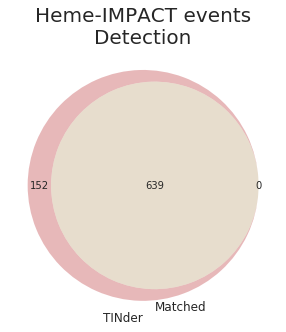

In [222]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (152,0,639), set_labels = ('TINder', 'Matched'))
plt.title('Heme-IMPACT events\nDetection',fontsize=20)
plt.show()

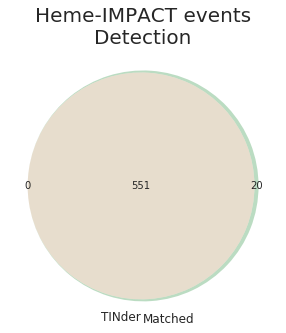

In [223]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (0,20,551), set_labels = ('TINder', 'Matched'))
plt.title('Heme-IMPACT events\nDetection',fontsize=20)
plt.show()

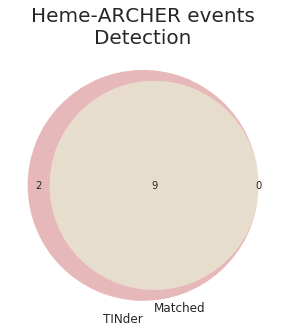

In [515]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (2,0,9), set_labels = ('TINder', 'Matched'))
plt.title('Heme-ARCHER events\nDetection',fontsize=20)
plt.show()

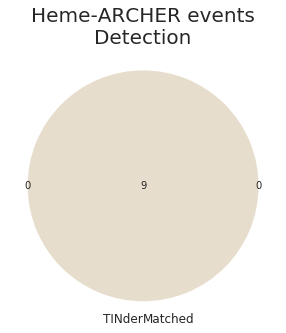

In [514]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (0,0,9), set_labels = ('TINder', 'Matched'))
plt.title('Heme-ARCHER events\nDetection',fontsize=20)
plt.show()

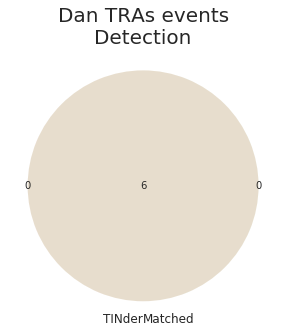

In [492]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (0,0,6), set_labels = ('TINder', 'Matched'))
plt.title('Dan TRAs events\nDetection',fontsize=20)
plt.show()

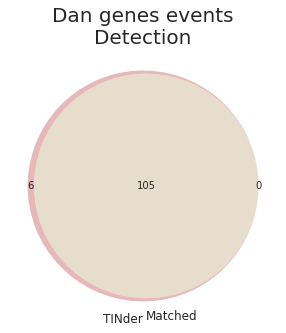

In [220]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (6,0,105), set_labels = ('TINder', 'Matched'))
plt.title('Dan genes events\nDetection',fontsize=20)
plt.show()

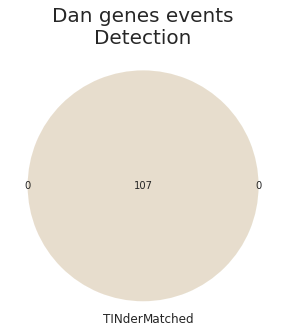

In [221]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (0,0,107), set_labels = ('TINder', 'Matched'))
plt.title('Dan genes events\nDetection',fontsize=20)
plt.show()

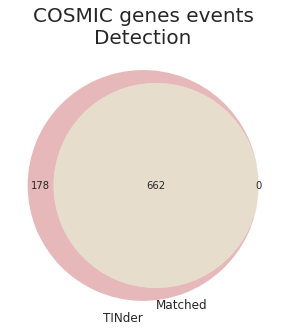

In [385]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (178,0,662), set_labels = ('TINder', 'Matched'))
plt.title('COSMIC genes events\nDetection',fontsize=20)
plt.show()

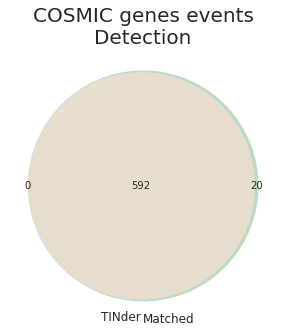

In [386]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (0,20,592), set_labels = ('TINder', 'Matched'))
plt.title('COSMIC genes events\nDetection',fontsize=20)
plt.show()

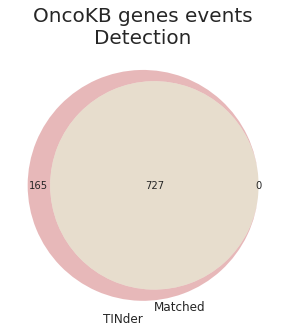

In [484]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (165,0,727), set_labels = ('TINder', 'Matched'))
plt.title('OncoKB genes events\nDetection',fontsize=20)
plt.show()

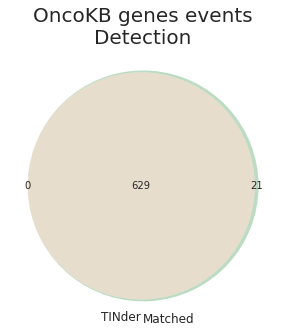

In [486]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (0,21,629), set_labels = ('TINder', 'Matched'))
plt.title('OncoKB genes events\nDetection',fontsize=20)
plt.show()

# ARMs:

In [226]:
#I_example_TINder_SVs_ARMs
#I_example_TINder_CNVs_ARMs
#I_example_TRIPLE_SVs_ARMs
#I_example_TRIPLE_CNVs_ARMs

In [225]:
I_example_TINder_SVs_ARMs

,index,chr_seg,start_seg,end_seg,CNV,brass_PS,brass_RC,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys
0,1,1,3708400,103627577,DEL,8.0,0.0,IID_H158613_T01_01_WG01,Detected,1p,0,121535434,1_1p,1_3708400_103627577_IID_H158613_T01_01_WG01
1,1,1,3723187,106598971,DEL,12.0,6.0,IID_H158613_T01_01_WG01,Detected,1p,0,121535434,1_1p,1_3723187_106598971_IID_H158613_T01_01_WG01
2,1,1,16875148,145382613,DUP,9.0,0.0,IID_H158627_T01_01_WG01,Non Detected,1p,0,121535434,1_1p,1_16875148_145382613_IID_H158627_T01_01_WG01
3,1,1,16875156,145382616,DUP,8.0,0.0,IID_H158636_T01_01_WG01,Non Detected,1p,0,121535434,1_1p,1_16875156_145382616_IID_H158636_T01_01_WG01
4,1,1,118922830,240238367,INV,26.0,20.0,IID_H158636_T01_01_WG01,Detected,1q,124535434,249250621,1_1q,1_118922830_240238367_IID_H158636_T01_01_WG01
5,5,5,26258398,150510249,DEL,7.0,5.0,IID_H158616_T01_01_WG01,Detected,5q,49405641,180915260,5_5q,5_26258398_150510249_IID_H158616_T01_01_WG01
6,5,5,26261588,178257467,DUP,4.0,0.0,IID_H158616_T01_01_WG01,Detected,5q,49405641,180915260,5_5q,5_26261588_178257467_IID_H158616_T01_01_WG01
7,5,5,58077841,178223941,DEL,5.0,3.0,IID_H158616_T01_01_WG01,Detected,5q,49405641,180915260,5_5q,5_58077841_178223941_IID_H158616_T01_01_WG01
8,5,5,75582578,178257164,DEL,18.0,0.0,IID_H158616_T01_01_WG01,Detected,5q,49405641,180915260,5_5q,5_75582578_178257164_IID_H158616_T01_01_WG01
9,6,6,13191446,156731674,DEL,30.0,0.0,IID_H158618_T01_01_WG01,Non Detected,6p,0,58830166,6_6p,6_13191446_156731674_IID_H158618_T01_01_WG01


In [228]:
keys=[]
for index,row in I_example_TINder_CNVs_ARMs.iterrows():
    key=row['Sample']+'_'+row['name_arm']
    keys.append(key)
I_example_TINder_CNVs_ARMs['keys_arms']=keys

keys=[]
for index,row in I_example_TINder_SVs_ARMs.iterrows():
    key=row['Sample']+'_'+row['name_arm']
    keys.append(key)
I_example_TINder_SVs_ARMs['keys_arms']=keys

keys=[]
for index,row in I_example_TRIPLE_CNVs_ARMs.iterrows():
    key=row['Sample']+'_'+row['name_arm']
    keys.append(key)
I_example_TRIPLE_CNVs_ARMs['keys_arms']=keys

keys=[]
for index,row in I_example_TRIPLE_SVs_ARMs.iterrows():
    key=row['Sample']+'_'+row['name_arm']
    keys.append(key)
I_example_TRIPLE_SVs_ARMs['keys_arms']=keys

In [229]:
#No INVs
I_example_TINder_SVs_ARMs_noINVs=I_example_TINder_SVs_ARMs[I_example_TINder_SVs_ARMs['CNV']!='INV']
I_example_TRIPLE_SVs_ARMs_noINVs=I_example_TRIPLE_SVs_ARMs[I_example_TRIPLE_SVs_ARMs['CNV']!='INV']

- TINder:

In [253]:
print(I_example_TINder_SVs_ARMs_noINVs.shape)
print(I_example_TINder_CNVs_ARMs.shape)
I_example_TINder_MERGE_ARMs_noINVs=pd.merge(I_example_TINder_CNVs_ARMs,I_example_TINder_SVs_ARMs_noINVs,on='keys_arms')
print(I_example_TINder_MERGE_ARMs_noINVs.shape)

(11, 15)
(158, 14)
(0, 28)


In [254]:
I_example_TINder_MERGE_ARMs_noINVs=I_example_TINder_CNVs_ARMs.append(I_example_TINder_SVs_ARMs_noINVs)
I_example_TINder_MERGE_ARMs_noINVs.head()

,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys,keys_arms,brass_PS,brass_RC
0,1,1,841614,249225001,2,0.288105,IID_H158644_T01_01_WG01,Detected,1p,0,121535434,1_1p,1_841614_249225001_IID_H158644_T01_01_WG01,IID_H158644_T01_01_WG01_1_1p,NaN,NaN
1,1,1,841614,249225001,2,0.288105,IID_H158644_T01_01_WG01,Detected,1q,124535434,249250621,1_1q,1_841614_249225001_IID_H158644_T01_01_WG01,IID_H158644_T01_01_WG01_1_1q,NaN,NaN
2,1,1,106599145,249225001,3,0.687139,IID_H158613_T01_01_WG01,Detected,1q,124535434,249250621,1_1q,1_106599145_249225001_IID_H158613_T01_01_WG01,IID_H158613_T01_01_WG01_1_1q,NaN,NaN
3,1,1,145382419,249195074,3,0.824733,IID_H158617_T01_01_WG01,Detected,1q,124535434,249250621,1_1q,1_145382419_249195074_IID_H158617_T01_01_WG01,IID_H158617_T01_01_WG01_1_1q,NaN,NaN
4,1,1,145382419,249225001,3,0.468590,IID_H158638_T01_01_WG01,Detected,1q,124535434,249250621,1_1q,1_145382419_249225001_IID_H158638_T01_01_WG01,IID_H158638_T01_01_WG01_1_1q,NaN,NaN


In [255]:
I_example_TINder_MERGE_ARMs_noINVs_nodups=I_example_TINder_MERGE_ARMs_noINVs.copy()
I_example_TINder_MERGE_ARMs_noINVs_nodups=I_example_TINder_MERGE_ARMs_noINVs_nodups.drop_duplicates(subset='keys')

In [256]:
from collections import Counter

In [257]:
Counter(I_example_TINder_MERGE_ARMs_noINVs_nodups['Detection'])

Counter({'Detected': 112, 'Non Detected': 11})

In [258]:
I_example_TINder_MERGE_ARMs_noINVs_nodups[I_example_TINder_MERGE_ARMs_noINVs_nodups['Detection']=='Non Detected'].reset_index()

,level_0,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys,keys_arms,brass_PS,brass_RC
0,34,6,6,210000,170910001,3,0.117096,IID_H158612_T01_01_WG01,Non Detected,6p,0,58830166,6_6p,6_210000_170910001_IID_H158612_T01_01_WG01,IID_H158612_T01_01_WG01_6_6p,NaN,NaN
1,62,9,9,195000,38774194,1,0.823959,IID_H158637_T01_01_WG01,Non Detected,9p,0,47367679,9_9p,9_195000_38774194_IID_H158637_T01_01_WG01,IID_H158637_T01_01_WG01_9_9p,NaN,NaN
2,63,9,9,195000,38774194,1,0.739500,IID_H158665_T01_01_WG01,Non Detected,9p,0,47367679,9_9p,9_195000_38774194_IID_H158665_T01_01_WG01,IID_H158665_T01_01_WG01_9_9p,NaN,NaN
3,68,9,9,258740,101309257,2,0.110466,IID_H158641_T01_01_WG01,Non Detected,9p,0,47367679,9_9p,9_258740_101309257_IID_H158641_T01_01_WG01,IID_H158641_T01_01_WG01_9_9p,NaN,NaN
4,105,13,13,28866212,115109878,1,0.687139,IID_H158613_T01_01_WG01,Non Detected,13q,19000000,115169878,13_13q,13_28866212_115109878_IID_H158613_T01_01_WG01,IID_H158613_T01_01_WG01_13_13q,NaN,NaN
5,141,20,20,60000,26159211,3,0.823959,IID_H158637_T01_01_WG01,Non Detected,20p,0,26369569,20_20p,20_60000_26159211_IID_H158637_T01_01_WG01,IID_H158637_T01_01_WG01_20_20p,NaN,NaN
6,142,20,20,60000,62910001,2,0.288105,IID_H158644_T01_01_WG01,Non Detected,20p,0,26369569,20_20p,20_60000_62910001_IID_H158644_T01_01_WG01,IID_H158644_T01_01_WG01_20_20p,NaN,NaN
7,144,20,20,60000,62910001,1,0.194661,IID_H158670_T01_01_WG01,Non Detected,20p,0,26369569,20_20p,20_60000_62910001_IID_H158670_T01_01_WG01,IID_H158670_T01_01_WG01_20_20p,NaN,NaN
8,2,1,1,16875148,145382613,DUP,NaN,IID_H158627_T01_01_WG01,Non Detected,1p,0,121535434,1_1p,1_16875148_145382613_IID_H158627_T01_01_WG01,IID_H158627_T01_01_WG01_1_1p,9.0,0.0
9,3,1,1,16875156,145382616,DUP,NaN,IID_H158636_T01_01_WG01,Non Detected,1p,0,121535434,1_1p,1_16875156_145382616_IID_H158636_T01_01_WG01,IID_H158636_T01_01_WG01_1_1p,8.0,0.0


- TRIPLE:

In [259]:
print(I_example_TRIPLE_SVs_ARMs_noINVs.shape)
print(I_example_TRIPLE_CNVs_ARMs.shape)
I_example_TRIPLE_MERGE_ARMs_noINVs=pd.merge(I_example_TRIPLE_CNVs_ARMs,I_example_TRIPLE_SVs_ARMs_noINVs,on='keys_arms')
print(I_example_TRIPLE_MERGE_ARMs_noINVs.shape)

(6, 15)
(179, 14)
(0, 28)


In [260]:
I_example_TRIPLE_MERGE_ARMs_noINVs=I_example_TRIPLE_CNVs_ARMs.append(I_example_TRIPLE_SVs_ARMs_noINVs)
I_example_TRIPLE_MERGE_ARMs_noINVs.head()

,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys,keys_arms,brass_PS,brass_RC
0,1,1,762601,249201268,2,1.0,IID_H158644_T01_01_WG01,Detected,1p,0,121535434,1_1p,1_762601_249201268_IID_H158644_T01_01_WG01,IID_H158644_T01_01_WG01_1_1p,NaN,NaN
1,1,1,762601,249201268,2,1.0,IID_H158644_T01_01_WG01,Detected,1q,124535434,249250621,1_1q,1_762601_249201268_IID_H158644_T01_01_WG01,IID_H158644_T01_01_WG01_1_1q,NaN,NaN
2,1,1,111991845,249191132,4,1.0,IID_H158613_T01_01_WG01,Detected,1q,124535434,249250621,1_1q,1_111991845_249191132_IID_H158613_T01_01_WG01,IID_H158613_T01_01_WG01_1_1q,NaN,NaN
3,1,1,120463044,249196349,3,1.0,IID_H158666_T01_01_WG01,Non Detected,1q,124535434,249250621,1_1q,1_120463044_249196349_IID_H158666_T01_01_WG01,IID_H158666_T01_01_WG01_1_1q,NaN,NaN
4,1,1,145378044,249208343,3,1.0,IID_H158617_T01_01_WG01,Detected,1q,124535434,249250621,1_1q,1_145378044_249208343_IID_H158617_T01_01_WG01,IID_H158617_T01_01_WG01_1_1q,NaN,NaN


In [261]:
I_example_TRIPLE_MERGE_ARMs_noINVs_nodups=I_example_TRIPLE_MERGE_ARMs_noINVs.copy()
I_example_TRIPLE_MERGE_ARMs_noINVs_nodups=I_example_TRIPLE_MERGE_ARMs_noINVs_nodups.drop_duplicates(subset='keys')

In [262]:
from collections import Counter

In [270]:
I_example_TRIPLE_MERGE_ARMs_noINVs_nodups_no66=I_example_TRIPLE_MERGE_ARMs_noINVs_nodups[I_example_TRIPLE_MERGE_ARMs_noINVs_nodups['Sample']!='IID_H158666_T01_01_WG01']
Counter(I_example_TRIPLE_MERGE_ARMs_noINVs_nodups_no66['Detection'])

Counter({'Detected': 133, 'Non Detected': 2})

In [272]:
I_example_TRIPLE_MERGE_ARMs_noINVs_nodups_no66[I_example_TRIPLE_MERGE_ARMs_noINVs_nodups_no66['Detection']=='Non Detected'].reset_index()

,level_0,index,chr_seg,start_seg,end_seg,CNV,Cells,Sample,Detection,chr_arm,start_arm,end_arm,name_arm,keys,keys_arms,brass_PS,brass_RC
0,50,6,6,5874537,170921794,3,0.363969,IID_H158613_T01_01_WG01,Non Detected,6p,0,58830166,6_6p,6_5874537_170921794_IID_H158613_T01_01_WG01,IID_H158613_T01_01_WG01_6_6p,NaN,NaN
1,118,13,13,25760508,114998761,3,1.000000,IID_H158669_T01_01_WG01,Non Detected,13q,19000000,115169878,13_13q,13_25760508_114998761_IID_H158669_T01_01_WG01,IID_H158669_T01_01_WG01_13_13q,NaN,NaN


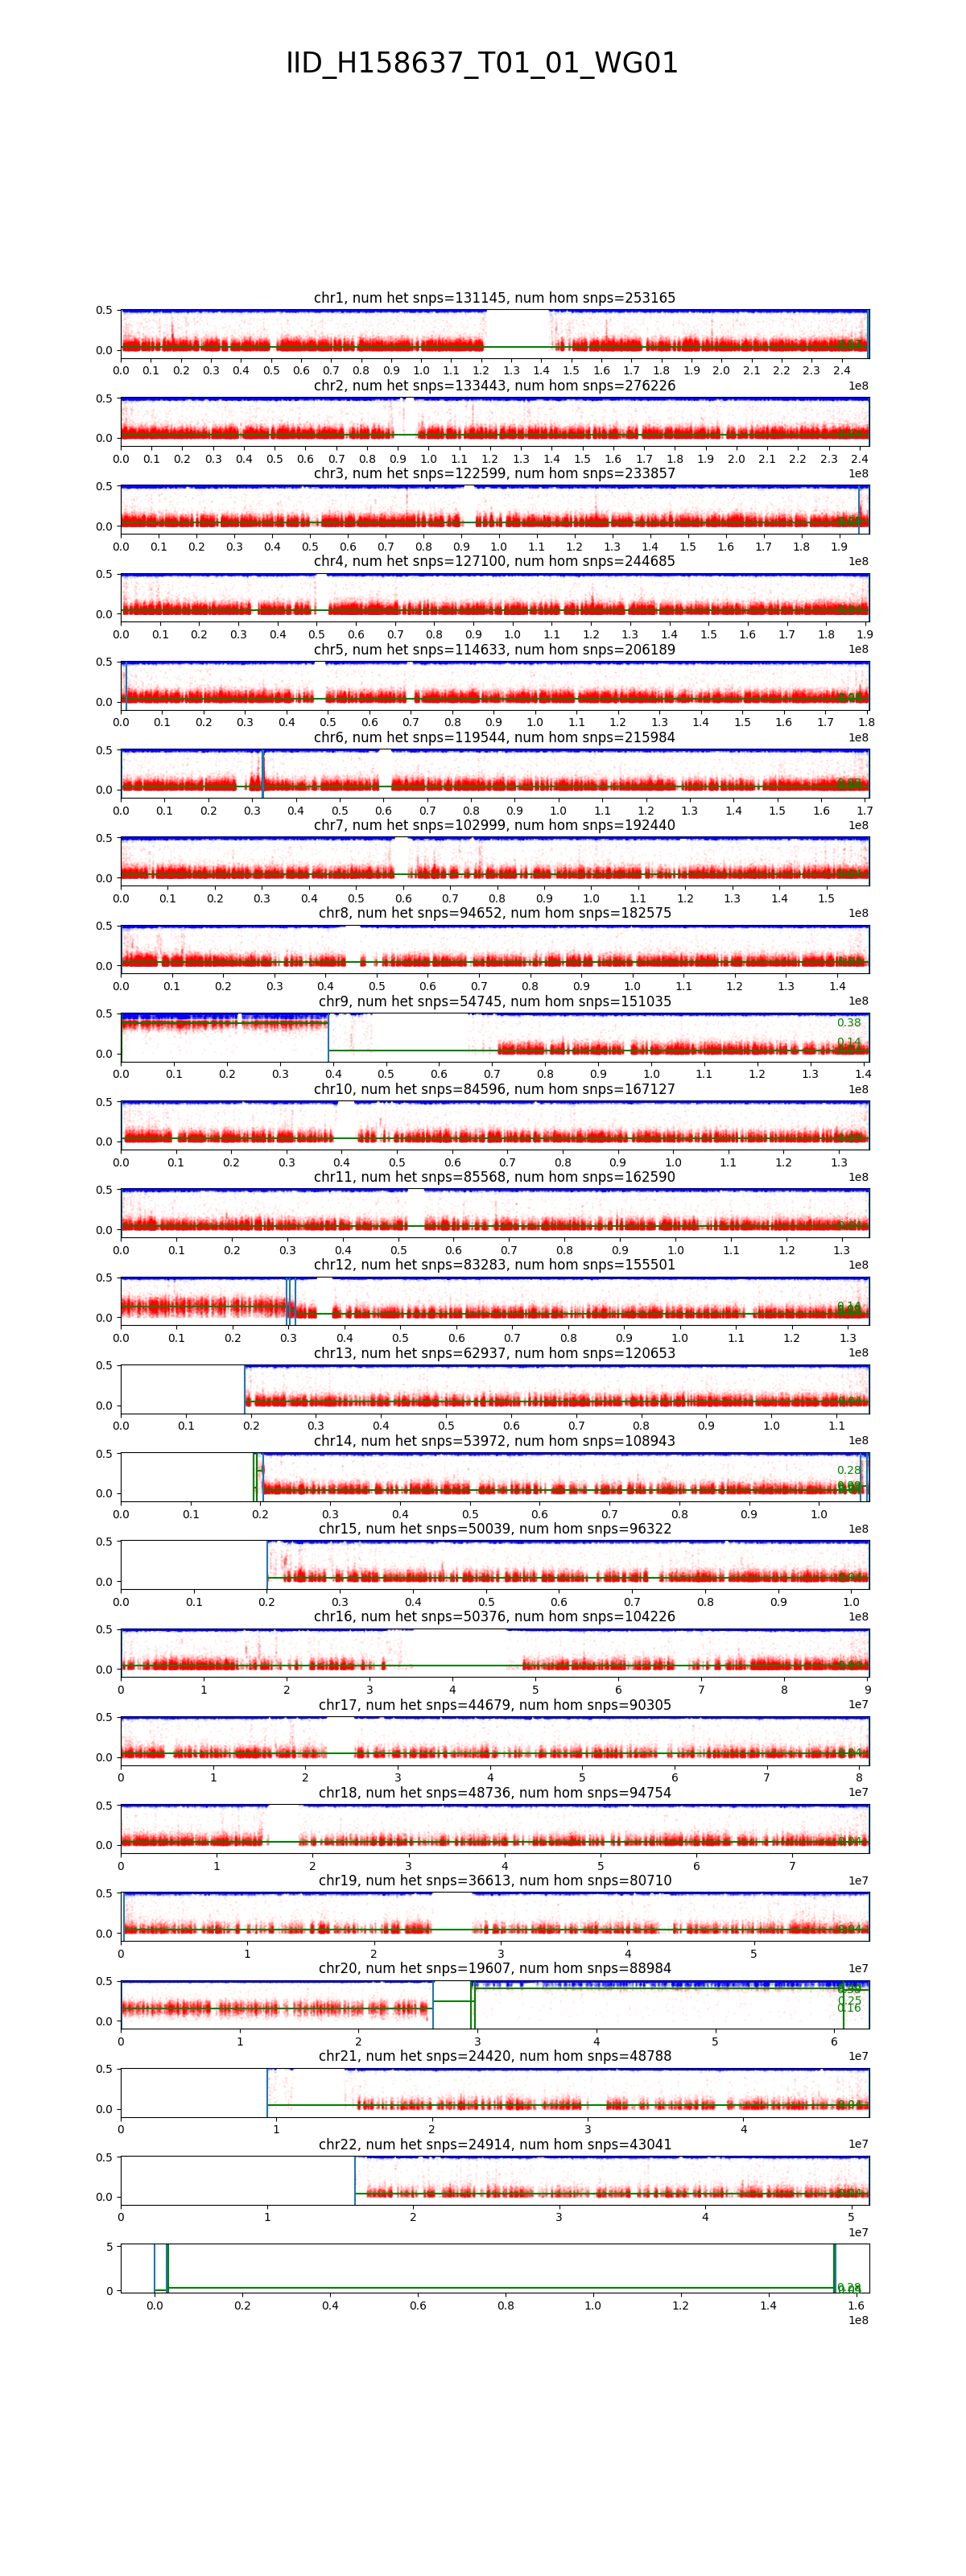

In [279]:
Image("/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_0329/500/IID_H158637_T01_01_WG01/IID_H158637_T01_01_WG01.pre_ci_baf.png",width=400,height=300)

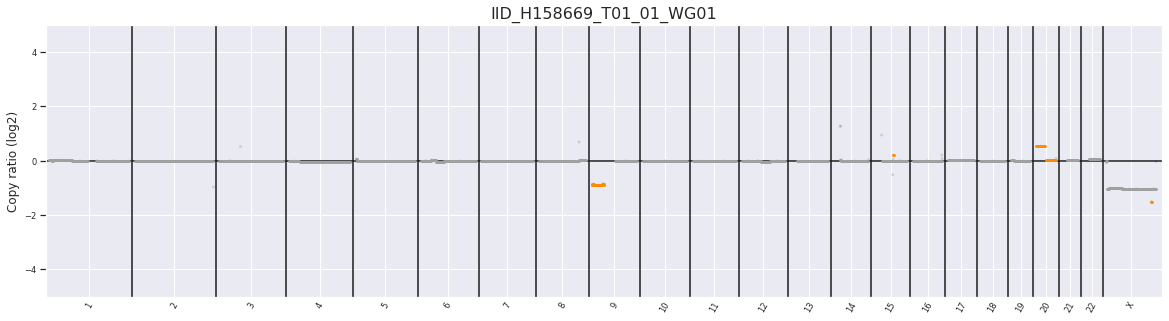

In [276]:
plt.rcParams['figure.figsize'] = [20, 5]
lowcov = cnvlib.read('/work/isabl/home/zhouy1/unmatechedSVpipeline/test/unmatched_benchmark/uk_all_0329/500/IID_H158637_T01_01_WG01/IID_H158637_T01_01_WG01.merged_bins.filtered.cns')
ax = cnvlib.do_scatter(lowcov,y_min=-5,y_max=5,  segments=lowcov)
plt.title('IID_H158669_T01_01_WG01', fontsize=16)
plt.show()

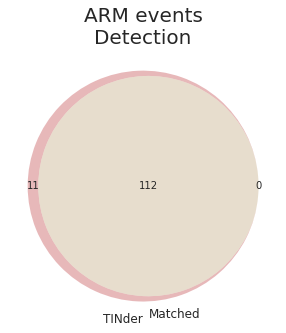

In [267]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (11,0,112), set_labels = ('TINder', 'Matched'))
plt.title('ARM events\nDetection',fontsize=20)
plt.show()

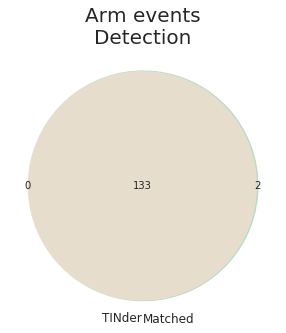

In [271]:
sns.set(rc={'figure.figsize':(5,5)})
plt.rcParams.update({'font.size': 10})
venn2(subsets = (0,2,133), set_labels = ('TINder', 'Matched'))
plt.title('Arm events\nDetection',fontsize=20)
plt.show()